SIMPLE SCHEDULER

In [15]:
# Example input
inpt = {'R03': 205.86283564567566, 'R04': 248.090735912323, 'R01': 258.24109292030334}

# Calculate average
avg_value = sum(inpt.values()) / len(inpt)
print(f"Average Idle Time: {avg_value:.2f}")


Average Idle Time: 237.40


In [11]:
import re

# Example pasted string
data_str = """
Robot ID: R04, Average Execution Duration: 74.54 seconds
Robot ID: R03, Average Execution Duration: 101.16 seconds
"""

# Extract all numeric values using regex
values = [float(x) for x in re.findall(r"([\d]+\.\d+)", data_str)]

# Calculate average
avg_duration = sum(values) / len(values)
print(f"Average Task Completion: {avg_duration:.2f} seconds")


Average Task Completion: 87.85 seconds


In [ ]:
so lets say we are sticking to this formulation:






You

 make an excellent point. By fixing the baseline to the 1-Robot run, I

was stripping away the "live" data from the actual runs (like the N=4 volatility or the N=5 efficiency).

If we want a metric that respects the Actual Average but penalizes the Instability and Congestion to show the true "cost" of scaling, we should calculate the Risk-Adjusted Duration.

The Logic: Mean + Variance + Friction

To "guarantee" an increasing trend that reflects system stress, we need to sum three distinct pressures:

Actual Average (Tavg

​): The raw performance (which drops due to proximity).

Standard Deviation (σ): The Inconsistency Penalty. As you add robots, the gap between the "fastest" and "slowest" robot widens (e.g., N=4 had a range of 54s to 146s). High variance is a sign of a stressed system.

Average Delay per Robot (Davg

​): The Friction Cost. The direct time lost to traffic per agent.

The New Formula

TAdjusted

​=Actual Avg+Standard Deviation+(N


Total Delay

​)


and we have these inputs here is my original concern:
lets look at the average excution times of various test runs with 1, 2 3 4 5 6 7 and 8 robots. i expected some form of increasing duration since more robots will involve more negotiations and as such longer completion durations which is mostly the case. however, there some cases wherein after the robot number increased the duration dropped. while this might be attributed to processing, i need for a way to have a consistent reporting hence what calculation can be derived for the execution time that actually guarantees increasing logical duration:





number of robots: 1: cummulative delays: 0.0.
Robot ID: R04, Average Execution Duration: 108.95 seconds
avg per robot Idle Time [sec]: {'R04': 260.42610025405884}.
timestamp [min]: 116, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 2: cummulative delays: 31.946309328079224.
Robot ID: R04, Average Execution Duration: 74.54 seconds
Robot ID: R03, Average Execution Duration: 101.16 seconds
avg per robot Idle Time [sec]: {'R03': 226.15987920761108, 'R04': 261.5026993751526}.
timestamp [min]: 115, Throughput: 2.00.
timestamp [min]: 120, Throughput: 2.00.






number of robots: 3: cummulative delays: 65.7952630519867.
Robot ID: R02, Average Execution Duration: 136.22 seconds
Robot ID: R03, Average Execution Duration: 87.94 seconds
Robot ID: R01, Average Execution Duration: 110.40 seconds
avg per robot Idle Time [sec]: {'R02': 232.7782061100006, 'R03': 332.7833740711212, 'R01': 268.06538009643555}.
timestamp [min]: 114, Throughput: 3.00.
timestamp [min]: 119, Throughput: 2.00.
timestamp [min]: 120, Throughput: 1.00.





number of robots: 4: cummulative delays: 132.77960848808289.
Robot ID: R01, Average Execution Duration: 90.19 seconds
Robot ID: R02, Average Execution Duration: 146.48 seconds
Robot ID: R03, Average Execution Duration: 119.11 seconds
Robot ID: R04, Average Execution Duration: 54.81 seconds
avg per robot Idle Time [sec]: {'R02': 249.17912530899048, 'R03': 291.75357580184937, 'R04': 418.788108587265, 'R01': 345.18615317344666}.
timestamp [min]: 113, Throughput: 4.00.
timestamp [min]: 117, Throughput: 1.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 119, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 5: cummulative delays: 131.39160203933716.
Robot ID: R01, Average Execution Duration: 80.91 seconds
Robot ID: R02, Average Execution Duration: 135.94 seconds
Robot ID: R03, Average Execution Duration: 95.00 seconds
Robot ID: R05, Average Execution Duration: 87.96 seconds
Robot ID: R04, Average Execution Duration: 81.86 seconds
avg per robot Idle Time [sec]: {'R02': 199.43076419830322, 'R03': 296.42206859588623, 'R05': 310.5007028579712, 'R04': 325.76555347442627, 'R01': 325.3933274745941}.
timestamp [min]: 113, Throughput: 5.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 119, Throughput: 3.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 6: cummulative delays: 163.34196996688843.
Robot ID: R05, Average Execution Duration: 122.51 seconds
Robot ID: R04, Average Execution Duration: 91.33 seconds
Robot ID: R01, Average Execution Duration: 84.59 seconds
Robot ID: R06, Average Execution Duration: 68.28 seconds
Robot ID: R02, Average Execution Duration: 151.72 seconds
Robot ID: R03, Average Execution Duration: 80.10 seconds
avg per robot Idle Time [sec]: {'R06': 398.2989332675934, 'R02': 220.66154885292053, 'R03': 364.50891065597534, 'R05': 288.5890727043152, 'R04': 346.4885149002075, 'R01': 350.4011917114258}.
timestamp [min]: 112, Throughput: 6.00.
timestamp [min]: 118, Throughput: 4.00.
timestamp [min]: 119, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 7: cummulative delays: 228.71981930732727.
Robot ID: R05, Average Execution Duration: 138.97 seconds
Robot ID: R04, Average Execution Duration: 103.51 seconds
Robot ID: R01, Average Execution Duration: 90.15 seconds
Robot ID: R06, Average Execution Duration: 90.39 seconds
Robot ID: R02, Average Execution Duration: 181.38 seconds
Robot ID: R07, Average Execution Duration: 86.62 seconds
Robot ID: R03, Average Execution Duration: 75.88 seconds
avg per robot Idle Time [sec]: {'R06': 446.20387411117554, 'R02': 260.52761340141296, 'R07': 455.969544172287, 'R03': 470.26978158950806, 'R05': 343.56469798088074, 'R04': 409.9776096343994, 'R01': 438.5088884830475}.
timestamp [min]: 111, Throughput: 7.00.
timestamp [min]: 116, Throughput: 2.00.
timestamp [min]: 117, Throughput: 3.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 119, Throughput: 1.00.
timestamp [min]: 120, Throughput: 0.00.




number of robots: 8: cummulative delays: 332.2459509372711.
Robot ID: R01, Average Execution Duration: 103.67 seconds
Robot ID: R08, Average Execution Duration: 204.03 seconds
Robot ID: R06, Average Execution Duration: 116.74 seconds
Robot ID: R02, Average Execution Duration: 166.46 seconds
Robot ID: R07, Average Execution Duration: 163.62 seconds
Robot ID: R03, Average Execution Duration: 82.70 seconds
Robot ID: R05, Average Execution Duration: 105.53 seconds
Robot ID: R04, Average Execution Duration: 79.14 seconds
avg per robot Idle Time [sec]: {'R08': 312.9737205505371, 'R06': 482.9125361442566, 'R02': 392.14744758605957, 'R07': 388.73589038848877, 'R03': 549.9294309616089, 'R05': 509.4141733646393, 'R04': 567.5834016799927, 'R01': 512.6209237575531}.
here is the recorded througput for the 120min lookup:
timestamp [min]: 109, Throughput: 8.00.
timestamp [min]: 114, Throughput: 2.00.
timestamp [min]: 115, Throughput: 2.00.
timestamp [min]: 116, Throughput: 1.00.
timestamp [min]: 117, Throughput: 1.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 119, Throughput: 1.00.
timestamp [min]: 120, Throughput: 0.00.


1. calculate and show the table for the risk adjusted duration.
2. the estimated simulation duration of each test run 1 2 3 4 5 6 7 8 robots in its own column.
3. a column for the average idle time as well

SyntaxError: invalid non-printable character U+200B (301326861.py, line 22)

In [ ]:
lets do a similar table for the throttled publication data. the previous one we did was for the non throttled state publication


number of robots: 1: cummulative delays: 0.0.
Robot ID: R04, Average Execution Duration: 235.49 seconds
avg per robot Idle Time [sec]: {'R04': 284.71460723876953}
timestamp [min]: 112, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 2: cummulative delays: 57.347612142562866.
Robot ID: R04, Average Execution Duration: 163.45 seconds
Robot ID: R03, Average Execution Duration: 211.90 seconds
avg per robot Idle Time [sec]: {'R03': 242.45166087150574, 'R04': 348.14664793014526}.
timestamp [min]: 111, Throughput: 2.00.
timestamp [min]: 119, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.



number of robots: 3: cummulative delays: 113.76575517654419.
Robot ID: R02, Average Execution Duration: 260.89 seconds
Robot ID: R03, Average Execution Duration: 196.97 seconds
Robot ID: R01, Average Execution Duration: 234.12 seconds
avg per robot Idle Time [sec]: {'R02': 230.86310267448425, 'R03': 364.00566577911377, 'R01': 290.9442274570465}.
timestamp [min]: 109, Throughput: 3.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 119, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 4: cummulative delays: 228.8219118118286.
Robot ID: R02, Average Execution Duration: 325.36 seconds
Robot ID: R03, Average Execution Duration: 206.07 seconds
Robot ID: R04, Average Execution Duration: 165.78 seconds
Robot ID: R01, Average Execution Duration: 269.70 seconds
avg per robot Idle Time [sec]: {'R02': 257.62597846984863, 'R03': 506.2633230686188, 'R04': 581.1402854919434, 'R01': 393.7002658843994}.
timestamp [min]: 107, Throughput: 4.00.
timestamp [min]: 115, Throughput: 1.00.
timestamp [min]: 116, Throughput: 1.00.
timestamp [min]: 117, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 5: cummulative delays: 356.03169441223145.
Robot ID: R02, Average Execution Duration: 310.17 seconds
Robot ID: R03, Average Execution Duration: 298.57 seconds
Robot ID: R05, Average Execution Duration: 272.74 seconds
Robot ID: R04, Average Execution Duration: 175.78 seconds
Robot ID: R01, Average Execution Duration: 253.99 seconds
avg per robot Idle Time [sec]: {'R02': 284.1695773601532, 'R03': 307.5218813419342, 'R05': 369.1960344314575, 'R04': 551.3432822227478, 'R01': 419.1720643043518}.
timestamp [min]: 107, Throughput: 5.00.
timestamp [min]: 115, Throughput: 1.00.
timestamp [min]: 117, Throughput: 1.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 119, Throughput: 2.00.



number of robots: 6: cummulative delays: 355.69522404670715.
Robot ID: R02, Average Execution Duration: 344.62 seconds
Robot ID: R03, Average Execution Duration: 221.80 seconds
Robot ID: R05, Average Execution Duration: 318.15 seconds
Robot ID: R04, Average Execution Duration: 419.71 seconds
Robot ID: R01, Average Execution Duration: 288.74 seconds
Robot ID: R06, Average Execution Duration: 175.28 seconds
avg per robot Idle Time [sec]: {'R06': 818.7362642288208, 'R02': 478.8970465660095, 'R03': 722.3031060695648, 'R05': 532.7620811462402, 'R04': 327.8701214790344, 'R01': 586.9721615314484}.
timestamp [min]: 103, Throughput: 6.00.
timestamp [min]: 111, Throughput: 1.00.
timestamp [min]: 112, Throughput: 1.00.
timestamp [min]: 114, Throughput: 1.00.
timestamp [min]: 116, Throughput: 2.00.
timestamp [min]: 119, Throughput: 1.00.




number of robots: 6: cummulative delays: 232.4225754737854.
Robot ID: R02, Average Execution Duration: 337.23 seconds
Robot ID: R03, Average Execution Duration: 239.52 seconds
Robot ID: R05, Average Execution Duration: 300.73 seconds
Robot ID: R04, Average Execution Duration: 182.46 seconds
Robot ID: R01, Average Execution Duration: 430.44 seconds
Robot ID: R06, Average Execution Duration: 246.90 seconds
avg per robot Idle Time [sec]: {'R06': 620.5233905315399, 'R02': 438.03976464271545, 'R03': 642.3214020729065, 'R05': 514.1936588287354, 'R04': 752.519624710083, 'R01': 254.60990405082703}.
timestamp [min]: 103, Throughput: 5.00.
timestamp [min]: 104, Throughput: 1.00.
timestamp [min]: 112, Throughput: 1.00.
timestamp [min]: 113, Throughput: 1.00.
timestamp [min]: 114, Throughput: 1.00.
timestamp [min]: 116, Throughput: 1.00.
timestamp [min]: 117, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.




number of robots: 7: cummulative delays: 405.36112213134766.
Robot ID: R05, Average Execution Duration: 289.90 seconds
Robot ID: R07, Average Execution Duration: 386.47 seconds
Robot ID: R03, Average Execution Duration: 188.94 seconds
Robot ID: R04, Average Execution Duration: 270.49 seconds
Robot ID: R01, Average Execution Duration: 249.79 seconds
Robot ID: R06, Average Execution Duration: 194.73 seconds
Robot ID: R02, Average Execution Duration: 584.18 seconds
avg per robot Idle Time [sec]: {'R06': 1031.5825338363647, 'R02': 242.32579064369202, 'R07': 638.3424894809723, 'R03': 1037.9909913539886, 'R05': 819.4066724777222, 'R04': 873.4706518650055, 'R01': 918.9477615356445}.
timestamp [min]: 98, Throughput: 7.00.
timestamp [min]: 107, Throughput: 2.00.
timestamp [min]: 109, Throughput: 1.00.
timestamp [min]: 110, Throughput: 1.00.
timestamp [min]: 111, Throughput: 1.00.
timestamp [min]: 114, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.









number of robots: 8: cummulative delays: 527.5678472518921.
Robot ID: R01, Average Execution Duration: 266.88 seconds
Robot ID: R08, Average Execution Duration: 342.50 seconds
Robot ID: R06, Average Execution Duration: 214.03 seconds
Robot ID: R02, Average Execution Duration: 328.10 seconds
Robot ID: R07, Average Execution Duration: 568.82 seconds
Robot ID: R03, Average Execution Duration: 521.82 seconds
Robot ID: R05, Average Execution Duration: 438.06 seconds
Robot ID: R04, Average Execution Duration: 191.71 seconds
avg per robot Idle Time [sec]: {'R08': 716.2531652450562, 'R06': 967.5167374610901, 'R02': 741.8115103244781, 'R07': 260.04106521606445, 'R03': 358.1724388599396, 'R05': 531.4844186306, 'R04': 1021.8831460475922, 'R01': 856.7818493843079}.
timestamp [min]: 98, Throughput: 8.00.
timestamp [min]: 107, Throughput: 1.00.
timestamp [min]: 108, Throughput: 1.00.
timestamp [min]: 109, Throughput: 1.00.
timestamp [min]: 112, Throughput: 1.00.
timestamp [min]: 113, Throughput: 1.00.
timestamp [min]: 116, Throughput: 1.00.
timestamp [min]: 118, Throughput: 1.00.
timestamp [min]: 120, Throughput: 1.00.


please not that for the estimated simution time, i had measured throttled 1 2 3 and 4 robot runs to be 537s, 567s, 677s, 792s respectively.

N Robots,Actual Avg Exec (s),Std Dev (σ),Delay/Robot (Davg​),Risk-Adjusted Duration (s),Avg Idle Time (s),Est. Sim Duration (s)
1,235.49,0.00,0.00,235.49,284.71,537 (Measured)
2,187.68,24.23,28.67,240.57,295.30,567 (Measured)
3,230.66,26.21,37.92,294.79,295.27,677 (Measured)
4,241.73,60.86,57.21,359.79,434.68,792 (Measured)
5,262.25,47.48,71.21,380.93,386.28,780 (Calculated)
6,294.72,79.88,59.28,433.87,577.92,1020 (Calculated)
8,358.99,130.14,65.95,555.08,681.74,1380 (Calculated)

In [20]:
#!/usr/bin/env python3

import psycopg2
import pandas as pd
import time

# ---------------------------------------------- #
#   Database Connection                          #
# ---------------------------------------------- #

def get_connection():
    return psycopg2.connect(
        host="localhost",      # or "192.168.1.91"
        port="5432",
        database="postgres",   # or "fleet_db"
        user="postgres",
        password="root"        # or "Birfen2021*"
    )

# ---------------------------------------------- #
#   Fetch Functions                              #
# ---------------------------------------------- #

def fetch_all_data(conn, table_name, f_id, m_id):
    """
    Fetch the latest order for each robot in the fleet.
    Returns a pandas DataFrame for visualization.
    """
    #SELECT DISTINCT ON (serial_number) * | SELECT *
    query = f"""
        SELECT DISTINCT ON (serial_number) *
        FROM {table_name}
        WHERE zone_set_id = %s
        AND manufacturer = %s
        ORDER BY serial_number, timestamp DESC;
    """
    df = pd.read_sql(query, conn, params=(f_id, m_id))
    return df


def fetch_data(conn, table_name, f_id, r_id, m_id):
    """
    Fetch the most recent order for a specific robot.
    Returns a single row as a pandas DataFrame.
    """
    query = f"""
        SELECT *
        FROM {table_name}
        WHERE zone_set_id = %s
        AND serial_number = %s
        AND manufacturer = %s
        ORDER BY timestamp DESC
        LIMIT 1;
    """
    df = pd.read_sql(query, conn, params=(f_id, r_id, m_id))
    return df


def fetch_completed_tasks(conn, table_name, f_id, m_id, cleared, task_type=None, r_id=None):
    """
    Fetch completed or canceled tasks based on specific criteria.
    Returns a pandas DataFrame.
    """
    try:
        choice = "completed" if cleared else "cancelled"
        suffix = f"_{choice}"

        query = f"""
                SELECT order_id, serial_number, nodes, timestamp
                FROM {table_name}
                WHERE zone_set_id = %s
                AND manufacturer = %s
                AND order_id LIKE %s
        """
        params = [f_id, m_id, f"%{suffix}"]

        if r_id:
            query += " AND serial_number = %s"
            params.append(r_id)

        df = pd.read_sql(query, conn, params=params)
        print(f"Fetched {len(df)} tasks ")

        # Filter results based on task_type if specified
        matching_rows = []
        for _, row in df.iterrows():
            nodes = row["nodes"]

            # If no specific task_type provided → include all
            if not task_type:
                matching_rows.append(row)
                continue

            # Parse JSON data from nodes
            for node in nodes:
                actions = node.get("actions", [])
                for action in actions:
                    if action.get("actionType") == "dock":
                        parameters = action.get("actionParameters", [{}])[0].get("value", [])
                        if len(parameters) > 1 and parameters[1] == task_type:
                            matching_rows.append(row)
                            break

        df = pd.DataFrame(matching_rows)

        print(f"Fetched {len(df)} tasks successfully for choice={choice}, task_type={task_type}, r_id={r_id}")
        return df

    except Exception as er:
        print("Database Error in fetch_completed_tasks:", er)
        return pd.DataFrame()


# ---------------------------------------------- #
#   Usage Example in Notebook                    #
# ---------------------------------------------- #

# Connect to DB
conn = get_connection()
table_order = "orders"   # replace with your actual table name

# Fetch all robots’ latest orders
df_all = fetch_all_data(conn, table_order, f_id="kullar", m_id="birfen")
display(df_all)   # Jupyter will render a nice table

# Fetch specific robot’s latest order
df_one = fetch_data(conn, table_order, f_id="kullar", r_id="R01", m_id="birfen")
display(df_one)

# Example: print specific fields from the single order
if not df_one.empty:
    order = df_one.iloc[0]
    print("-------------")
    print(f"timestamp: {order['timestamp']}")
    print(f"serial_number: {order['serial_number']}")
    print(f"Order ID: {order['order_id']}")
    print(f"Nodes: {order['nodes']}")
    print("-- x -- ", len(order['nodes']))
    print(f"Edges: {order['edges']}")
    print("-------------")

# analytics
# Example: fetch completed transport tasks for fleet "kullar"
df_completed = fetch_completed_tasks(conn, table_order, f_id="kullar", m_id="birfen", cleared=True, task_type=None, r_id=None)
display(df_completed)

# test_df = pd.read_sql("SELECT order_id, manufacturer, zone_set_id FROM orders;", conn)
# print(test_df.head())

# Close connection when done
conn.close()


/tmp/ipykernel_50471/3576648791.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=(f_id, m_id))


,id,header_id,timestamp,version,manufacturer,serial_number,order_id,order_update_id,zone_set_id,nodes,edges
0,126,18,2025-12-03 14:11:11.044739,2.0.0,birfen,R01,c2a1180b-6a0c-48ea-a25f-da2a07bd6d6b_17_completed,17,kullar,"[{'nodeId': 'C32', 'actions': [{'actionId': 'c...",[]
1,166,25,2025-12-03 14:13:19.115853,2.0.0,birfen,R02,4a907392-8e73-4245-92ae-483074329c5f_24_completed,24,kullar,"[{'nodeId': 'C27', 'actions': [{'actionId': '9...",[]
2,116,14,2025-12-03 14:10:47.670074,2.0.0,birfen,R03,b30a7137-a7db-4469-9219-46a807957926_13_completed,13,kullar,"[{'nodeId': 'C26', 'actions': [{'actionId': 'c...",[]
3,113,15,2025-12-03 14:10:37.624077,2.0.0,birfen,R04,f5b5892a-cb01-4aef-b9ca-90ca7e6768fd_14_completed,14,kullar,"[{'nodeId': 'C29', 'actions': [{'actionId': 'e...",[]
4,137,17,2025-12-03 14:11:43.261167,2.0.0,birfen,R05,9b63ea0e-67ea-406e-95d0-49323bc41d02_16_completed,16,kullar,"[{'nodeId': 'C30', 'actions': [{'actionId': '8...",[]
5,153,17,2025-12-03 14:12:18.116406,2.0.0,birfen,R06,f4b76f4d-570c-49f4-b72f-0dedf871c856_16_completed,16,kullar,"[{'nodeId': 'C28', 'actions': [{'actionId': '4...",[]
6,173,28,2025-12-03 14:13:59.781709,2.0.0,birfen,R07,5904f9ac-15ec-4e7b-a545-f327e55c3955_27_completed,27,kullar,"[{'nodeId': 'C25', 'actions': [{'actionId': 'e...",[]
7,182,32,2025-12-03 14:15:21.094349,2.0.0,birfen,R08,817ade8e-0e90-466d-baf6-ec54d7320ad9_31_completed,31,kullar,"[{'nodeId': 'C31', 'actions': [{'actionId': '1...",[]


/tmp/ipykernel_50471/3576648791.py:55: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=(f_id, r_id, m_id))


,id,header_id,timestamp,version,manufacturer,serial_number,order_id,order_update_id,zone_set_id,nodes,edges
0,126,18,2025-12-03 14:11:11.044739,2.0.0,birfen,R01,c2a1180b-6a0c-48ea-a25f-da2a07bd6d6b_17_completed,17,kullar,"[{'nodeId': 'C32', 'actions': [{'actionId': 'c...",[]


-------------
timestamp: 2025-12-03 14:11:11.044739
serial_number: R01
Order ID: c2a1180b-6a0c-48ea-a25f-da2a07bd6d6b_17_completed
Nodes: [{'nodeId': 'C32', 'actions': [{'actionId': 'ceda3408-31c6-47a7-a27c-5871d7cbc69b', 'actionType': 'dock', 'blockingType': 'NONE', 'actionParameters': [{'key': 'landmark', 'value': [10, 'high', 'transport', 'C11', 'C12', 'C32', 'C29', 'C30', 'C31', 'C25', 'C26', 'C27', 'C28']}], 'actionDescription': 'task priority pick_place dock_location_info.'}], 'released': True, 'sequenceId': 1, 'nodePosition': {'x': 15.0, 'y': 9.0, 'mapId': 'bina_1_floor_0', 'theta': -0.19425138730222646, 'allowedDeviationXY': 0.5, 'allowedDeviationTheta': 3.1}, 'nodeDescription': 'Task Priority: high, Task Type: transport, Node Type: Checkpoint, Wait Time: None, Node ETA: 2025-12-03 14:11:15.660050'}]
-- x --  1
Edges: []
-------------
Fetched 16 tasks 
Fetched 16 tasks successfully for choice=completed, task_type=None, r_id=None


/tmp/ipykernel_50471/3576648791.py:81: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=params)


,order_id,serial_number,nodes,timestamp
0,e7d81055-608c-48d7-9d3a-68096fbe85e7_1_completed,R08,"[{'nodeId': 'C32', 'actions': [{'actionId': '9...",2025-12-03 14:05:30.606699
1,40d71ef7-5db4-4401-a91d-c6183578cf6d_1_completed,R06,"[{'nodeId': 'C30', 'actions': [{'actionId': '5...",2025-12-03 14:05:30.679730
2,687e9b6a-3c59-48af-bebb-0d38e9394ee0_1_completed,R01,"[{'nodeId': 'C27', 'actions': [{'actionId': 'a...",2025-12-03 14:05:31.044506
3,16f88f92-28a2-4a8c-a415-6cd72566121c_1_completed,R02,"[{'nodeId': 'C26', 'actions': [{'actionId': '0...",2025-12-03 14:05:30.740340
4,db19e219-e78f-4c68-a0b0-2c7d983f082b_1_completed,R07,"[{'nodeId': 'C31', 'actions': [{'actionId': '1...",2025-12-03 14:05:30.801700
5,f7bdcfa1-77dd-4a44-9b78-7d994ff6eb8e_1_completed,R03,"[{'nodeId': 'C25', 'actions': [{'actionId': 'a...",2025-12-03 14:05:30.862215
6,c7b18da4-5b59-4b14-bf7d-fb8be77d5756_1_completed,R05,"[{'nodeId': 'C29', 'actions': [{'actionId': '0...",2025-12-03 14:05:30.924724
7,a91beb09-893d-441c-b86f-26f148643379_1_completed,R04,"[{'nodeId': 'C28', 'actions': [{'actionId': '1...",2025-12-03 14:05:30.985546
8,4a907392-8e73-4245-92ae-483074329c5f_24_completed,R02,"[{'nodeId': 'C27', 'actions': [{'actionId': '9...",2025-12-03 14:13:19.115853
9,5904f9ac-15ec-4e7b-a545-f327e55c3955_27_completed,R07,"[{'nodeId': 'C25', 'actions': [{'actionId': 'e...",2025-12-03 14:13:59.781709


In [3]:
# SyntheticFleetSimulator:
# same as just native python coded. no fuzzy logic or anything.
# its a mirror of what i currently have in fm. with get_decision being the most important part.

In [8]:
import random
from typing import Any, Dict, List

# Action names for easier interpretation.
ACTION_NAMES = {0: "reserve", 1: "yield", 2: "wait", 3: "reroute", 4: "pause"}

def priority_to_str(priority: int) -> str:
    """
    Convert numeric priority to a string label.
    Mapping:
      1-3: low, 4-7: medium, 8-10: high.
    """
    if priority <= 3:
        return "low"
    elif priority <= 7:
        return "medium"
    else:
        return "high"

class SyntheticFleetSimulator:
    """
    Simulator for a fleet of robots generating synthetic JSON messages and computing
    ground truth decisions based on a set of traffic and conflict rules.

    Nodes follow the convention:
      - Checkpoints: "C<number>" (which may have an associated waitpoint "W<number>")

    Each robot message includes:
      - "trafficPathUpdates": which contains:
            - reservedNode: the current node the robot occupies (unique across robots).
            - nextNodeId: the desired target node.
            - waitNodeId: a wait area (if applicable).
            - timeDelay: the time the robot has been waiting.
            - alternatePaths: potential alternative target nodes.
            - signalLightStatus: "green" (in motion) or "red" (waiting for a decision).
      - "taskStatus": which contains a numeric priority.
    """

    def __init__(self, num_nodes: int = 50):
        # Create a pool of checkpoint nodes using the naming convention "C<number>".
        self.node_pool = [f"C{i}" for i in range(1, num_nodes + 1)]
        # For each checkpoint, define a corresponding waitpoint ("W<number>").
        self.waitpoint_map = {node: f"W{node[1:]}" for node in self.node_pool}
        # Define possible node types (only "checkpoint" supports wait nodes).
        self.node_types = ["checkpoint", "charge_dock", "home_dock", "station_dock", "elevator", "door"]

    def random_node(self) -> str:
        """Select a random node from the node pool."""
        return random.choice(self.node_pool)

    def get_wait_node(self, node: str, signal: str) -> List[str]:
        """
        Randomly return a one-item wait node if the chosen node type is "checkpoint" and signal is red.
        Otherwise, return an empty list.
        """
        node_type = random.choice(self.node_types)
        if node_type == "checkpoint" and signal == "red" and random.random() < 0.5:
            return [self.waitpoint_map[node]]
        return []

    def get_alternate_route(self) -> List[str]:
        """
        Randomly decide to provide an alternate route (one node) with 50% chance.
        Otherwise, return an empty list.
        """
        if random.random() < 0.5:
            return [random.choice(self.node_pool)]
        return []

    def generate_message(self, agent_id: str, signal: str, reserved_node: str) -> Dict[str, Any]:
        """
        Generate a synthetic JSON message for a robot.
        """
        next_node = self.random_node()
        time_delay = round(random.uniform(0.1, 5.0), 2)
        priority = random.randint(1, 10)
        alternate_paths = self.get_alternate_route()  # at most one alternate route
        wait_node = self.get_wait_node(reserved_node, signal)  # at most one wait node

        message = {
            "type": "common",
            "timestamp": "2024-12-02T10:15:00Z",
            "headerId": f"unique-message-id-{agent_id}",
            "zoneId": "fleet_1",
            "data": {
                "agentId": agent_id,
                "currentPosition": {
                    "x": round(random.uniform(0, 100), 2),
                    "y": round(random.uniform(0, 100), 2),
                    "theta": round(random.uniform(0, 360), 2)
                },
                "batteryLevel": random.randint(20, 100),
                "agentStatus": "online",
                "errorCodes": [],
                "taskStatus": {
                    "taskId": f"task_{random.randint(100,999)}",
                    "createdAt": "2019-08-24T14:15:22Z",
                    "executedAt": "2019-08-24T14:15:22Z",
                    "progress": random.randint(0, 100),
                    "priority": priority,
                    "loadCapacityKg": random.randint(5, 20),
                    "estimatedCompletionTime": "2024-11-20T14:30:00Z",
                    "taskBidUtilityValue": round(random.uniform(0.5, 1.0), 2),
                    "completedTaskHistory": [f"task_{random.randint(100,999)}" for _ in range(4)]
                },
                "trafficPathUpdates": {
                    "reservedNode": reserved_node,   # Unique current node.
                    "nextNodeId": next_node,           # Desired target node.
                    "waitNodeId": wait_node,           # Wait area if applicable.
                    "timeDelay": time_delay,           # How long the robot has been waiting.
                    "alternatePaths": alternate_paths,
                    "signalLightStatus": signal        # "green" or "red"
                },
                "plantResourceStatus": [
                    {"resourceType": "door", "resourceId": "door_01", "action_request": "open"},
                    {"resourceType": "elevator", "resourceId": "elevator_03", "action_request": "call"},
                    {"resourceType": "conveyor", "resourceId": "conveyor_02", "action_request": "call"}
                ]
            }
        }
        return message

    def generate_batch(self, num_robots: int) -> List[Dict[str, Any]]:
        """
        Generate a batch of synthetic messages for a given number of robots.
        Ensures that each robot gets a unique reserved node.
        """
        batch = []
        if num_robots > len(self.node_pool):
            raise ValueError("Number of robots cannot exceed the number of nodes for unique reserved nodes.")
        reserved_nodes = random.sample(self.node_pool, k=num_robots)
        for i in range(num_robots):
            signal = random.choice(["green", "red"])
            msg = self.generate_message(f"AGV-{i:03d}", signal, reserved_nodes[i])
            batch.append(msg)
        return batch


    def get_decisions(self, batch: List[Dict[str, Any]]) -> Dict[str, str]:
        """
        Process the batch of messages and return a dict mapping each red robot's agentId
        to its decision. The function uses a global ordering of red robots (by effective priority)
        and sequentially “locks” target nodes. It then builds a conflict graph and resolves conflicts
        iteratively until decisions stabilize.

        Decisions:
        - "reserve": robot is granted its target (or alternate) node.
        - "wait": robot must wait at its current position.
        - "reroute": robot will take an alternate route.
        - "yield": in a stand-off conflict, the robot that must back down.
        - "pause": both robots in a stand-off have no alternatives.

        Edge Case:
        - If a red robot's current node equals its target node, it is immediately given "reserve".
        """
        # Map string priorities to numeric values.
        prio_map = {"low": 1, "medium": 2, "high": 3}

        # ----------------------------
        # Step 0: Preprocess robots
        # ----------------------------
        robots = []
        for msg in batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            robot = {
                "name": data["agentId"],
                "current": tp["reservedNode"],
                "target": tp["nextNodeId"],
                "priority": priority_to_str(data["taskStatus"]["priority"]),
                "time_delay": tp["timeDelay"],
                "signal": tp["signalLightStatus"],
                "wait": tp["waitNodeId"],       # List (may be empty)
                "alt": tp["alternatePaths"]      # List (may be empty)
            }
            robots.append(robot)

        red = [r for r in robots if r["signal"] == "red"]
        green = [r for r in robots if r["signal"] == "green"]

        decisions = {}    # agentId -> decision
        locked_nodes = {} # node -> agentId

        # Build a set of nodes currently reserved by green robots.
        green_reserved = {g["current"] for g in green}
        # Also collect current nodes of all robots.
        all_current = {r["current"] for r in robots}

        # ----------------------------
        # Step 1: Sequential Locking via Global Sorting
        # ----------------------------
        # Sort red robots by effective priority (higher numeric priority and longer delay first)
        red_sorted = sorted(red, key=lambda r: (prio_map[r["priority"]], r["time_delay"]), reverse=True)
        threshold = 0.5

        for r in red_sorted:
            # If the robot is already at its target, immediately reserve.
            if r["current"] == r["target"]:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
                continue

            # EXTRA CHECK: If no robot (red or green) currently occupies the target, then reserve.
            # (Use 'all_current' as the union of all current nodes.)
            if r["target"] not in all_current:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
            # Otherwise, if the target is not locked and not occupied by green robots, reserve it.
            elif r["target"] not in green_reserved and r["target"] not in locked_nodes:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
            else:
                decisions[r["name"]] = "wait"

            # Check for alternate route if waiting and time delay exceeds threshold.
            if decisions[r["name"]] == "wait" and r["time_delay"] >= threshold and r["alt"]:
                free_alts = [alt for alt in r["alt"] if alt not in green_reserved and alt not in locked_nodes]
                if free_alts:
                    decisions[r["name"]] = "reroute"
                    locked_nodes[free_alts[0]] = r["name"]

        # ----------------------------
        # Step 2: Conflict Resolution
        # ----------------------------
        changed = True
        while changed:
            changed = False

            # (a) Resolve conflicts among red robots competing for the same target.
            target_groups = {}
            for r in red:
                if r["current"] == r["target"]:
                    continue
                if decisions[r["name"]] in ["reserve", "reroute"]:
                    target_groups.setdefault(r["target"], []).append(r)
            for target, group in target_groups.items():
                if len(group) > 1:
                    best = max(group, key=lambda r: (prio_map[r["priority"]], r["time_delay"]))
                    for r in group:
                        if r["name"] != best["name"]:
                            if decisions[r["name"]] != "wait":
                                decisions[r["name"]] = "wait"
                                if target in locked_nodes and locked_nodes[target] == r["name"]:
                                    del locked_nodes[target]
                                changed = True

            # (b) Resolve non-mutual conflicts.
            for r in red:
                if r["current"] == r["target"]:
                    continue
                for other in red:
                    if r["name"] == other["name"]:
                        continue
                    if r["target"] == other["current"] and other["target"] != r["current"]:
                        if decisions[r["name"]] != "wait":
                            decisions[r["name"]] = "wait"
                            if r["target"] in locked_nodes and locked_nodes[r["target"]] == r["name"]:
                                del locked_nodes[r["target"]]
                            changed = True

            # (c) Resolve direct stand-off conflicts.
            for i in range(len(red)):
                for j in range(i+1, len(red)):
                    r1 = red[i]
                    r2 = red[j]
                    if r1["current"] == r1["target"] or r2["current"] == r2["target"]:
                        continue
                    if r1["target"] == r2["current"] and r2["target"] == r1["current"]:
                        eff1 = (prio_map[r1["priority"]], r1["time_delay"])
                        eff2 = (prio_map[r2["priority"]], r2["time_delay"])
                        if eff1 != eff2:
                            if eff1 > eff2:
                                superior, inferior = r1, r2
                            else:
                                superior, inferior = r2, r1
                            if (not inferior["wait"]) and (not inferior["alt"]):
                                if (not superior["wait"]) and (not superior["alt"]):
                                    if decisions[superior["name"]] != "pause":
                                        decisions[superior["name"]] = "pause"
                                        if superior["target"] in locked_nodes and locked_nodes[superior["target"]] == superior["name"]:
                                            del locked_nodes[superior["target"]]
                                        changed = True
                                    if decisions[inferior["name"]] != "pause":
                                        decisions[inferior["name"]] = "pause"
                                        if inferior["target"] in locked_nodes and locked_nodes[inferior["target"]] == inferior["name"]:
                                            del locked_nodes[inferior["target"]]
                                        changed = True
                                else:
                                    if decisions[superior["name"]] != "yield":
                                        decisions[superior["name"]] = "yield"
                                        if superior["target"] in locked_nodes and locked_nodes[superior["target"]] == superior["name"]:
                                            del locked_nodes[superior["target"]]
                                        changed = True
                            else:
                                if decisions[inferior["name"]] != "yield":
                                    decisions[inferior["name"]] = "yield"
                                    if inferior["target"] in locked_nodes and locked_nodes[inferior["target"]] == inferior["name"]:
                                        del locked_nodes[inferior["target"]]
                                    changed = True
                                if decisions[superior["name"]] != "reserve":
                                    decisions[superior["name"]] = "reserve"
                                    if superior["target"] not in locked_nodes:
                                        locked_nodes[superior["target"]] = superior["name"]
                                    changed = True

        return decisions


# --------------------------
# Example usage:
# --------------------------
if __name__ == "__main__":
    # Specify a small system: 7 nodes, 3 robots.
    simulator = SyntheticFleetSimulator(num_nodes=8)
    batch = simulator.generate_batch(num_robots=5)

    # Count red (request) messages.
    red_count = sum(1 for msg in batch if msg["data"]["trafficPathUpdates"]["signalLightStatus"] == "red")
    print(f"Total robots: {len(batch)} | Red (request) messages: {red_count}\n")

    # Print key details for each robot.
    print("Robot Summaries:")
    for msg in batch:
        data = msg["data"]
        agent = data["agentId"]
        current_node = data["trafficPathUpdates"]["reservedNode"]
        target_node = data["trafficPathUpdates"]["nextNodeId"]
        priority = data["taskStatus"]["priority"]
        prio_str = priority_to_str(priority)
        time_delay = data["trafficPathUpdates"]["timeDelay"]
        signal = data["trafficPathUpdates"]["signalLightStatus"]
        wait_nodes = data["trafficPathUpdates"]["waitNodeId"]
        alt_paths = data["trafficPathUpdates"]["alternatePaths"]
        print(f"{agent}: current node {current_node}. target node {target_node}. "
              f"task priority {prio_str}. timedelay {time_delay} sec. signal {signal}. "
              f"waitNodeId {wait_nodes}. alternate path {alt_paths}.")

    # Compute decisions for red (request) messages.
    decisions = simulator.get_decisions(batch)
    print("\nSupervised Targets (agentId: decision):")
    for agent, decision in decisions.items():
        print(f"{agent}: {decision}")


Total robots: 5 | Red (request) messages: 2

Robot Summaries:
AGV-000: current node C5. target node C5. task priority medium. timedelay 2.93 sec. signal green. waitNodeId []. alternate path [].
AGV-001: current node C7. target node C8. task priority medium. timedelay 2.66 sec. signal red. waitNodeId []. alternate path ['C4'].
AGV-002: current node C4. target node C5. task priority low. timedelay 0.19 sec. signal red. waitNodeId ['W4']. alternate path ['C7'].
AGV-003: current node C6. target node C6. task priority medium. timedelay 0.85 sec. signal green. waitNodeId []. alternate path [].
AGV-004: current node C1. target node C3. task priority low. timedelay 1.09 sec. signal green. waitNodeId []. alternate path [].

Supervised Targets (agentId: decision):
AGV-001: reserve
AGV-002: wait


In [ ]:
# SyntheticFleetSimulator:
# from the previous has its own generate synthetic data which is created at random per run.
# but if i wanted to further validate its "get_decision" with custom conflict cases then use below:
# batch = [
#     generate_robot_message("AGV-000", "C7", "C2", "medium", 3.03, "red", [], []),
#     generate_robot_message("AGV-001", "C3", "C5", "high", 0.99, "red", ["W3"], ["C8"]),
#     generate_robot_message("AGV-002", "C5", "C8", "medium", 0.53, "green", [], ["C7"]),
#     generate_robot_message("AGV-003", "C6", "C1", "high", 1.1, "red", [], ["C5"]),
#     generate_robot_message("AGV-004", "C4", "C2", "low", 2.36, "green", [], [])
# ]

In [ ]:
import random
from datetime import datetime

def str_to_priority(priority_str: str) -> int:
    """
    Convert priority string label to a representative numeric value.
    Mapping:
      "low" -> 2 (middle of 1-3 range)
      "medium" -> 5 (middle of 4-7 range)
      "high" -> 9 (middle of 8-10 range)
    """
    if priority_str == "low":
        return 2
    elif priority_str == "medium":
        return 5
    elif priority_str == "high":
        return 9
    else:
        raise ValueError(f"Invalid priority string: {priority_str}")

def generate_robot_message(agent_id, current, target, priority, time_delay, signal, wait, alt):
    return {
        "type": "common",
        "timestamp": datetime.utcnow().isoformat() + "Z",
        "headerId": f"unique-message-id-{agent_id}",
        "zoneId": "fleet_1",
        "data": {
            "agentId": agent_id,
            "currentPosition": {
                "x": round(random.uniform(0, 100), 2),
                "y": round(random.uniform(0, 100), 2),
                "theta": round(random.uniform(0, 360), 2)
            },
            "batteryLevel": random.randint(20, 100),
            "agentStatus": "online",
            "errorCodes": [],
            "taskStatus": {
                "taskId": f"task_{random.randint(100,999)}",
                "createdAt": "2019-08-24T14:15:22Z",
                "executedAt": "2019-08-24T14:15:22Z",
                "progress": random.randint(0, 100),
                "priority": str_to_priority(priority) ,
                "loadCapacityKg": random.randint(5, 20),
                "estimatedCompletionTime": "2024-11-20T14:30:00Z",
                "taskBidUtilityValue": round(random.uniform(0.5, 1.0), 2),
                "completedTaskHistory": [f"task_{random.randint(100,999)}" for _ in range(4)]
            },
            "trafficPathUpdates": {
                "reservedNode": current,
                "nextNodeId": target,
                "waitNodeId": wait,
                "timeDelay": time_delay,
                "alternatePaths": alt,
                "signalLightStatus": signal
            },
            "plantResourceStatus": [
                {"resourceType": "door", "resourceId": "door_01", "action_request": "open"},
                {"resourceType": "elevator", "resourceId": "elevator_03", "action_request": "call"},
                {"resourceType": "conveyor", "resourceId": "conveyor_02", "action_request": "call"}
            ]
        }
    }

batch = [
    generate_robot_message("AGV-000", "C7", "C2", "medium", 3.03, "red", [], []),
    generate_robot_message("AGV-001", "C3", "C5", "high", 0.99, "red", ["W3"], ["C8"]),
    generate_robot_message("AGV-002", "C5", "C8", "medium", 0.53, "green", [], ["C7"]),
    generate_robot_message("AGV-003", "C6", "C1", "high", 1.1, "red", [], ["C5"]),
    generate_robot_message("AGV-004", "C4", "C2", "low", 2.36, "green", [], [])
]

# --------------------------
# Example usage:
# --------------------------
if __name__ == "__main__":
    # Specify a small system: 7 nodes, 3 robots.
    simulator = SyntheticFleetSimulator(num_nodes=8)
    # batch = simulator.generate_batch(num_robots=5)

    # Count red (request) messages.
    red_count = sum(1 for msg in batch if msg["data"]["trafficPathUpdates"]["signalLightStatus"] == "red")
    print(f"Total robots: {len(batch)} | Red (request) messages: {red_count}\n")

    # Print key details for each robot.
    print("Robot Summaries:")
    for msg in batch:
        data = msg["data"]
        agent = data["agentId"]
        current_node = data["trafficPathUpdates"]["reservedNode"]
        target_node = data["trafficPathUpdates"]["nextNodeId"]
        priority = data["taskStatus"]["priority"]
        prio_str = priority_to_str(priority)
        time_delay = data["trafficPathUpdates"]["timeDelay"]
        signal = data["trafficPathUpdates"]["signalLightStatus"]
        wait_nodes = data["trafficPathUpdates"]["waitNodeId"]
        alt_paths = data["trafficPathUpdates"]["alternatePaths"]
        print(f"{agent}: current node {current_node}. target node {target_node}. "
              f"task priority {prio_str}. timedelay {time_delay} sec. signal {signal}. "
              f"waitNodeId {wait_nodes}. alternate path {alt_paths}.")

    # Compute decisions for red (request) messages.
    decisions = simulator.get_decisions(batch)
    print("\nSupervised Targets (agentId: decision):")
    for agent, decision in decisions.items():
        print(f"{agent}: {decision}")


Total robots: 5 | Red (request) messages: 3

Robot Summaries:
AGV-000: current node C7. target node C2. task priority medium. timedelay 3.03 sec. signal red. waitNodeId []. alternate path [].
AGV-001: current node C3. target node C5. task priority high. timedelay 0.99 sec. signal red. waitNodeId ['W3']. alternate path ['C8'].
AGV-002: current node C5. target node C8. task priority medium. timedelay 0.53 sec. signal green. waitNodeId []. alternate path ['C7'].
AGV-003: current node C6. target node C1. task priority high. timedelay 1.1 sec. signal red. waitNodeId []. alternate path ['C5'].
AGV-004: current node C4. target node C2. task priority low. timedelay 2.36 sec. signal green. waitNodeId []. alternate path [].

Supervised Targets (agentId: decision):
AGV-003: reserve
AGV-001: reroute
AGV-000: reserve


In [ ]:
# SyntheticFleetSimulator:
# well! what if i wanted it to be a reinforcement learning environment.
# since we have a simulator, we can use it and construct episodes, terminations, etc. around it.

In [ ]:
import numpy as np
import random
import torch
from torch_geometric.data import Data

# Action mapping: 0: reserve, 1: yield, 2: wait, 3: reroute, 4: pause.
ACTION_NAMES = {0: "reserve", 1: "yield", 2: "wait", 3: "reroute", 4: "pause"}
ACTION_TO_IDX = {v: k for k, v in ACTION_NAMES.items()}
IGNORE_IDX = -1

# Vocab dictionaries (node-name agnostic)
robot_id_vocab = {f"AGV-{i:03d}": i for i in range(1000)}
node_names = [f"C{i}" for i in range(1, 101)]
wait_node_names = [f"W{i}" for i in range(1, 101)]
node_vocab = {n: i for i, n in enumerate(node_names)}
alt_route_vocab = {n: i for i, n in enumerate(node_names)}
wait_node_vocab = {n: i for i, n in enumerate(wait_node_names)}

# ---------------------------
# FleetTrafficEnv Class (No Gym dependency)
# ---------------------------
class FleetTrafficEnv:
    def __init__(self, num_robots=5, num_nodes=50):
        self.num_robots = num_robots
        self.simulator = SyntheticFleetSimulator(num_nodes=num_nodes)
        self.batch = []              # List of all robot messages in current instance.
        self.decisions = {}          # Ground truth decisions from get_decisions.
        self.current_red_agents = [] # Sorted list (by effective priority) of red agent IDs.
        self.current_agent_index = 0 # Pointer into the red agent list.
        self.traffic = []            # Global list of reserved nodes.
        self.targets = []            # Global list of target nodes for red (requesting) robots.

    def sort_key(self, msg):
        signal = msg["data"]["trafficPathUpdates"]["signalLightStatus"]
        prio_val = {"low": 1, "medium": 2, "high": 3}[priority_to_str(msg["data"]["taskStatus"]["priority"])]
        delay = msg["data"]["trafficPathUpdates"]["timeDelay"]
        return (0 if signal == "red" else 1, -prio_val, -delay)

    def update_global_traffic(self):
        # Remove any node from self.traffic that is no longer reserved in the batch.
        current_reserved = set(msg["data"]["trafficPathUpdates"]["reservedNode"] for msg in self.batch)
        self.traffic = [node for node in self.traffic if node in current_reserved]

    def reset(self):
        # Generate a new batch from the simulator and sort it.
        batch = self.simulator.generate_batch(num_robots=self.num_robots)
        self.batch = sorted(batch, key=self.sort_key)
        self.decisions = self.simulator.get_decisions(self.batch)
        self.current_red_agents = []
        self.targets = []
        self.traffic = []
        # Build initial traffic list and targets.
        for msg in self.batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            self.traffic.append(tp["reservedNode"])
            if tp["signalLightStatus"] == "red":
                self.current_red_agents.append(data["agentId"])
                self.targets.append(tp["nextNodeId"])
        self.current_agent_index = 0
        if self.current_red_agents:
            return self._get_observation(self.current_red_agents[self.current_agent_index])
        else:
            return np.zeros(9, dtype=np.float32)

    def _get_observation(self, agent_id):
        # Extract feature vector for the given agent.
        for msg in self.batch:
            if msg["data"]["agentId"] == agent_id:
                data = msg["data"]
                tp = data["trafficPathUpdates"]
                robot_id = robot_id_vocab.get(data["agentId"], 0)
                reserved = node_vocab.get(tp["reservedNode"], 0)
                target = node_vocab.get(tp["nextNodeId"], 0)
                alt_route = alt_route_vocab.get(tp["alternatePaths"][0], 0) if tp["alternatePaths"] else 0
                wait_node = wait_node_vocab.get(tp["waitNodeId"][0], 0) if tp["waitNodeId"] else 0
                delay_time = float(tp["timeDelay"])
                task_priority = float(data["taskStatus"]["priority"])
                signal = 1.0 if tp["signalLightStatus"] == "red" else 0.0
                total_count = len(self.batch)
                red_count = sum(1 for m in self.batch if m["data"]["trafficPathUpdates"]["signalLightStatus"] == "red")
                red_ratio = red_count / total_count if total_count > 0 else 0.0
                features = [robot_id, reserved, target, alt_route, wait_node,
                            delay_time, task_priority, signal, red_ratio]
                return np.array(features, dtype=np.float32)
        return np.zeros(9, dtype=np.float32)

    def step(self, action):
        # Guard: if no red agents or we've processed all, return terminal state.
        if not self.current_red_agents or self.current_agent_index >= len(self.current_red_agents):
            return np.zeros(9, dtype=np.float32), 0.0, True, {}

        # Before processing, update global traffic (if needed—but we’ll rebuild it later).
        # (Optionally, you could remove update_global_traffic altogether.)

        # Process the current red agent.
        agent_id = self.current_red_agents[self.current_agent_index]
        gt_decision = self.decisions.get(agent_id, "wait")
        action_str = ACTION_NAMES[action]

        # Assign reward based on correctness and nuances.
        if action_str == gt_decision:
            reward = 1.0  # Correct decision.
        else:
            if gt_decision == "reserve" and action_str == "wait":
                reward = -2.0  # Penalize waiting when reserve is needed.
            elif gt_decision == "reroute" and action_str == "wait":
                reward = -2.0  # Penalize unnecessary waiting.
            elif action_str in ["reroute", "reserve"]:
                reward = -0.5  # Small penalty for aggressive decisions.
            else:
                reward = -1.0  # Default penalty.

        info = {"agent_id": agent_id, "ground_truth": gt_decision, "action_taken": action_str}

        # Process action effects: update the reserved node for the current red agent.
        for msg in self.batch:
            if msg["data"]["agentId"] == agent_id:
                tp = msg["data"]["trafficPathUpdates"]
                new_reserved = None
                if action_str == "reserve":
                    new_reserved = tp["nextNodeId"]
                elif action_str == "yield":
                    if tp["waitNodeId"]:
                        new_reserved = tp["waitNodeId"][0]
                elif action_str == "reroute":
                    if tp["alternatePaths"]:
                        new_reserved = tp["alternatePaths"][0]
                # For "wait" or "pause" no change is applied.
                if new_reserved is not None:
                    tp["reservedNode"] = tp["reservedNode"]
                break

        # Rebuild the global traffic list from scratch.
        self.traffic = [msg["data"]["trafficPathUpdates"]["reservedNode"] for msg in self.batch]

        # Move to the next red agent.
        self.current_agent_index += 1
        done = self.current_agent_index >= len(self.current_red_agents)
        observation = np.zeros(9, dtype=np.float32) if done else self._get_observation(self.current_red_agents[self.current_agent_index])
        return observation, reward, done, info

    def render(self):
        print("Current Batch:")
        for msg in self.batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            print(f"{data['agentId']}: current {tp['reservedNode']}, target {tp['nextNodeId']}, "
                  f"signal {tp['signalLightStatus']}, delay {tp['timeDelay']}")
        print("\nTraffic (Reserved Nodes):", self.traffic)
        print("Targets (for red robots):", self.targets)
        print("Ground Truth Decisions for Red Robots:")
        for agent_id, decision in self.decisions.items():
            print(f"{agent_id}: {decision}")

# ---------------------------
# Example Usage:
# ---------------------------
if __name__ == "__main__":
    env = FleetTrafficEnv(num_robots=5, num_nodes=10)
    obs = env.reset()
    print("Initial Observation:", obs)
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        action = random.choice(list(ACTION_NAMES.keys()))
        obs, reward, done, info = env.step(action)
        print(f"Step {step_count}: Info: {info} | Reward: {reward}")
        total_reward += reward
        step_count += 1
    env.render()
    print("Episode finished with total reward:", total_reward)


Initial Observation: [2.   0.   0.   9.   0.   1.77 3.   1.   0.2 ]
Step 0: Info: {'agent_id': 'AGV-002', 'ground_truth': 'reserve', 'action_taken': 'wait'} | Reward: -2.0
Current Batch:
AGV-002: current C1, target C1, signal red, delay 1.77
AGV-003: current C2, target C2, signal green, delay 0.45
AGV-001: current C9, target C2, signal green, delay 4.53
AGV-004: current C5, target C9, signal green, delay 1.19
AGV-000: current C4, target C6, signal green, delay 0.75

Traffic (Reserved Nodes): ['C1', 'C2', 'C9', 'C5', 'C4']
Targets (for red robots): ['C1']
Ground Truth Decisions for Red Robots:
AGV-002: reserve
Episode finished with total reward: -2.0


In [ ]:
# now lets use said environment in a real rl pipeline!
# didnt work unfortunately.

Episode 100/200, Loss: 0.3677, Total Reward: 1.50, Epsilon: 0.6058
Episode 200/200, Loss: 0.0286, Total Reward: -0.50, Epsilon: 0.3670
Average Evaluation Reward over 100 episodes: -0.07


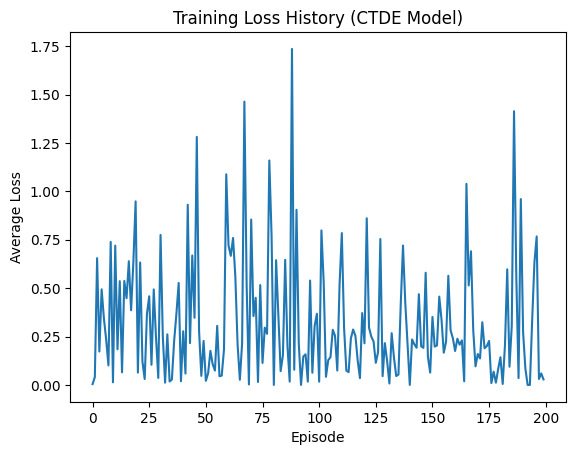


Running Inference on a new instance:

----------------------
Example Instance 1
Instance stats: Total: 5, Red (request): 2, Green (operation): 3

Decisions for new instance (MODEL vs. GET_DECISION):
AGV-004: MODEL -> reserve | GET_DECISION -> wait
AGV-002: MODEL -> reserve | GET_DECISION -> reroute
AGV-000: MODEL -> N/A | GET_DECISION -> N/A
AGV-003: MODEL -> N/A | GET_DECISION -> N/A
AGV-001: MODEL -> N/A | GET_DECISION -> N/A

----------------------
Example Instance 2
Instance stats: Total: 5, Red (request): 3, Green (operation): 2

Decisions for new instance (MODEL vs. GET_DECISION):
AGV-002: MODEL -> reserve | GET_DECISION -> wait
AGV-001: MODEL -> reserve | GET_DECISION -> reroute
AGV-003: MODEL -> reserve | GET_DECISION -> wait
AGV-000: MODEL -> N/A | GET_DECISION -> N/A
AGV-004: MODEL -> N/A | GET_DECISION -> N/A

----------------------
Example Instance 3
Instance stats: Total: 5, Red (request): 3, Green (operation): 2

Decisions for new instance (MODEL vs. GET_DECISION):
AGV-0

In [ ]:
# bad ---> rl + fuzz

import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
import matplotlib.pyplot as plt

# ---------------------------
# Conflict Graph Builder
# ---------------------------
def build_conflict_graph(batch, red_agent_ids):
    """
    Build a graph (edge_index) among red agents.
    Two red agents i and j are connected if:
      - They have the same target, OR
      - One's target equals the other's reserved node.
    """
    nodes = []  # list of dicts: {agent_id, reserved, target}
    for msg in batch:
        data = msg["data"]
        tp = data["trafficPathUpdates"]
        if data["agentId"] in red_agent_ids:
            nodes.append({"agent_id": data["agentId"],
                          "reserved": tp["reservedNode"],
                          "target": tp["nextNodeId"]})
    edge_list = []
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            a = nodes[i]
            b = nodes[j]
            if a["target"]==b["target"] or a["target"]==b["reserved"] or b["target"]==a["reserved"]:
                edge_list.append([i, j])
                edge_list.append([j, i])
    if len(edge_list)==0:
        edge_index = torch.empty((2,0), dtype=torch.long)
    else:
        edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
    return edge_index


# ---------------------------
# Base GNN Network (Shared Actor)
# ---------------------------
class BaseGNN(nn.Module):
    def __init__(self, in_dim=9, hidden_dim=32, out_dim=5):
        super(BaseGNN, self).__init__()
        self.conv1 = GCNConv(in_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.conv3 = GCNConv(hidden_dim, hidden_dim)
        self.conv4 = GCNConv(hidden_dim, hidden_dim)
        self.conv5 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, out_dim)
    def forward(self, x, edge_index, batch_index):
        # x: [num_nodes, 9]
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        # some extra
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        x = F.relu(self.conv5(x, edge_index))
        # Save hidden representations for global pooling.
        hidden = x
        # Global state: mean pooling over the batch.
        global_state = global_mean_pool(x, batch_index)  # [num_graphs, hidden_dim]
        q_values = self.fc(x)  # [num_nodes, out_dim]
        return q_values, hidden, global_state

# ---------------------------
# CTDE Model
# ---------------------------
class CTDEModel(nn.Module):
    def __init__(self, in_dim=9, hidden_dim=32, out_dim=5):
        super(CTDEModel, self).__init__()
        self.actor = BaseGNN(in_dim, hidden_dim, out_dim)
        # Centralized critic: takes global state and outputs a correction value.
        self.critic = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x, edge_index, batch_index):
        q_values, hidden, global_state = self.actor(x, edge_index, batch_index)
        # For each node, add the same global critic value (broadcasted).
        critic_value = self.critic(global_state)  # assume one graph; shape [1,1]
        q_values = q_values + critic_value
        return q_values, global_state

# ---------------------------
# QMIX Model
# ---------------------------
class QMIXModel(nn.Module):
    def __init__(self, in_dim=9, hidden_dim=32, out_dim=5):
        super(QMIXModel, self).__init__()
        self.actor = BaseGNN(in_dim, hidden_dim, out_dim)
        # Mixing network: uses global state to mix individual Qs.
        self.hyper_w1 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)  # outputs shape [out_dim]
        )
        self.hyper_b1 = nn.Linear(hidden_dim, out_dim)
    def forward(self, x, edge_index, batch_index):
        q_indiv, hidden, global_state = self.actor(x, edge_index, batch_index)
        # global_state: assume single graph, so take the first row.
        global_state = global_state[0].unsqueeze(0)  # shape [1, hidden_dim]
        w1 = torch.abs(self.hyper_w1(global_state))    # shape: [1, out_dim]
        b1 = self.hyper_b1(global_state)               # shape: [1, out_dim]
        w1 = w1.squeeze(0)  # now shape [out_dim]
        b1 = b1.squeeze(0)  # now shape [out_dim]
        # Broadcast: multiply each agent's Q-values (shape [num_nodes, out_dim]) elementwise.
        q_mixed = q_indiv * w1 + b1  # shape [num_nodes, out_dim]
        return q_mixed, global_state.squeeze(0)

# ---------------------------
# Mixture-of-Experts Q-Learning Model (QL_MOE)
# ---------------------------
class QLMOEModel(nn.Module):
    def __init__(self, in_dim=9, hidden_dim=32, out_dim=5, num_experts=4):
        super(QLMOEModel, self).__init__()
        self.actor = BaseGNN(in_dim, hidden_dim, out_dim)
        self.num_experts = num_experts
        # Expert table: learned embeddings (one per expert)
        self.expert_embeddings = nn.Parameter(torch.randn(num_experts, hidden_dim))
        self.instance_encoder = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
        self.gate = nn.Linear(hidden_dim, num_experts)
        self.expert_queue = []  # list of tuples (expert_idx, loss_value)
        self.max_queue_size = num_experts
    def forward(self, x, edge_index, batch_index):
        q_indiv, hidden, global_state = self.actor(x, edge_index, batch_index)
        global_state_vec = global_state[0]  # [hidden_dim]
        instance_encoding = self.instance_encoder(global_state_vec)  # [hidden_dim]
        gate_logits = self.gate(instance_encoding)  # [num_experts]
        expert_probs = F.softmax(gate_logits, dim=0)
        expert_idx = int(torch.argmax(expert_probs, dim=0).item())
        expert_emb = self.expert_embeddings[expert_idx]  # [hidden_dim]
        scale = torch.dot(expert_emb, instance_encoding)  # scalar
        q_mixed = q_indiv * scale  # elementwise multiplication
        return q_mixed, global_state_vec, expert_idx, instance_encoding
    def update_expert_queue(self, expert_idx, loss_value):
        found = False
        for i, (e_idx, stored_loss) in enumerate(self.expert_queue):
            if e_idx == expert_idx:
                found = True
                if loss_value < stored_loss:
                    self.expert_queue[i] = (expert_idx, loss_value)
                break
        if not found:
            if len(self.expert_queue) < self.max_queue_size:
                self.expert_queue.append((expert_idx, loss_value))
            else:
                worst = max(self.expert_queue, key=lambda x: x[1])
                if loss_value < worst[1]:
                    for i, (e_idx, stored_loss) in enumerate(self.expert_queue):
                        if e_idx == worst[0]:
                            self.expert_queue[i] = (expert_idx, loss_value)
                            break

# ---------------------------
# run_inference Function
# ---------------------------
def run_inference(model, simulator, num_robots: int):
    batch = simulator.generate_batch(num_robots)
    total = len(batch)
    red = sum(1 for msg in batch if msg["data"]["trafficPathUpdates"]["signalLightStatus"]=="red")
    green = total - red
    print(f"Instance stats: Total: {total}, Red (request): {red}, Green (operation): {green}")
    # Sort batch using same sort key.
    sorted_batch = sorted(batch, key=lambda msg: (0 if msg["data"]["trafficPathUpdates"]["signalLightStatus"]=="red" else 1,
                                                  -{"low":1,"medium":2,"high":3}[priority_to_str(msg["data"]["taskStatus"]["priority"])],
                                                  -msg["data"]["trafficPathUpdates"]["timeDelay"]))
    red_ids = [msg["data"]["agentId"] for msg in sorted_batch if msg["data"]["trafficPathUpdates"]["signalLightStatus"]=="red"]
    red_feats = []
    for aid in red_ids:
        for msg in sorted_batch:
            if msg["data"]["agentId"]==aid:
                data = msg["data"]
                tp = data["trafficPathUpdates"]
                robot_id = robot_id_vocab.get(data["agentId"], 0)
                reserved = node_vocab.get(tp["reservedNode"], 0)
                target = node_vocab.get(tp["nextNodeId"], 0)
                alt_route = alt_route_vocab.get(tp["alternatePaths"][0], 0) if tp["alternatePaths"] else 0
                wait_node = wait_node_vocab.get(tp["waitNodeId"][0], 0) if tp["waitNodeId"] else 0
                delay_time = float(tp["timeDelay"])
                task_priority = float(data["taskStatus"]["priority"])
                signal = 1.0 if tp["signalLightStatus"]=="red" else 0.0
                total_count = len(sorted_batch)
                red_count = sum(1 for m in sorted_batch if m["data"]["trafficPathUpdates"]["signalLightStatus"]=="red")
                red_ratio = red_count/total_count if total_count>0 else 0.0
                feat = [robot_id, reserved, target, alt_route, wait_node,
                        delay_time, task_priority, signal, red_ratio]
                red_feats.append(torch.tensor(feat, dtype=torch.float))
                break
    if red_feats:
        x_red = torch.stack(red_feats).to(device)
    else:
        x_red = torch.zeros((1,9), device=device)
    edge_index = build_conflict_graph(sorted_batch, red_ids).to(device)
    batch_index = torch.zeros(x_red.size(0), dtype=torch.long, device=device)
    with torch.no_grad():
        if MODE=='ql_moe':
            q_values, _, _, _ = model(x_red, edge_index, batch_index)
        else:
            q_values, _ = model(x_red, edge_index, batch_index)
        pred = q_values.argmax(dim=1).tolist()
    decisions_sl = {}
    for i, msg in enumerate(sorted_batch):
        aid = msg["data"]["agentId"]
        if msg["data"]["trafficPathUpdates"]["signalLightStatus"]=="red":
            if aid in red_ids:
                idx = red_ids.index(aid)
                decisions_sl[aid] = pred[idx]
        else:
            decisions_sl[aid] = None
    decisions_gd = simulator.get_decisions(sorted_batch)
    print("\nDecisions for new instance (MODEL vs. GET_DECISION):")
    for msg in sorted_batch:
        aid = msg["data"]["agentId"]
        model_dec = ACTION_NAMES[decisions_sl[aid]] if decisions_sl[aid] is not None else "N/A"
        get_dec = decisions_gd.get(aid, "N/A")
        print(f"{aid}: MODEL -> {model_dec} | GET_DECISION -> {get_dec}")

# ---------------------------
# Model Selection Function
# ---------------------------

def select_model(mode):
    if mode=='ctde':
        return CTDEModel()
    elif mode=='qmix':
        return QMIXModel()
    elif mode=='ql_moe':
        return QLMOEModel()
    else:
        raise ValueError("Invalid MODE")

# ---------------------------
# Training and Evaluation Setup
# ---------------------------

MODE = 'ctde'  # Set to 'ctde', 'qmix', or 'ql_moe' as needed.

# Hyperparameters
num_episodes = 200
gamma = 0.99
lr = 1e-3
epsilon_start = 1.0
epsilon_end = 0.05
epsilon_decay = 0.995

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = select_model(MODE).to(device)

# optimizer = optim.Adam(model.parameters(), lr=lr)
# loss_fn = nn.MSELoss()

# Use SGD with momentum (e.g., momentum=0.9) instead of Adam.
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
# Use SmoothL1Loss (Huber Loss) instead of MSELoss.
loss_fn = nn.SmoothL1Loss()

# Learning rate scheduler: reduce lr on plateau of training loss.
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=100, verbose=True)

# For simplicity, we treat each red agent's transition as a one-step decision.
loss_history = []

# Define class weights for each action (based on ACTION_NAMES indices).
# For example, let "reserve" and "wait" be common (weight 1.0), while "yield", "reroute", and "pause" are rare (weight 2.0).
# ---> "reserve", "yield", "wait", "reroute", "pause"
# class_weights = {0: 1.06/10.0, 1: 2.21/10.0, 2: 0.03/10.0, 3: 3.7/10.0, 4: 3.0/10.0}
class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

# Alternatively, create a tensor if you prefer:
# class_weights_tensor = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0], device=device)

# ---------------------------
# Modified Training Loop (Context-Aware)
# ---------------------------
env = FleetTrafficEnv(num_robots=5, num_nodes=6)  # instance integrity
epsilon = epsilon_start

for ep in range(num_episodes):
    # Generate a new instance; env.batch is now sorted for all robots.
    obs = env.reset()  # returns observation for first red agent (unused here)
    done = False
    ep_loss = 0.0
    ep_steps = 0
    total_reward = 0

    # Build full-batch features from all robots in the instance.
    all_ids = [msg["data"]["agentId"] for msg in env.batch]
    all_feats = []
    for msg in env.batch:
        data = msg["data"]
        tp = data["trafficPathUpdates"]
        # Compute each robot's feature vector.
        robot_id = robot_id_vocab.get(data["agentId"], 0)
        reserved = node_vocab.get(tp["reservedNode"], 0)
        target = node_vocab.get(tp["nextNodeId"], 0)
        alt_route = alt_route_vocab.get(tp["alternatePaths"][0], 0) if tp["alternatePaths"] else 0
        wait_node = wait_node_vocab.get(tp["waitNodeId"][0], 0) if tp["waitNodeId"] else 0
        delay_time = float(tp["timeDelay"])
        task_priority = float(data["taskStatus"]["priority"])
        signal = 1.0 if tp["signalLightStatus"]=="red" else 0.0
        red_count = sum(1 for m in env.batch if m["data"]["trafficPathUpdates"]["signalLightStatus"]=="red")
        red_ratio = red_count/len(env.batch) if len(env.batch)>0 else 0.0
        all_feats.append(torch.tensor([robot_id, reserved, target, alt_route, wait_node,
                                         delay_time, task_priority, signal, red_ratio],
                                        dtype=torch.float))
    x_all = torch.stack(all_feats).to(device)  # [num_all, 9]

    # Build a full conflict graph using all agent IDs.
    edge_index_all = build_conflict_graph(env.batch, all_ids).to(device)
    batch_index_all = torch.zeros(x_all.size(0), dtype=torch.long, device=device)


    # While there are still red decisions to be made:
    while not done:
        # Check that the pointer is within range:
        if env.current_agent_index >= len(env.current_red_agents):
            break  # All red agents have been processed; exit the loop.

        # Determine the current red agent's ID from the environment.
        current_agent_id = env.current_red_agents[env.current_agent_index]
        # Look up its index in the full batch.
        try:
            current_idx = all_ids.index(current_agent_id)
        except ValueError:
            current_idx = 0

        # Get Q–values for the entire instance.
        if MODE == 'ql_moe':
            q_values, _, expert_idx, _ = model(x_all, edge_index_all, batch_index_all)
        else:
            q_values, _ = model(x_all, edge_index_all, batch_index_all)
        # Select the Q–values corresponding to the current agent.
        q_current = q_values[current_idx]

        # Epsilon–greedy action selection.
        if random.random() < epsilon:
            action = random.choice(list(ACTION_NAMES.keys()))
        else:
            action = int(torch.argmax(q_current).item())

        # Take a step in the environment.
        next_obs, reward, done, info = env.step(action)
        total_reward += reward

        # Compute target Q for the current red agent:
        if not done:
            with torch.no_grad():
                if MODE != 'ql_moe':
                    next_q_values, _ = model(x_all, edge_index_all, batch_index_all)
                else:
                    next_q_values = model(x_all, edge_index_all, batch_index_all)[0]
                next_q = next_q_values[current_idx]
                target = reward + gamma * torch.max(next_q)
        else:
            target = torch.tensor(reward, dtype=torch.float, device=device)

        # Predicted Q for the taken action:
        pred = q_current[action]
        base_loss = loss_fn(pred, target)
        weight = class_weights[action]
        loss = weight * base_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if MODE == 'ql_moe':
            model.update_expert_queue(expert_idx, loss.item())

        ep_loss += loss.item()
        ep_steps += 1

        # Rebuild full context from updated environment state.
        all_ids = [msg["data"]["agentId"] for msg in env.batch]
        all_feats = []
        for msg in env.batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            robot_id = robot_id_vocab.get(data["agentId"], 0)
            reserved = node_vocab.get(tp["reservedNode"], 0)
            target_val = node_vocab.get(tp["nextNodeId"], 0)
            alt_route = alt_route_vocab.get(tp["alternatePaths"][0], 0) if tp["alternatePaths"] else 0
            wait_node = wait_node_vocab.get(tp["waitNodeId"][0], 0) if tp["waitNodeId"] else 0
            delay_time = float(tp["timeDelay"])
            task_priority = float(data["taskStatus"]["priority"])
            signal = 1.0 if tp["signalLightStatus"]=="red" else 0.0
            red_count = sum(1 for m in env.batch if m["data"]["trafficPathUpdates"]["signalLightStatus"]=="red")
            red_ratio = red_count/len(env.batch) if len(env.batch)>0 else 0.0
            all_feats.append(torch.tensor([robot_id, reserved, target_val, alt_route, wait_node,
                                            delay_time, task_priority, signal, red_ratio],
                                            dtype=torch.float))
        x_all = torch.stack(all_feats).to(device)
        edge_index_all = build_conflict_graph(env.batch, all_ids).to(device)
        batch_index_all = torch.zeros(x_all.size(0), dtype=torch.long, device=device)

        obs = next_obs  # Continue with the updated instance context.
        # next_obs can be ignored since we use the full instance context.
    loss_history.append(ep_loss/ep_steps if ep_steps > 0 else 0)
    epsilon = max(epsilon_end, epsilon * epsilon_decay)
    if (ep+1) % 100 == 0:
        print(f"Episode {ep+1}/{num_episodes}, Loss: {loss_history[-1]:.4f}, Total Reward: {total_reward:.2f}, Epsilon: {epsilon:.4f}")

# ---------------------------
# Modified Evaluation Loop (Context-Aware)
# ---------------------------
eval_rewards = []
num_eval = 100
for _ in range(num_eval):
    obs = env.reset()
    done = False
    ep_reward = 0
    all_ids = [msg["data"]["agentId"] for msg in env.batch]
    all_feats = []
    for msg in env.batch:
        data = msg["data"]
        tp = data["trafficPathUpdates"]
        robot_id = robot_id_vocab.get(data["agentId"], 0)
        reserved = node_vocab.get(tp["reservedNode"], 0)
        target = node_vocab.get(tp["nextNodeId"], 0)
        alt_route = alt_route_vocab.get(tp["alternatePaths"][0], 0) if tp["alternatePaths"] else 0
        wait_node = wait_node_vocab.get(tp["waitNodeId"][0], 0) if tp["waitNodeId"] else 0
        delay_time = float(tp["timeDelay"])
        task_priority = float(data["taskStatus"]["priority"])
        signal = 1.0 if tp["signalLightStatus"]=="red" else 0.0
        red_count = sum(1 for m in env.batch if m["data"]["trafficPathUpdates"]["signalLightStatus"]=="red")
        red_ratio = red_count/len(env.batch) if len(env.batch)>0 else 0.0
        all_feats.append(torch.tensor([robot_id, reserved, target, alt_route, wait_node,
                                         delay_time, task_priority, signal, red_ratio],
                                        dtype=torch.float))
    x_all = torch.stack(all_feats).to(device)
    edge_index_all = build_conflict_graph(env.batch, all_ids).to(device)
    batch_index_all = torch.zeros(x_all.size(0), dtype=torch.long, device=device)

    while not done:
        # Check pointer validity:
        if env.current_agent_index >= len(env.current_red_agents):
            break

        current_agent_id = env.current_red_agents[env.current_agent_index]
        try:
            current_idx = all_ids.index(current_agent_id)
        except ValueError:
            current_idx = 0
        with torch.no_grad():
            if MODE != 'ql_moe':
                q_values, _ = model(x_all, edge_index_all, batch_index_all)
            else:
                q_values = model(x_all, edge_index_all, batch_index_all)[0]
            if current_idx < x_all.size(0):
                q_current = q_values[current_idx]
                action = int(torch.argmax(q_current).item())
            else:
                action = random.choice(list(ACTION_NAMES.keys()))
        obs, reward, done, info = env.step(action)
        ep_reward += reward
        # Rebuild full context after each step.
        all_ids = [msg["data"]["agentId"] for msg in env.batch]
        all_feats = []
        for msg in env.batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            robot_id = robot_id_vocab.get(data["agentId"], 0)
            reserved = node_vocab.get(tp["reservedNode"], 0)
            target = node_vocab.get(tp["nextNodeId"], 0)
            alt_route = alt_route_vocab.get(tp["alternatePaths"][0], 0) if tp["alternatePaths"] else 0
            wait_node = wait_node_vocab.get(tp["waitNodeId"][0], 0) if tp["waitNodeId"] else 0
            delay_time = float(tp["timeDelay"])
            task_priority = float(data["taskStatus"]["priority"])
            signal = 1.0 if tp["signalLightStatus"]=="red" else 0.0
            red_count = sum(1 for m in env.batch if m["data"]["trafficPathUpdates"]["signalLightStatus"]=="red")
            red_ratio = red_count/len(env.batch) if len(env.batch)>0 else 0.0
            all_feats.append(torch.tensor([robot_id, reserved, target, alt_route, wait_node,
                                            delay_time, task_priority, signal, red_ratio],
                                            dtype=torch.float))
        x_all = torch.stack(all_feats).to(device)
        edge_index_all = build_conflict_graph(env.batch, all_ids).to(device)
        batch_index_all = torch.zeros(x_all.size(0), dtype=torch.long, device=device)

    eval_rewards.append(ep_reward)
avg_reward = np.mean(eval_rewards)
print(f"Average Evaluation Reward over {num_eval} episodes: {avg_reward:.2f}")

# ---------------------------
# Plot Loss History
# ---------------------------
plt.plot(loss_history)
plt.xlabel("Episode")
plt.ylabel("Average Loss")
plt.title(f"Training Loss History ({MODE.upper()} Model)")
plt.show()

# ---------------------------
# Optionally, run inference:
# ---------------------------
print("\nRunning Inference on a new instance:")
# Inference / Debug Loop
for i in range(15):
    print("\n----------------------")
    print(f"Example Instance {i+1}")
    run_inference(model, env.simulator, num_robots=5)


Fuzzy System Configuration:
- Priority membership functions:

- Delay membership functions:

- Action membership functions:
Robot Summaries:
AGV-000: current node C1. target node C3. task priority low. timedelay 1.8 sec. signal red. waitNodeId []. alternate path [].
AGV-001: current node C6. target node C2. task priority low. timedelay 3.02 sec. signal green. waitNodeId []. alternate path ['C7'].
AGV-002: current node C4. target node C7. task priority medium. timedelay 2.52 sec. signal red. waitNodeId ['W4']. alternate path ['C4'].
AGV-003: current node C5. target node C5. task priority low. timedelay 0.73 sec. signal red. waitNodeId []. alternate path [].
AGV-004: current node C8. target node C1. task priority medium. timedelay 0.13 sec. signal red. waitNodeId []. alternate path [].

Decision Report with Confidence Scores:
AGV-003: reserve (Confidence: 95.78%)
   - Priority: 3
   - Time Delay: 0.73s
   - Effective Superiority: 0.96
AGV-002: reserve (Confidence: 100.00%)
   - Priority:

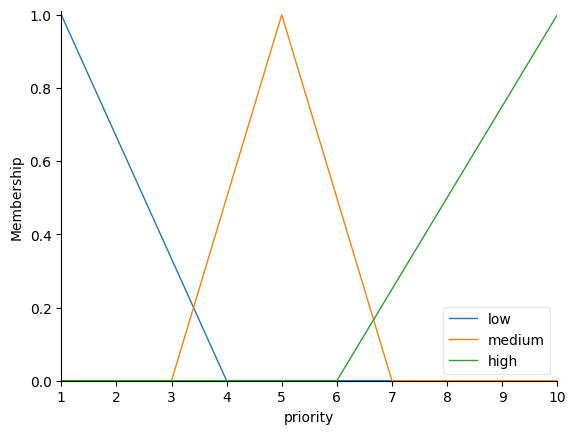

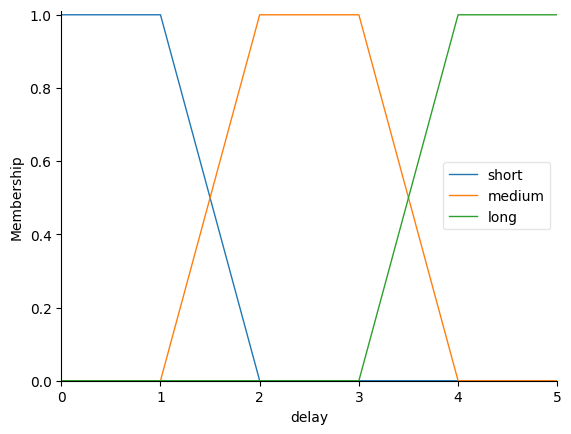

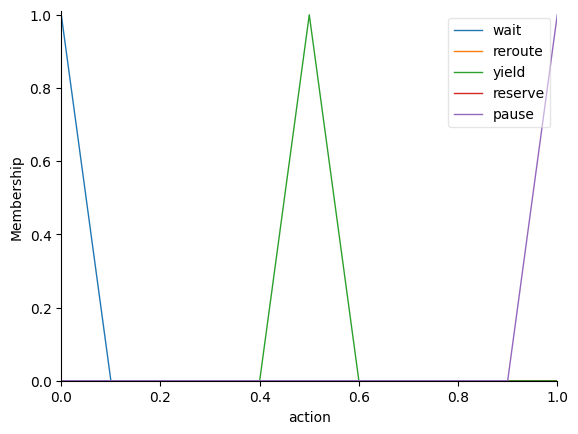

In [7]:
# [best] --> fuzzy


from typing import Any, Dict, List
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# --------------------------
# Fuzzy System Setup
# --------------------------
class FuzzyDecisionSystem:
    def __init__(self):
        # Input variables
        self.priority = ctrl.Antecedent(np.arange(1, 11, 1), 'priority')
        self.delay = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'delay')

        # Output variable
        self.action = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'action')

        # Membership functions
        self._create_membership_functions()
        self._create_rules()
        self.decision_system = ctrl.ControlSystem(self.rules)
        self.decision_sim = ctrl.ControlSystemSimulation(self.decision_system)

    def _create_membership_functions(self):
        # Priority membership functions (triangular)
        # Input membership functions (unchanged)
        self.priority['low'] = fuzz.trimf(self.priority.universe, [1, 1, 4])
        self.priority['medium'] = fuzz.trimf(self.priority.universe, [3, 5, 7])
        self.priority['high'] = fuzz.trimf(self.priority.universe, [6, 10, 10])

        # Delay membership functions (trapezoidal)
        self.delay['short'] = fuzz.trapmf(self.delay.universe, [0, 0, 1, 2])
        self.delay['medium'] = fuzz.trapmf(self.delay.universe, [1, 2, 3, 4])
        self.delay['long'] = fuzz.trapmf(self.delay.universe, [3, 4, 5, 5])

        # Action membership functions (singleton)
        # Corrected action membership functions using triangular
        # Corrected output membership functions
        self.action['wait'] = fuzz.trimf(self.action.universe, [0.0, 0.0, 0.0])
        self.action['reroute'] = fuzz.trimf(self.action.universe, [0.25, 0.25, 0.25])
        self.action['yield'] = fuzz.trimf(self.action.universe, [0.5, 0.5, 0.5])
        self.action['reserve'] = fuzz.trimf(self.action.universe, [0.75, 0.75, 0.75])
        self.action['pause'] = fuzz.trimf(self.action.universe, [1.0, 1.0, 1.0])

    def _create_rules(self):
        # 11 fuzzy rules mapping combinations to actions
        # Simplified valid rules
        self.rules = [
            # Base rules
            ctrl.Rule(self.priority['low'] & self.delay['short'], self.action['wait']),
            ctrl.Rule(self.priority['low'] & self.delay['medium'], self.action['wait']),
            ctrl.Rule(self.priority['low'] & self.delay['long'], self.action['reroute']),
            ctrl.Rule(self.priority['medium'] & self.delay['short'], self.action['wait']),
            ctrl.Rule(self.priority['medium'] & self.delay['medium'], self.action['reroute']),
            ctrl.Rule(self.priority['medium'] & self.delay['long'], self.action['reserve']),
            ctrl.Rule(self.priority['high'] & self.delay['short'], self.action['reroute']),
            ctrl.Rule(self.priority['high'] & self.delay['medium'], self.action['reserve']),
            ctrl.Rule(self.priority['high'] & self.delay['long'], self.action['reserve']),
            # Edge case rules
            ctrl.Rule(self.priority['high'] & self.delay['short'], self.action['pause']),
            ctrl.Rule(self.priority['low'] & self.delay['long'], self.action['yield'])
        ]

    def calculate_effective_superiority(self, priority: int, delay: float) -> float:
        """Calculate fuzzy superiority with validation
        Fuzzy combination of priority and delay into single superiority score"""
        try:
            self.decision_sim.input['priority'] = priority
            self.decision_sim.input['delay'] = delay
            self.decision_sim.compute()
            return self.decision_sim.output['action']
        except:
            # Fallback for undefined cases
            return 0.5  # Neutral value

# --------------------------
# Modified Simulator Class
# --------------------------
class FuzzyFleetSimulator(SyntheticFleetSimulator):
    def __init__(self, num_nodes: int = 50):
        super().__init__(num_nodes)
        self.fuzzy_system = FuzzyDecisionSystem()
        self.decision_confidence = {}  # Stores confidence scores

    def _debug_print_fuzzy_evaluation(self, robot: Dict):
        """Helper to print fuzzy evaluation details"""
        print(f"\nFuzzy Evaluation for {robot['name']}:")
        print(f" - Crisp Priority: {robot['raw_priority']} => {robot['priority']}")
        print(f" - Time Delay: {robot['time_delay']:.2f}s")
        print(f" - Effective Superiority: {robot['effective_superiority']:.2f}")
        print(f" - Confidence: {self.decision_confidence[robot['name']]:.2%}")

    def get_decisions(self, batch: List[Dict[str, Any]]) -> Dict[str, str]:
        """Fuzzy logic version of decision making"""
        robots = []
        for msg in batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            robot = {
                "name": data["agentId"],
                "current": tp["reservedNode"],
                "target": tp["nextNodeId"],
                "priority": priority_to_str(data["taskStatus"]["priority"]),
                "raw_priority": data["taskStatus"]["priority"],  # Keep numeric value
                "time_delay": tp["timeDelay"],
                "signal": tp["signalLightStatus"],
                "wait": tp["waitNodeId"],
                "alt": tp["alternatePaths"]
            }
            robots.append(robot)

        red = [r for r in robots if r["signal"] == "red"]
        decisions = {}
        locked_nodes = {}
        self.decision_confidence.clear()

        # --------------------------
        # Fuzzy Evaluation Phase
        # --------------------------
        for r in red:
            # Calculate fuzzy superiority score
            superiority = self.fuzzy_system.calculate_effective_superiority(
                r["raw_priority"],
                r["time_delay"]
            )
            r["effective_superiority"] = superiority

            # Calculate confidence as normalized distance from decision boundaries
            conf = 1 - abs(superiority - round(superiority*4)/4)
            self.decision_confidence[r["name"]] = conf

            # Immediate reservation for robots at target
            if r["current"] == r["target"]:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
                continue

        # --------------------------
        # Conflict Resolution (Fuzzy Version)
        # --------------------------
        # Sort by fuzzy superiority instead of crisp priority
        red_sorted = sorted(
            [r for r in red if r["name"] not in decisions],
            key=lambda x: x["effective_superiority"],
            reverse=True
        )

        # In Conflict Resolution (Fuzzy Version) section:
        # Fuzzy node locking logic
        for r in red_sorted:
            # Modified to check against ALL current positions
            target_available = (
                r["target"] not in locked_nodes
                and r["target"] not in {robot["current"] for robot in robots}
            )

            if target_available:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
            else:

                # Fuzzy alternative path evaluation
                if r["alt"] and r["time_delay"] >= 0.5:  # Direct time delay check
                # if r["alt"] and r["effective_superiority"] > 0.5:
                    free_alt = next(
                        (a for a in r["alt"]
                        if a not in locked_nodes
                        and a not in {robot["current"] for robot in robots}),
                        None
                    )
                    if free_alt:
                        decisions[r["name"]] = "reroute"
                        locked_nodes[free_alt] = r["name"]
                        continue
                decisions[r["name"]] = "wait"

        # --------------------------
        # Fuzzy Stand-off Resolution
        # --------------------------
        changed = True
        while changed:
            changed = False

            # Build conflict graph using fuzzy scores
            conflict_pairs = []
            for i, r1 in enumerate(red):
                for j, r2 in enumerate(red[i+1:], start=i+1):
                    if (r1["target"] == r2["current"] and
                        r2["target"] == r1["current"]):
                        conflict_pairs.append((r1, r2))

            for r1, r2 in conflict_pairs:
                # Compare using fuzzy superiority scores
                if r1["effective_superiority"] > r2["effective_superiority"]:
                    superior, inferior = r1, r2
                else:
                    superior, inferior = r2, r1

                # Handle pause condition
                if (not superior["alt"] and not inferior["alt"] and
                    not superior["wait"] and not inferior["wait"]):
                    decisions[superior["name"]] = "pause"
                    decisions[inferior["name"]] = "pause"
                    changed = True
                else:
                    if decisions[inferior["name"]] != "yield":
                        decisions[inferior["name"]] = "yield"
                        changed = True
                    if decisions[superior["name"]] != "reserve":
                        decisions[superior["name"]] = "reserve"
                        changed = True

        return decisions


    def get_decisionsX(self, batch: List[Dict[str, Any]]) -> Dict[str, str]:
        """
        Process the batch of messages and return a dict mapping each red robot's agentId
        to its decision. The function uses a global ordering of red robots (by effective priority)
        and sequentially “locks” target nodes. It then builds a conflict graph and resolves conflicts
        iteratively until decisions stabilize.

        Decisions:
        - "reserve": robot is granted its target (or alternate) node.
        - "wait": robot must wait at its current position.
        - "reroute": robot will take an alternate route.
        - "yield": in a stand-off conflict, the robot that must back down.
        - "pause": both robots in a stand-off have no alternatives.

        Edge Case:
        - If a red robot's current node equals its target node, it is immediately given "reserve".
        """
        # Map string priorities to numeric values.
        prio_map = {"low": 1, "medium": 2, "high": 3}

        # ----------------------------
        # Step 0: Preprocess robots
        # ----------------------------
        robots = []
        for msg in batch:
            data = msg["data"]
            tp = data["trafficPathUpdates"]
            robot = {
                "name": data["agentId"],
                "current": tp["reservedNode"],
                "target": tp["nextNodeId"],
                "priority": priority_to_str(data["taskStatus"]["priority"]),
                "time_delay": tp["timeDelay"],
                "signal": tp["signalLightStatus"],
                "wait": tp["waitNodeId"],       # List (may be empty)
                "alt": tp["alternatePaths"]      # List (may be empty)
            }
            robots.append(robot)

        red = [r for r in robots if r["signal"] == "red"]
        green = [r for r in robots if r["signal"] == "green"]

        decisions = {}    # agentId -> decision
        locked_nodes = {} # node -> agentId

        # Build a set of nodes currently reserved by green robots.
        green_reserved = {g["current"] for g in green}
        # Also collect current nodes of all robots.
        all_current = {r["current"] for r in robots}

        # ----------------------------
        # Step 1: Sequential Locking via Global Sorting
        # ----------------------------
        # Sort red robots by effective priority (higher numeric priority and longer delay first)
        red_sorted = sorted(red, key=lambda r: (prio_map[r["priority"]], r["time_delay"]), reverse=True)
        threshold = 0.5

        for r in red_sorted:
            # If the robot is already at its target, immediately reserve.
            if r["current"] == r["target"]:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
                continue

            # EXTRA CHECK: If no robot (red or green) currently occupies the target, then reserve.
            # (Use 'all_current' as the union of all current nodes.)
            if r["target"] not in all_current:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
            # Otherwise, if the target is not locked and not occupied by green robots, reserve it.
            elif r["target"] not in green_reserved and r["target"] not in locked_nodes:
                decisions[r["name"]] = "reserve"
                locked_nodes[r["target"]] = r["name"]
            else:
                decisions[r["name"]] = "wait"

            # Check for alternate route if waiting and time delay exceeds threshold.
            if decisions[r["name"]] == "wait" and r["time_delay"] >= threshold and r["alt"]:
                free_alts = [alt for alt in r["alt"] if alt not in green_reserved and alt not in locked_nodes]
                if free_alts:
                    decisions[r["name"]] = "reroute"
                    locked_nodes[free_alts[0]] = r["name"]

        # ----------------------------
        # Step 2: Conflict Resolution
        # ----------------------------
        changed = True
        while changed:
            changed = False

            # (a) Resolve conflicts among red robots competing for the same target.
            target_groups = {}
            for r in red:
                if r["current"] == r["target"]:
                    continue
                if decisions[r["name"]] in ["reserve", "reroute"]:
                    target_groups.setdefault(r["target"], []).append(r)
            for target, group in target_groups.items():
                if len(group) > 1:
                    best = max(group, key=lambda r: (prio_map[r["priority"]], r["time_delay"]))
                    for r in group:
                        if r["name"] != best["name"]:
                            if decisions[r["name"]] != "wait":
                                decisions[r["name"]] = "wait"
                                if target in locked_nodes and locked_nodes[target] == r["name"]:
                                    del locked_nodes[target]
                                changed = True

            # (b) Resolve non-mutual conflicts.
            for r in red:
                if r["current"] == r["target"]:
                    continue
                for other in red:
                    if r["name"] == other["name"]:
                        continue
                    if r["target"] == other["current"] and other["target"] != r["current"]:
                        if decisions[r["name"]] != "wait":
                            decisions[r["name"]] = "wait"
                            if r["target"] in locked_nodes and locked_nodes[r["target"]] == r["name"]:
                                del locked_nodes[r["target"]]
                            changed = True

            # (c) Resolve direct stand-off conflicts.
            for i in range(len(red)):
                for j in range(i+1, len(red)):
                    r1 = red[i]
                    r2 = red[j]
                    if r1["current"] == r1["target"] or r2["current"] == r2["target"]:
                        continue
                    if r1["target"] == r2["current"] and r2["target"] == r1["current"]:
                        eff1 = (prio_map[r1["priority"]], r1["time_delay"])
                        eff2 = (prio_map[r2["priority"]], r2["time_delay"])
                        if eff1 != eff2:
                            if eff1 > eff2:
                                superior, inferior = r1, r2
                            else:
                                superior, inferior = r2, r1
                            if (not inferior["wait"]) and (not inferior["alt"]):
                                if (not superior["wait"]) and (not superior["alt"]):
                                    if decisions[superior["name"]] != "pause":
                                        decisions[superior["name"]] = "pause"
                                        if superior["target"] in locked_nodes and locked_nodes[superior["target"]] == superior["name"]:
                                            del locked_nodes[superior["target"]]
                                        changed = True
                                    if decisions[inferior["name"]] != "pause":
                                        decisions[inferior["name"]] = "pause"
                                        if inferior["target"] in locked_nodes and locked_nodes[inferior["target"]] == inferior["name"]:
                                            del locked_nodes[inferior["target"]]
                                        changed = True
                                else:
                                    if decisions[superior["name"]] != "yield":
                                        decisions[superior["name"]] = "yield"
                                        if superior["target"] in locked_nodes and locked_nodes[superior["target"]] == superior["name"]:
                                            del locked_nodes[superior["target"]]
                                        changed = True
                            else:
                                if decisions[inferior["name"]] != "yield":
                                    decisions[inferior["name"]] = "yield"
                                    if inferior["target"] in locked_nodes and locked_nodes[inferior["target"]] == inferior["name"]:
                                        del locked_nodes[inferior["target"]]
                                    changed = True
                                if decisions[superior["name"]] != "reserve":
                                    decisions[superior["name"]] = "reserve"
                                    if superior["target"] not in locked_nodes:
                                        locked_nodes[superior["target"]] = superior["name"]
                                    changed = True

        return decisions

# --------------------------
# Testing Code
# --------------------------
if __name__ == "__main__":
    # Initialize with fuzzy system
    simulator = FuzzyFleetSimulator(num_nodes=8)
    batch = simulator.generate_batch(num_robots=5)

    # Print system configuration
    print("Fuzzy System Configuration:")
    print("- Priority membership functions:")
    simulator.fuzzy_system.priority.view()
    print("\n- Delay membership functions:")
    simulator.fuzzy_system.delay.view()
    print("\n- Action membership functions:")
    simulator.fuzzy_system.action.view()


    # Print key details for each robot.
    print("Robot Summaries:")
    for msg in batch:
        data = msg["data"]
        agent = data["agentId"]
        current_node = data["trafficPathUpdates"]["reservedNode"]
        target_node = data["trafficPathUpdates"]["nextNodeId"]
        priority = data["taskStatus"]["priority"]
        prio_str = priority_to_str(priority)
        time_delay = data["trafficPathUpdates"]["timeDelay"]
        signal = data["trafficPathUpdates"]["signalLightStatus"]
        wait_nodes = data["trafficPathUpdates"]["waitNodeId"]
        alt_paths = data["trafficPathUpdates"]["alternatePaths"]
        print(f"{agent}: current node {current_node}. target node {target_node}. "
              f"task priority {prio_str}. timedelay {time_delay} sec. signal {signal}. "
              f"waitNodeId {wait_nodes}. alternate path {alt_paths}.")

    # Generate decisions with confidence scores
    decisions = simulator.get_decisions(batch)

    # Print detailed decision report
    print("\nDecision Report with Confidence Scores:")
    for agent, decision in decisions.items():
        conf = simulator.decision_confidence.get(agent, 1.0)
        print(f"{agent}: {decision} (Confidence: {conf:.2%})")
        if agent in simulator.decision_confidence:
            robot = next(r for r in batch if r["data"]["agentId"] == agent)
            data = robot["data"]
            print(f"   - Priority: {data['taskStatus']['priority']}")
            print(f"   - Time Delay: {data['trafficPathUpdates']['timeDelay']:.2f}s")
            print(f"   - Effective Superiority: {simulator.decision_confidence[agent]:.2f}")

    # Validation statistics
    total_red = sum(1 for msg in batch if msg["data"]["trafficPathUpdates"]["signalLightStatus"] == "red")
    print(f"\nValidation Summary:")
    print(f"- Total red robots: {total_red}")
    print(f"- Decisions made: {len(decisions)}")
    print(f"- Average confidence: {np.mean(list(simulator.decision_confidence.values())):.2%}")

    print(" --- --- --- ")

    # Compute decisions for red (request) messages.
    decisions = simulator.get_decisionsX(batch)
    print("\nSupervised Targets (agentId: decision):")
    for agent, decision in decisions.items():
        print(f"{agent}: {decision}")


task suitability

the idea is that, if its a charge task, then we call an extra function that adds the charge duration based on the current battery status so that in the hopes that robots can propose charge times/durations and then schedule them


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

class BidCostFuzzySystem:
    def __init__(self):

        # Define fuzzy input variables
        self.idle_time   = ctrl.Antecedent(np.arange(0, 61, 1), 'idle_time')   # minutes: 0–60
        self.task_type   = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'task_type')# 0=loop,1=transport,2=move,3=charge
        self.battery     = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')    # percentage: 0–100
        self.travel_time = ctrl.Antecedent(np.arange(0, 61, 1), 'travel_time') # seconds: 0–60
        self.workload    = ctrl.Antecedent(np.arange(0, 11, 1), 'workload')    # tasks done: 0–10
        self.capacity    = ctrl.Antecedent(np.arange(-10, 11, 1), 'capacity')   # kg margin: -10–10

        # Output: bid cost normalized 0=best,1=worst
        self.bid_cost = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'bid_cost')

        # Build MF's
        self._create_membership_functions()
        # Build rules
        self._create_rules()

        # Control system
        self.system = ctrl.ControlSystem(self.rules)
        self.sim    = ctrl.ControlSystemSimulation(self.system)

    def _create_membership_functions(self):
        # Idle time
        self.idle_time['short']    = fuzz.trimf(self.idle_time.universe, [0,   0,  20])
        self.idle_time['moderate'] = fuzz.trimf(self.idle_time.universe, [10, 30,  50])
        self.idle_time['long']     = fuzz.trimf(self.idle_time.universe, [40, 60,  60])

        # Task type
        self.task_type['loop']      = fuzz.trimf(self.task_type.universe, [-0.1, 0,   0.5])
        self.task_type['transport'] = fuzz.trimf(self.task_type.universe, [0.3,  1,   1.7])
        self.task_type['move']      = fuzz.trimf(self.task_type.universe, [1.5,  2,   2.5])
        self.task_type['charge']    = fuzz.trimf(self.task_type.universe, [2.3,  3,   3.1])

        # Battery
        self.battery['low']    = fuzz.trimf(self.battery.universe, [0,   0,  40])
        self.battery['medium'] = fuzz.trimf(self.battery.universe, [30, 50,  70])
        self.battery['high']   = fuzz.trimf(self.battery.universe, [60,100, 100])

        # Travel time
        self.travel_time['fast']     = fuzz.trimf(self.travel_time.universe, [0,   0,  20])
        self.travel_time['moderate'] = fuzz.trimf(self.travel_time.universe, [15, 30,  45])
        self.travel_time['slow']     = fuzz.trimf(self.travel_time.universe, [40, 60,  60])

        # Workload
        self.workload['light']    = fuzz.trimf(self.workload.universe, [0,  0, 3])
        self.workload['moderate'] = fuzz.trimf(self.workload.universe, [2, 5, 8])
        self.workload['heavy']    = fuzz.trimf(self.workload.universe, [7,10,10])

        # Capacity
        self.capacity['poor']        = fuzz.trimf(self.capacity.universe, [-10, -10, -5])
        self.capacity['insufficient']= fuzz.trimf(self.capacity.universe, [ -7,  -2,  0])
        self.capacity['adequate']    = fuzz.trimf(self.capacity.universe, [ -1,   2,  5])
        self.capacity['excess']      = fuzz.trimf(self.capacity.universe, [  4,   7,  9])
        self.capacity['excellent']   = fuzz.trimf(self.capacity.universe, [  8,  10, 10])

        # Bid cost
        self.bid_cost['low']      = fuzz.trimf(self.bid_cost.universe, [0.0, 0.0, 0.3])
        self.bid_cost['moderate'] = fuzz.trimf(self.bid_cost.universe, [0.2, 0.5, 0.8])
        self.bid_cost['high']     = fuzz.trimf(self.bid_cost.universe, [0.7, 1.0, 1.0])


    def compute_bid_cost(self, idle_time, task_type, battery,
                         travel_time, workload, capacity):
        # Set inputs & compute
        self.sim.input['idle_time']   = idle_time
        self.sim.input['task_type']   = task_type
        self.sim.input['battery']     = battery
        self.sim.input['travel_time'] = travel_time
        self.sim.input['workload']    = workload
        self.sim.input['capacity']    = capacity
        self.sim.compute()
        return self.sim.output['bid_cost']


    def _create_rules(self):
        rules = []

        # Rule 1: High bid cost for poor or insufficient capacity
        # - Robots unable to carry the payload are disqualified
        # Capacity rules:
        rules.append(ctrl.Rule(
            self.capacity['poor'] | self.capacity['insufficient'],
            self.bid_cost['high']
        ))
        rules.append(ctrl.Rule(
            self.capacity['adequate'],
            self.bid_cost['low']
        ))
        rules.append(ctrl.Rule(
            self.capacity['excess'] | self.capacity['excellent'],
            self.bid_cost['moderate']
        ))

        # Rule 2: High bid cost for heavy workload
        # - Avoids overworking robots nearing maintenance needs
        rules.append(ctrl.Rule(
            self.workload['heavy'],
            self.bid_cost['high']
        ))

        # Rule 3: Low bid cost for light workload
        # - Favors underutilized robots for even task distribution
        rules.append(ctrl.Rule(
            self.workload['light'],
            self.bid_cost['low']
        ))

        # Rule 4: Moderate bid cost for moderate workload
        # - Neutral outcome for average task history
        rules.append(ctrl.Rule(
            self.workload['moderate'],
            self.bid_cost['moderate']
        ))

        # Rule 5: Low bid cost for fast travel time
        # - Rewards quick task completion or charging access for all tasks
        rules.append(ctrl.Rule(
            self.travel_time['fast'],
            self.bid_cost['low']
        ))

        # Rule 6: High bid cost for slow travel time
        # - Penalizes delays in task completion or reaching charging stations
        rules.append(ctrl.Rule(
            self.travel_time['slow'],
            self.bid_cost['high']
        ))

        # Rule 7: Moderate bid cost for moderate travel time
        # - Neutral outcome for average travel durations
        rules.append(ctrl.Rule(
            self.travel_time['moderate'],
            self.bid_cost['moderate']
        ))

        # Rule 8: Low bid cost for long idle time
        # - Encourages using robots that have been waiting to ensure fairness
        rules.append(ctrl.Rule(
            self.idle_time['long'],
            self.bid_cost['low']
        ))

        # Rule 9: High bid cost for short idle time
        # - Discourages overusing recently active robots
        rules.append(ctrl.Rule(
            self.idle_time['short'],
            self.bid_cost['high']
        ))

        # Rule 10: Moderate bid cost for moderate idle time
        # - Neutral outcome for average idle periods
        rules.append(ctrl.Rule(
            self.idle_time['moderate'],
            self.bid_cost['moderate']
        ))

        # Rule 11: High bid cost for loop/transport with low battery
        # - Low battery is unsuitable for continuous or standard tasks
        rules.append(ctrl.Rule(
            (self.task_type['loop'] | self.task_type['transport']) & self.battery['low'],
            self.bid_cost['high']
        ))

        # Rule 12: Moderate bid cost for loop/transport with medium battery
        # - Acceptable but not optimal for these tasks
        rules.append(ctrl.Rule(
            (self.task_type['loop'] | self.task_type['transport']) & self.battery['medium'],
            self.bid_cost['moderate']
        ))

        # Rule 13: Low bid cost for loop/transport with high battery
        # - Ideal for energy-intensive or standard tasks
        rules.append(ctrl.Rule(
            (self.task_type['loop'] | self.task_type['transport']) & self.battery['high'],
            self.bid_cost['low']
        ))

        # Rule 14: Low bid cost for charge task with low battery
        # - Prioritizes robots needing a charge
        rules.append(ctrl.Rule(
            self.task_type['charge'] & self.battery['low'],
            self.bid_cost['low']
        ))

        # Rule 15: Moderate bid cost for charge task with medium battery
        # - Less urgent for charging
        rules.append(ctrl.Rule(
            self.task_type['charge'] & self.battery['medium'],
            self.bid_cost['moderate']
        ))

        # Rule 16: High bid cost for charge task with high battery
        # - High-battery robots don’t need charging
        rules.append(ctrl.Rule(
            self.task_type['charge'] & self.battery['high'],
            self.bid_cost['high']
        ))

        # Rule 17: Low bid cost for move task with low battery
        # - Favors relocating robots that may need charging
        rules.append(ctrl.Rule(
            self.task_type['move'] & self.battery['low'],
            self.bid_cost['low']
        ))

        # Rule 18: High bid cost for move task with high battery
        # - High-battery robots don’t need urgent relocation
        rules.append(ctrl.Rule(
            self.task_type['move'] & self.battery['high'],
            self.bid_cost['high']
        ))

        # Rule 19: Low bid cost for move task with heavy workload
        # - Prioritizes relocating robots that may need maintenance
        rules.append(ctrl.Rule(
            self.task_type['move'] & self.workload['heavy'],
            self.bid_cost['low']
        ))

        # Rule 20: High bid cost for move task with light workload
        # - Low-workload robots are less likely to need maintenance relocation
        rules.append(ctrl.Rule(
            self.task_type['move'] & self.workload['light'],
            self.bid_cost['high']
        ))

        self.rules = rules


def compute_completion_time(task_type, rbt_curr_pos, pickup_pos, dropoff_pos=None, rbt_velocity=1.0, current_battery=50.0):
    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos2['x'] - pos1['x'])**2 + (pos2['y'] - pos1['y'])**2)

    if pickup_pos is None:
        raise ValueError("Pickup position is required.")

    # Constants
    DRAIN_RATE = 0.1  # Battery drain rate in %/second
    MIN_BATTERY = 10.0  # Minimum required battery level in %

    # Calculate travel time to pickup
    time_to_pickup = euclidean_distance(rbt_curr_pos, pickup_pos) / rbt_velocity
    battery_depletion_pickup = DRAIN_RATE * time_to_pickup
    remaining_battery = current_battery - battery_depletion_pickup

    if task_type in [0, 1]:  # Loop or Transport tasks require dropoff
        if dropoff_pos is None:
            raise ValueError("Dropoff position required for loop or transport tasks.")
        time_pickup_to_dropoff = euclidean_distance(pickup_pos, dropoff_pos) / rbt_velocity
        battery_depletion_dropoff = DRAIN_RATE * time_pickup_to_dropoff
        total_time = time_to_pickup + time_pickup_to_dropoff
        total_depletion = battery_depletion_pickup + battery_depletion_dropoff
        remaining_battery = current_battery - total_depletion
    else:  # Move or Charge tasks only need pickup
        total_time = time_to_pickup
        total_depletion = battery_depletion_pickup

    # Check battery sufficiency
    if remaining_battery < MIN_BATTERY:
        return None, None  # Task infeasible due to insufficient battery

    return total_time, remaining_battery

def compute_completion_time(task_type, rbt_curr_pos, pickup_pos, dropoff_pos=None, rbt_velocity=1.0, current_battery=50.0):
    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos2['x'] - pos1['x'])**2 + (pos2['y'] - pos1['y'])**2)

    if pickup_pos is None:
        raise ValueError("Pickup position is required.")

    time_to_pickup = euclidean_distance(rbt_curr_pos, pickup_pos) / rbt_velocity
    battery_depletion_pickup = DRAIN_RATE * time_to_pickup
    remaining_battery = current_battery - battery_depletion_pickup

    if task_type == 0:  # Pickup and delivery
        if dropoff_pos is None:
            raise ValueError("Dropoff position is required for delivery tasks.")
        time_dropoff = euclidean_distance(pickup_pos, dropoff_pos) / rbt_velocity
        battery_depletion_dropoff = DRAIN_RATE * time_dropoff
        total_time = time_to_pickup + time_dropoff
        remaining_battery -= battery_depletion_dropoff
    else:
        total_time = time_to_pickup

    if remaining_battery < MIN_BATTERY:
        return None, None

    return total_time, remaining_battery

# Usage example
def main():

    system = BidCostFuzzySystem()

    # Sample inputs for a robot:
    # idle_time: 45 minutes (long)
    # task_type: 1.0 (transport)
    # battery: 10% (low)
    # travel_time: 15 seconds (fast)
    # workload: 1 (light)
    # capacity margin: 2 kg (adequate)

    rbt_curr_pos = {'x': 0.0, 'y': 0.0}
    pickup_pos = {'x': 10.0, 'y': 0.0}
    dropoff_pos = {'x': 10.0, 'y': 10.0}
    rbt_velocity = 1.0
    payload_weight = 10

    # travel_time, remaining_battery = compute_completion_time(
    #     task_type=1.0, rbt_curr_pos=rbt_curr_pos, pickup_pos=pickup_pos,
    #     dropoff_pos=dropoff_pos, rbt_velocity=rbt_velocity, current_battery=50
    # )


    # (self, idle_time, task_type, battery, travel_time, workload, capacity)
    for idle in [4, 20, 50]:
        cost = system.compute_bid_cost(idle, 1.0, 50, 15, 1, 2)
        print(f"Idle={idle} → Bid cost={cost:.2f}")

    for battery in [20, 60, 95]:
        cost = system.compute_bid_cost(10, 1.0, battery, 15, 1, 2)
        print(f"Battery={battery} → Bid cost={cost:.2f}")

    for travel_time in [10, 50, 95]:
        cost = system.compute_bid_cost(10, 1.0, 80, travel_time, 1, 2)
        print(f"Travel_time={travel_time} → Bid cost={cost:.2f}")

    payload_weight = 10
    for capacity in [1-payload_weight, 10-payload_weight, 95-payload_weight]:
        cost = system.compute_bid_cost(10, 1.0, 80, 10, 1, capacity)
        print(f"capacity={capacity} → Bid cost={cost:.2f}")

if __name__ == '__main__':
    main()


Idle=4 → Bid cost=0.50
Idle=20 → Bid cost=0.37
Idle=50 → Bid cost=0.37
Battery=20 → Bid cost=0.44
Battery=60 → Bid cost=0.46
Battery=95 → Bid cost=0.44
Travel_time=10 → Bid cost=0.44
Travel_time=50 → Bid cost=0.44
Travel_time=95 → Bid cost=0.50
capacity=-9 → Bid cost=0.52
capacity=0 → Bid cost=0.46
capacity=85 → Bid cost=0.48


In [ ]:
# what is done?
# traffic manager engine.
# task dispatch/allocation engine.

# TODO!
# use inverse battery when task is charge
# use inverse of total_time when task is charge, however, task should include proposed finish charging time.
# integrate a way to propose charge duration based on battery percent and charge request robot count.

# TODO!
# 1. Task queuing: task are queued in the db if no robot is available to undertake them.
# 2. Task scheduling: tasks have associated priority low, medium or high reflecting urgency and are sorted as such. all tasks.
# 3. Path Planning or Routing: A fuzzy logic engine that - central system - :
#     when a message is received, a count is done for how many robot wishes to use specific nodes. then,
#     gets the active traffic, i.e. which nodes are reserved and which are empty.
#     use that information to raise/scale the cost of traversal when a new route or task is to be planned.
#     this should ensure that traffic is outrightly avoided.
# 4. z is used for evelator.
# 5. total cost of path from home to target is used to influence task scheduler. -> timestamp, priority and cost.
# 6. it makes sense to pull charging vehicles away if no robot is available for a task. even if it isnt full.
# 7. robot takes object with box, robot transport said object to delivery. return, robot takes box back to start/pickup loc. robot goes home.

# TODO!
# mcfly patent! fuzzy logic


In [ ]:

########################################################################
# what TODO:
# CODE:
# -- High priority:
# 1. Twilio! or just print to screen?
# 2. Docker container for it - avoid it works on my computer!
# 3. Robotsim should be more robust: reject tasks, check update ids etc.
# 4. Mutex groups!? lock and unlock multiple nodes, if the nodes do not have associated waitpoints.

# -- Low priority:
# 1. Tailscale or husarion VPN or k8s for deployment and CI template
# 2. include logic for time based task scheduling e.g daily, hourly etc.
# 3. zone_id is not for fleet_id.  "resting" "forbidden" "restricted" "zone_vehicle_limit" etc. we need a better logic to hold fleet names.
# 4. WebSocket: Used for ROS and HTML stuffs.
# 5. cpp instead? better and faster at multi-threading
# 6. re-assign tasks for a suspended or ignored robot. decommissioning and commissioning.
# 7. user login!! authorization etc.
# 8. include charge duration limits so robots can request removal themselves when time is up.
# 9. BEVY_impulse entity component system.

# TESTS:
# reservation test: check for effects of handled actions, just send running like some times, send finished after time elapse. see if it knows to reserve next node.
# autocharge test: after each task, drop battery by 30 percent or something, see if it goes to charge itself.
# queue test: submit order while robot still working, see if it gets queued.
# cancel test: during motion, cancel task, see if robot goes back home.
# pause resume test: like cancel, but see if resume makes it continue motion.
# analytics test: how many orders fullfilled by x robot, today etc.

########################################################################
# What is assumed or expected for use:
# 1. checkpoints are designated by 'C' and are linked by a straight line.
# 2. checkpoints are at least 2 time the length of agv.
# 3. naming convention or concensus is that you have 'C' representing the type of node and a number as in 'C1', 'C2', 'C45' etc.
# 4. the number written with the designated letter can not be repeated. two nodes should not have same name.
# 4. some checpoints may have waitpoints or wait areas associated with them designated as 'W' and follows similar convention 'W2' would imply the waitpoint associated with 'C2' checkpoint 2.
# 5. waitpoints are only accessible only from the checkpoint node they are connected to and no other node accessibility. 'W3' can only go to 'C3'.
# 6. checkpoints can be connected in any way, order, shape or form as biderectionality or single directional connections are possible.
# 7. reservation is a robot at a time hence, two robots cannot share same edge or lane.
# 8. each node has coordinate, description, fleet_id, map_id as well as loc_id properties.
# 9. cordinate: [x y w z] identifies the physical location of the node on the map
# 10. description: holds string values which is one of
#           a. 'charge_dock': designated by 'Cx'. where x is any none repeating number. identifies robots charge locations or spots. do not have associated waitpoints.
#           b. 'home_dock': 'Cx'. identifies robots home or park locations or spots. do not have associated waitpoints.
#           c. 'station_dock': 'Cx'. identifies physical payload drop off or pickup locations. do not have associated waitpoints.
#           d. 'checkpoint': 'Cx'. identifies traversal points or locations that facilitates navigation. may have associated waitpoints.
#           e. 'elevator': 'Cx'. identifies nodes or trigger points for which robot should switch current map to the horizon node's map. do not have associated waitpoints.
#           f. 'door': 'Cx'. identifies gateway that do not trigger a map change but trigger a 'waitForTrigger' action for which the robot physically have to wait for a physical trigger to proceed perhaps the opening of a door. this also do not have associated waitpoints.
#           g. 'waitpoint': 'Wx'. identifies areas for which robot can go and wait in order to yield their reserved node to a more high priority tasked robot.
# 11. fleet_id: identifies the fleet permitted to use the node or resource. i.e. only robots belonging to X fleet may use this node.
# 12. map_id: identifies the map name. multiple maps may exist in one fleet. perhaps because the floor is so big or perhaps because multiple floors exist but same robots may traverse.
# 13. loc_id: identifies the node's distinct name. e.g 'C52' 'W12' 'C23' etc.
# 14. all robots have there own distinct home dock nodes, also designated by 'C'.
# 15. charging docks are different from home docks. but algorithm also supports cases where they are same, in this case a charge_dock entry with different name is created but its location is set to the coordinate of its home dock.
# 16. queues for charging are not based on priority but FIFO.
# 17. elevator node itself should carry the map of the current floor. robot must trigger a request map change, switching to the horizon node's map.
# 18. elevator themselves should not and do not have wait nodes. however, checkpoint nodes 'C' before any elevator should have wait nodes W. it makes sense for robot to be able to pass once they leave the elevator.
# 19. manager uploads map and provides link, if robot is online, when robot gets node in order/task it can download 'map_id' before starting task.
# 20. use of self explanatory vda5050 compliant action triggers: cancelOrder, stopCharging, startCharging, pick, drop, and waitForTrigger.
# 21. the robot is expected to have a navigation system or controller that can help move between nodes. algorithms like mpc, pure pursuit, carrot chase etc. ros2 integration is supported and tested.


########################################################################
# What is offered:
# 1. Multi-Robot Management: Centralised fleet Monitor and direct/manage multiple robots simultaneously.
# 2. Traffic management or Deadlock resolution: Negotiation to resolve conflicts - (e.g., “reserve node X,” “adjust path go to node Y an alternative path,”
#              “yield your current node for higher-priority robot -only if wait area/node is available for your current occupied node-”),
#               "wait some sec: wait for robot to pass no conflict or standoff detected." -.
#               the central manager handles all resource allocation, all robots openly communicate their current trajectory/target node for monitoring and management.
#               Negotiation is done on the basis of task priority and robot wait time. algorithm addresses:
#               a. Cross Conflicts : happens when two robots cross the intersection point at the same time. the algorithm uses time constraint or task priorities to ascertain which robot waits and which proceeds.
#               b. Head-on Conflicts : occurs when two robots facing each other try to go in the opposite directions. the algorithm uses node reservations to ensure orderliness. and profers an alternative route, or a temporary wait point to avoid a deadlock.
#               c. Chasing Conflicts : happens when one mobile robot is following the same route with a slower robot that is in front of it. not addressed in this algorithm as both robot continues motion either way.
#               d. Stay-on Conflicts : occurs when a robot tries to travel to a location that is occupied by a static (i.e. docked at the intended home dock, or charge dock) robot. the algorithm terms this as the last mile run and addresses it by finding alternative available dock and reroutes the robots.
#               noting that some of these may lead to a deadlock as it is defined as the inability of multiple robots to move further because each of them aims to occupy the
#               location currently occupied by another robot in the same group. this is avoided mostly by the adaptation of waitpoints, wherein robot may go to certain
#               wait areas thereby giving way for other robots to pass.
# 3. Task queuing: task are queued in the db if no robot is available to undertake them.
# 4. Task scheduling: tasks have associated priority low medium or high reflecting urgency and are sorted as such.
#                    all tasks.
# 5. Task allocation or dispatching: availability (not currently on a task or emergency or maintenace), payload size, battery level,
#                     and proximity are used as allocation criteria.
# 6. Vehicle or Robot Routing: based on the graph (nodes and edges) shortest path is determined for which each robot may traverse and
#                     are released one after the other only if a conflict is sure to not occur.
# 6. vda5050 msg specification: all messages are standardized according to the vda5050 mobile robot message schema.
# 7. battery management, Auto charging and uncharging scheduling: auto charge request is triggered for individual robots if better level is low,
#                    even while on a task. the task is handed over to another robot, for this to go charge. queues for charging are FIFO.
#                    uncharging or undock from charge is triggered after charge as reached max charge threshold. and as such availability for task is renewed.
# 8. Maintenance aware: emergency button or such similar ui button when clicked automatically deselects or deallocates the robot and as such is never considered in the traffic management
#                    or task allocation. it is simply assumed decommissioned. until removed and reset. and as such availability for task is renewed.
# 9. Visualization: direct terminal graph/node/robot visualization as well as vda5050 based visualization message compliant.
# 10. data logging: log history is held in the postgresql database as well as local storage on the robot
# 11. analytics: query db for information on past completed tasks, uncompleted tasks, robot task history or success count, set maintenance required threshold based on robot trip etc.
# 12. communication: all vda5050 messages are done over mqtt support.
# 13. Ease of use: Easily plan and manage any arbitrary layout since any map is quantized to nodes and edges and as such flexible.
# 14. ros2 open source support: nav2 as well as works out of the box with vda5050 connector adapter package by inorbit.

########################################################################

In [ ]:

# using this sample message from one agv above:
#
sample_message = {
    "type": "common",
    "timestamp": "2024-12-02T10:15:00Z",
    "headerId": "unique-message-id-001",
    "zoneId": "fleet_1",
    "data": {
            "agentId": "AGV-001",
            "currentPosition": { "x": 10.0, "y": 5.0, "theta": 0.0 },
            "batteryLevel": 43,
            "agentStatus": "online", # offline,
            "errorCodes": [],
            "taskStatus":   {
                            "taskId": "task_123",
                            "createdAt": "2019-08-24T14:15:22Z",
                            "executedAt": "2019-08-24T14:15:22Z",
                            "progress": 50,
                            "priority": 5,
                            "loadCapacityKg": 13,
                            "estimatedCompletionTime": "2024-11-20T14:30:00Z",
                            "taskBidUtilityValue": 0.93,
                            "completedTaskHistory": [ "task_111", "task_113", "task_121", "task_017" ]
                            },
            "trafficPathUpdates": {
                                    "reservedNode": "node_01",
                                    "waitNodeId": [ "wait_01" ],
                                    "timeDelay": 0.75,
                                    "nextNodeId": "node_04",
                                    "alternatePaths": [ "node_03", "node_02" ],
                                    "signalLightStatus": "red"
                                    },
            "plantResourceStatus": [
                                    {"resourceType": "door", "resourceId": "door_01", "action_request": "open"},
                                    {"resourceType": "elevator", "resourceId": "elevator_03", "action_request": "call"},
                                    {"resourceType": "conveyor", "resourceId": "conveyor_02", "action_request": "call"}
                                    ],
            },
    }


Training: 100%|██████████| 100/100 [00:01<00:00, 87.53it/s]



Evaluation Results:
Total Reward: 5.77
Success Rate: 100.0%
Average Fitness: 1.922


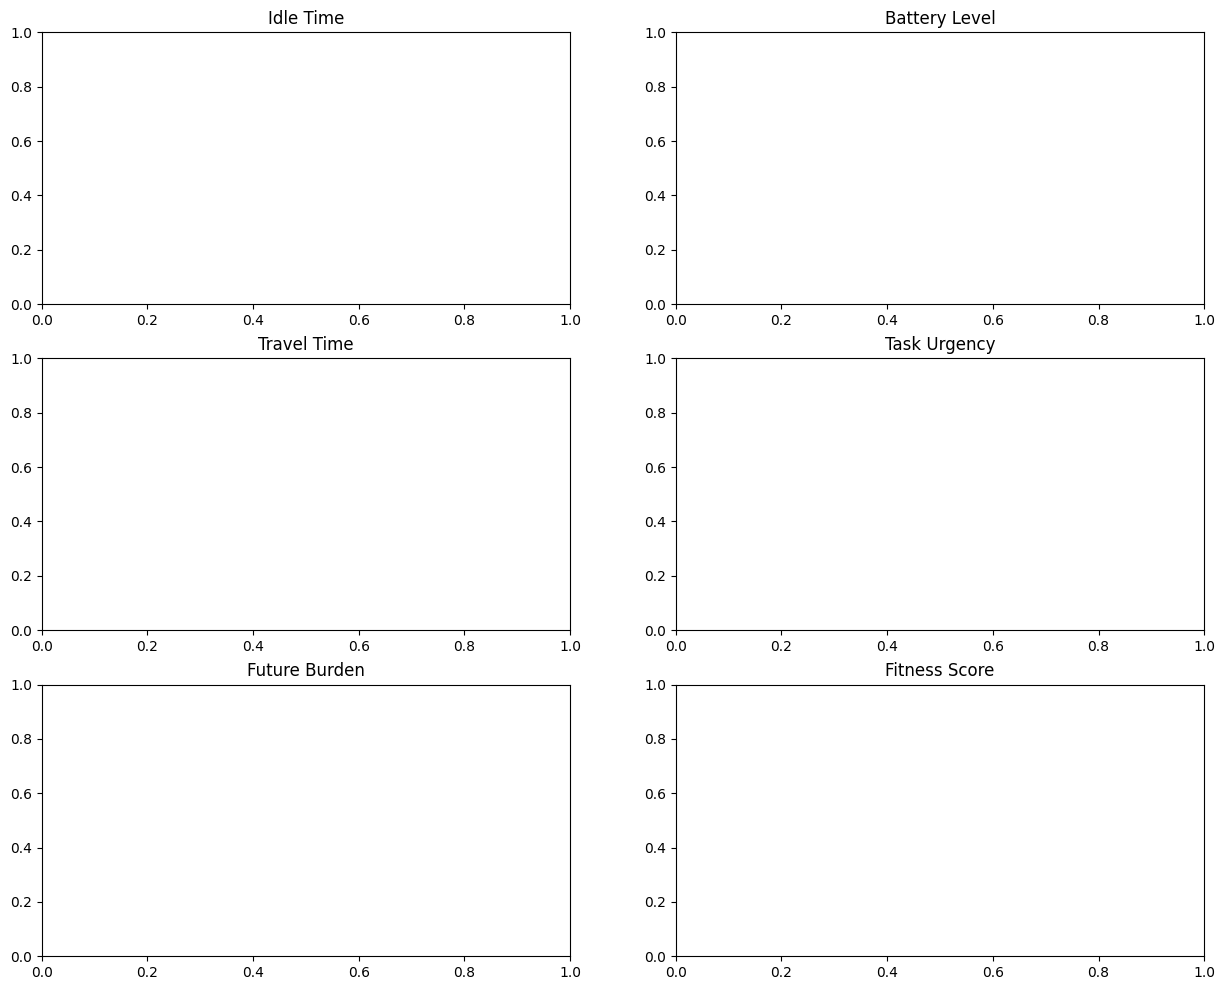

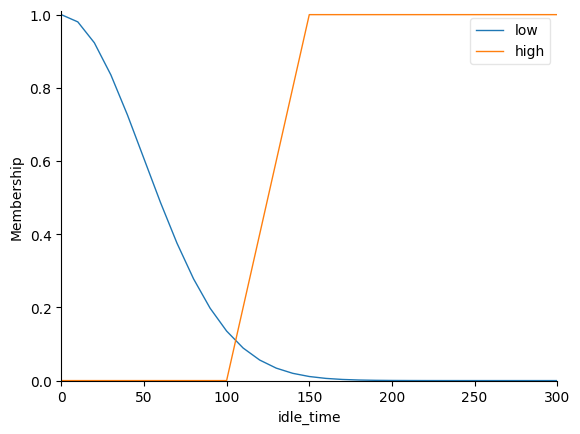

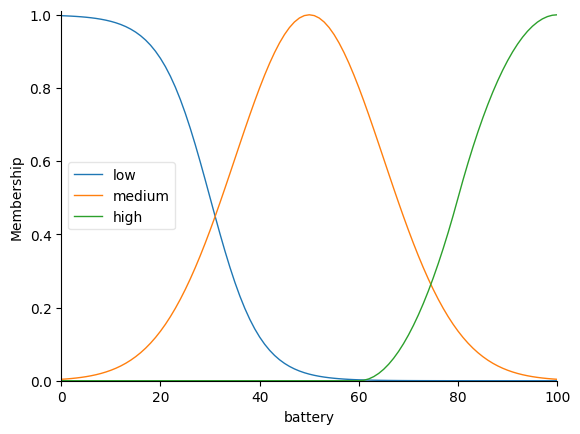

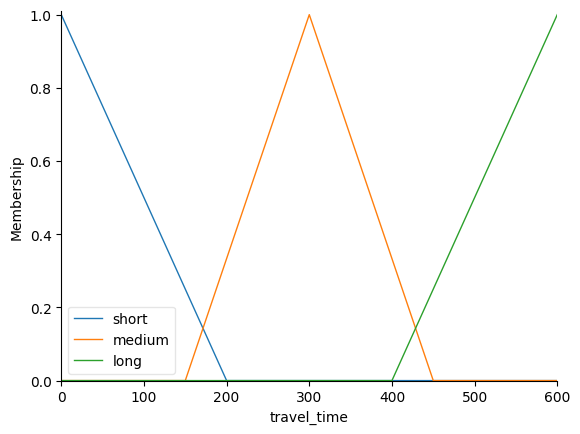

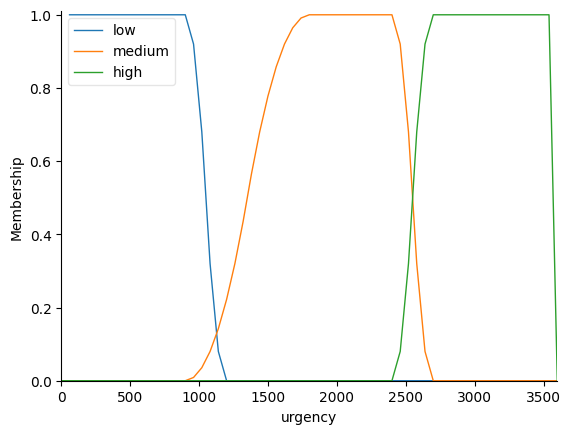

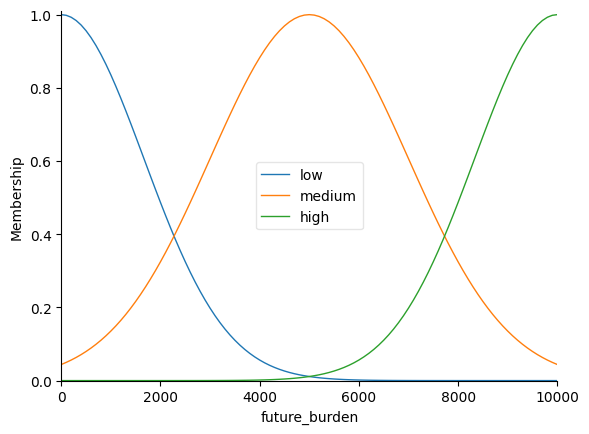

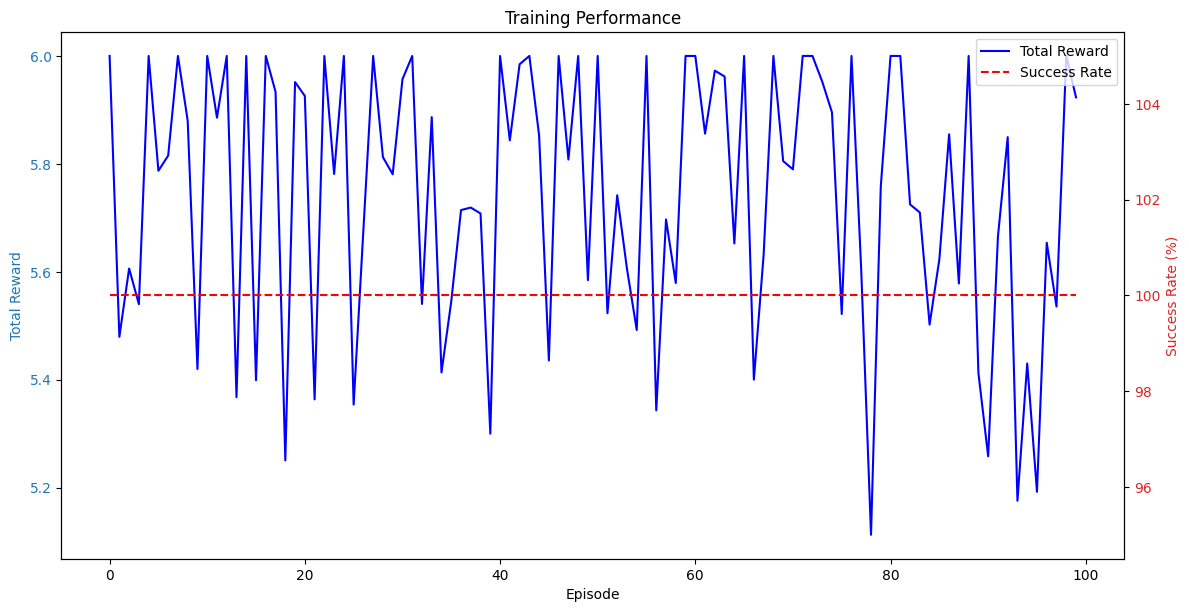

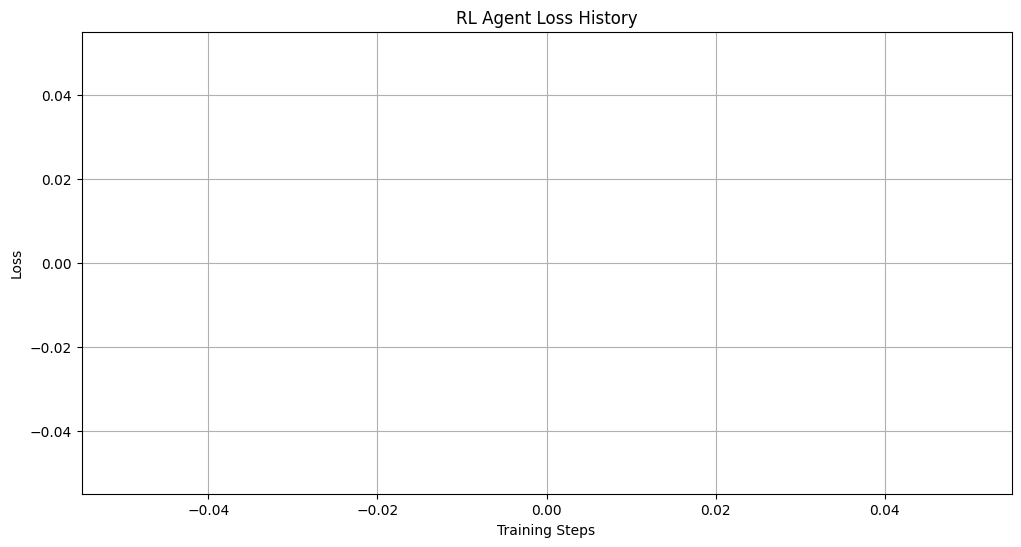


Final RL Agent Parameters:
Epsilon: 1.0000
Battery Low Params: [34.50608077226402, 43.54728452872129]
Battery Medium Params: [20, 50, 80]


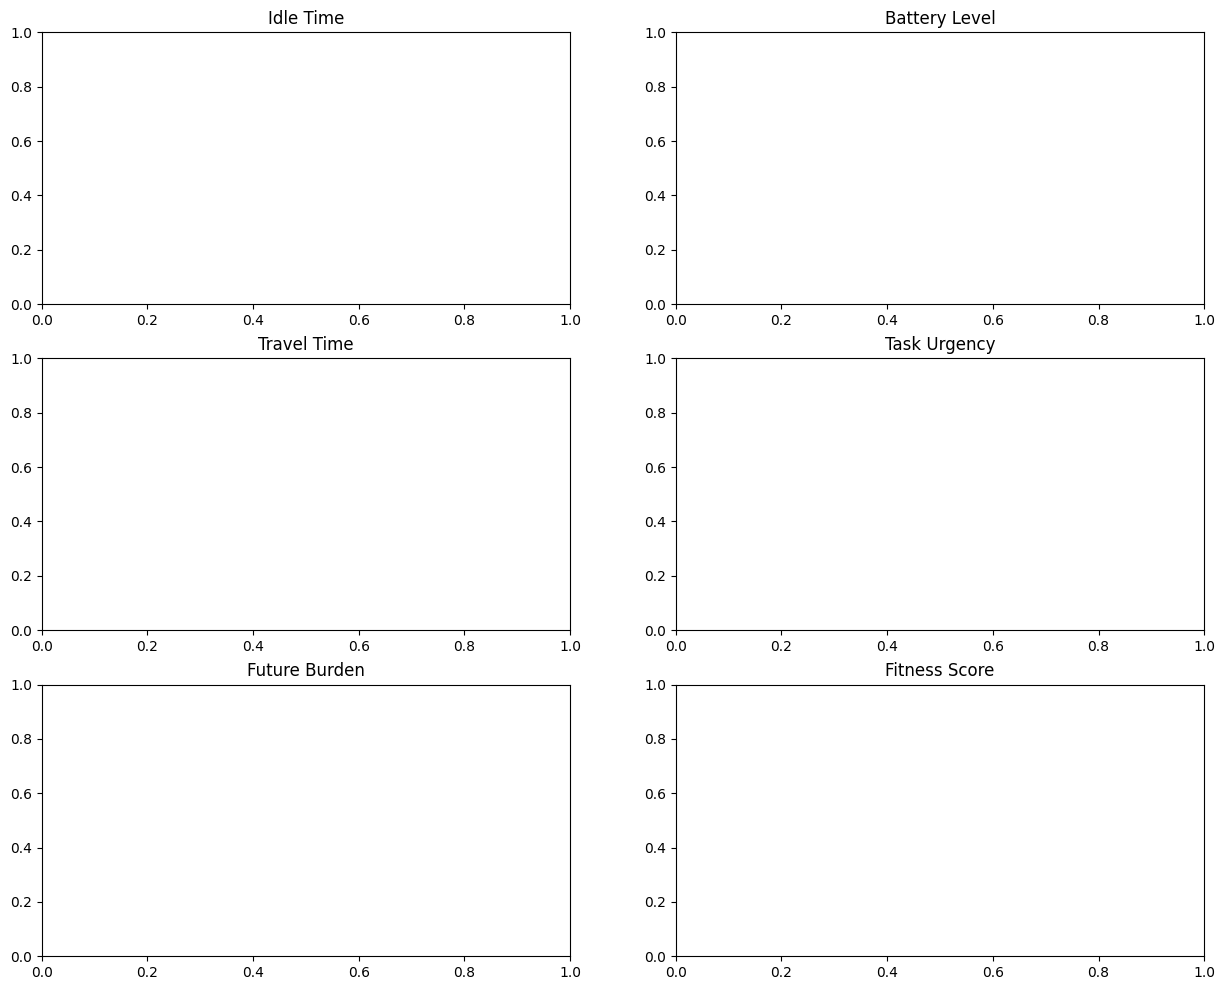

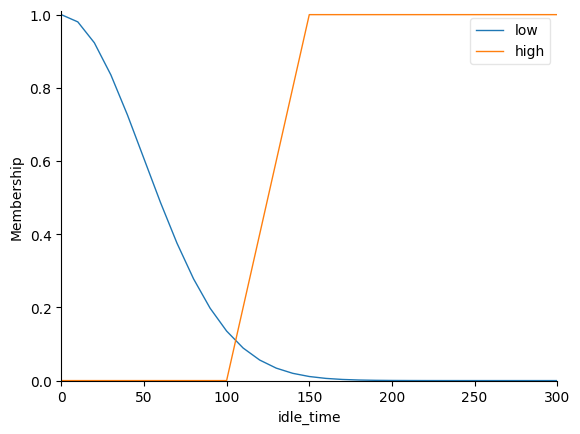

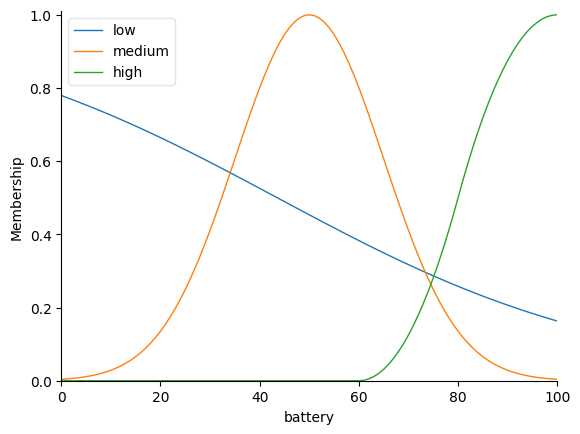

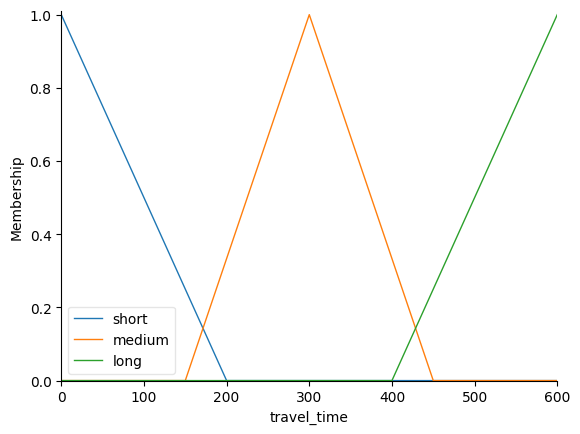

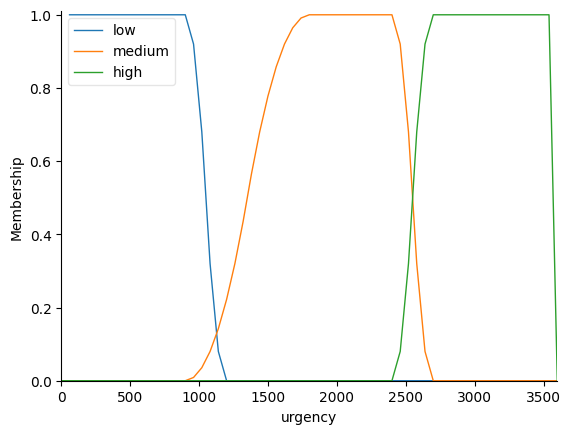

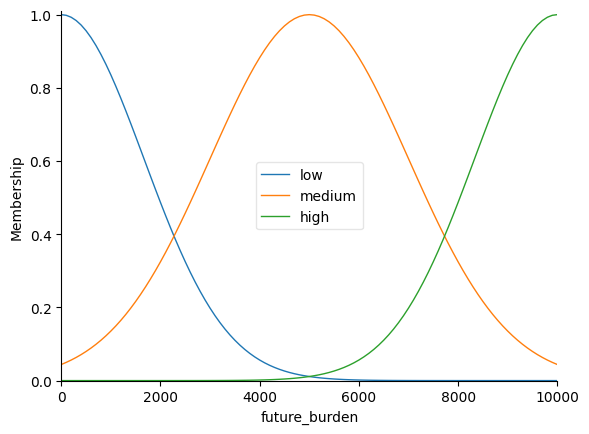

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import random
import time
from collections import deque
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Constants
CHARGING_RATE = 5.0  # % battery per second
OCCUPANCY_PENALTY = 30  # seconds penalty if charging station occupied
MAX_TRAVEL_TIME = 600  # seconds (10 minutes)
MAX_IDLE_TIME = 300  # seconds (5 minutes)
MAX_URGENCY = 3600  # seconds (1 hour)
MAX_BURDEN = 10000  # arbitrary max future burden

# Set device for PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class FuzzySystem:
    """Enhanced fuzzy inference system with adaptive membership functions"""

    def __init__(self):
        # Antecedents (Inputs)
        self.idle_time = ctrl.Antecedent(np.arange(0, MAX_IDLE_TIME+1, 10), 'idle_time')
        self.battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
        self.travel_time = ctrl.Antecedent(np.arange(0, MAX_TRAVEL_TIME+1, 10), 'travel_time')
        self.urgency = ctrl.Antecedent(np.arange(0, MAX_URGENCY+1, 60), 'urgency')
        self.future_burden = ctrl.Antecedent(np.arange(0, MAX_BURDEN+1, 100), 'future_burden')

        # Consequent (Output)
        self.fitness = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'fitness')

        # Initialize membership functions
        self._define_initial_membership_functions()

        # Rule base
        self.rules = self._create_rules()

        # Control system
        self.system = ctrl.ControlSystem(self.rules)
        self.simulator = ctrl.ControlSystemSimulation(self.system)

        # Adaptive parameters
        self.rule_weights = [1.0] * len(self.rules)  # Initial equal weights
        self.mf_params = {
            'battery_low': [0, 0, 40],
            'battery_medium': [20, 50, 80],
            'battery_high': [60, 100, 100],
            'idle_low': [0, 0, MAX_IDLE_TIME/3],
            'idle_high': [MAX_IDLE_TIME/3, MAX_IDLE_TIME, MAX_IDLE_TIME]
        }

    def _define_initial_membership_functions(self):
        """Define initial membership functions with various shapes"""
        # Idle Time: Gaussian for low, Trapezoid for high
        self.idle_time['low'] = fuzz.gaussmf(self.idle_time.universe, 0, MAX_IDLE_TIME/6)
        self.idle_time['high'] = fuzz.trapmf(self.idle_time.universe,
                                            [MAX_IDLE_TIME/3, MAX_IDLE_TIME/2,
                                             MAX_IDLE_TIME, MAX_IDLE_TIME])

        # Battery: Sigmoid for low, Gaussian for medium, Linear for high
        self.battery['low'] = fuzz.sigmf(self.battery.universe, 30, -0.2)
        self.battery['medium'] = fuzz.gaussmf(self.battery.universe, 50, 15)
        self.battery['high'] = fuzz.smf(self.battery.universe, 60, 100)

        # Travel Time: Triangular
        self.travel_time['short'] = fuzz.trimf(self.travel_time.universe, [0, 0, MAX_TRAVEL_TIME/3])
        self.travel_time['medium'] = fuzz.trimf(self.travel_time.universe,
                                              [MAX_TRAVEL_TIME/4, MAX_TRAVEL_TIME/2,
                                               3*MAX_TRAVEL_TIME/4])
        self.travel_time['long'] = fuzz.trimf(self.travel_time.universe,
                                            [2*MAX_TRAVEL_TIME/3, MAX_TRAVEL_TIME, MAX_TRAVEL_TIME])

        # Urgency: Piecewise linear
        self.urgency['low'] = fuzz.pimf(self.urgency.universe, 0, 0, MAX_URGENCY/4, MAX_URGENCY/3)
        self.urgency['medium'] = fuzz.pimf(self.urgency.universe,
                                         MAX_URGENCY/4, MAX_URGENCY/2,
                                         2*MAX_URGENCY/3, 3*MAX_URGENCY/4)
        self.urgency['high'] = fuzz.pimf(self.urgency.universe,
                                       2*MAX_URGENCY/3, 3*MAX_URGENCY/4,
                                       MAX_URGENCY, MAX_URGENCY)

        # Future Burden: Gaussian
        self.future_burden['low'] = fuzz.gaussmf(self.future_burden.universe, 0, MAX_BURDEN/6)
        self.future_burden['medium'] = fuzz.gaussmf(self.future_burden.universe, MAX_BURDEN/2, MAX_BURDEN/5)
        self.future_burden['high'] = fuzz.gaussmf(self.future_burden.universe, MAX_BURDEN, MAX_BURDEN/6)

        # Fitness: Custom shapes
        self.fitness['poor'] = fuzz.zmf(self.fitness.universe, 0.1, 0.4)
        self.fitness['fair'] = fuzz.gbellmf(self.fitness.universe, 0.15, 3, 0.5)
        self.fitness['good'] = fuzz.gbellmf(self.fitness.universe, 0.15, 3, 0.7)
        self.fitness['excellent'] = fuzz.smf(self.fitness.universe, 0.6, 1.0)

    def _create_rules(self):
        """Create initial rule base based on expert knowledge"""
        rules = [
            ctrl.Rule(self.idle_time['high'] & self.battery['medium'] |
                     self.idle_time['high'] & self.battery['high'],
                     self.fitness['good']),
            ctrl.Rule(self.battery['low'], self.fitness['poor']),
            ctrl.Rule(self.urgency['high'] & self.battery['high'] &
                     self.travel_time['short'], self.fitness['excellent']),
            ctrl.Rule(self.future_burden['high'], self.fitness['fair']),
            ctrl.Rule(self.battery['high'] & self.travel_time['short'] &
                     self.future_burden['low'], self.fitness['excellent']),
            ctrl.Rule(self.battery['medium'] & self.travel_time['medium'] &
                     self.idle_time['low'], self.fitness['fair']),
            ctrl.Rule(self.travel_time['long'], self.fitness['fair']),
            ctrl.Rule(self.idle_time['low'] | self.battery['medium'] |
                     self.urgency['medium'], self.fitness['good'])
        ]
        return rules

    def plot_membership_functions(self, filename=None):
        """Visualize all membership functions"""
        fig, axes = plt.subplots(3, 2, figsize=(15, 12))

        self.idle_time.view(ax=axes[0, 0])
        axes[0, 0].set_title('Idle Time')

        self.battery.view(ax=axes[0, 1])
        axes[0, 1].set_title('Battery Level')

        self.travel_time.view(ax=axes[1, 0])
        axes[1, 0].set_title('Travel Time')

        self.urgency.view(ax=axes[1, 1])
        axes[1, 1].set_title('Task Urgency')

        self.future_burden.view(ax=axes[2, 0])
        axes[2, 0].set_title('Future Burden')

        self.fitness.view(ax=axes[2, 1])
        axes[2, 1].set_title('Fitness Score')

        plt.tight_layout()
        if filename:
            plt.savefig(filename)
            plt.close()
        else:
            plt.show()

    def compute_fitness(self, idle_time, battery, travel_time, urgency, future_burden):
        """Compute fitness score with input validation"""
        idle_time = np.clip(idle_time, 0, MAX_IDLE_TIME)
        battery = np.clip(battery, 0, 100)
        travel_time = np.clip(travel_time, 0, MAX_TRAVEL_TIME)
        urgency = np.clip(urgency, 0, MAX_URGENCY)
        future_burden = np.clip(future_burden, 0, MAX_BURDEN)

        self.simulator.input['idle_time'] = idle_time
        self.simulator.input['battery'] = battery
        self.simulator.input['travel_time'] = travel_time
        self.simulator.input['urgency'] = urgency
        self.simulator.input['future_burden'] = future_burden

        try:
            self.simulator.compute()
            return np.clip(self.simulator.output['fitness'], 0, 1)
        except:
            return 0.0  # Fallback for computation errors

    def update_membership(self, param_name, new_values):
        """Update membership function parameters"""
        if param_name in self.mf_params:
            self.mf_params[param_name] = new_values

            # Update actual membership functions
            if 'battery' in param_name:
                _, level = param_name.split('_')
                if level == 'low':
                    self.battery['low'] = fuzz.sigmf(self.battery.universe, new_values[1], -1/new_values[0])
                elif level == 'medium':
                    self.battery['medium'] = fuzz.gaussmf(self.battery.universe, new_values[0], new_values[1])
                elif level == 'high':
                    self.battery['high'] = fuzz.smf(self.battery.universe, new_values[0], new_values[1])






class DQN(nn.Module):
    """Deep Q-Network for reinforcement learning"""

    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


class RLAgent:
    """Enhanced RL agent with experience replay and target network using PyTorch"""

    def __init__(self, state_dim, action_dim, learning_rate=0.001, discount_factor=0.95):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.lr = learning_rate
        self.gamma = discount_factor

        # Policy and target networks
        self.policy_net = DQN(state_dim, action_dim).to(device)
        self.target_net = DQN(state_dim, action_dim).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()

        # Optimizer
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=learning_rate)

        # Experience replay
        self.memory = deque(maxlen=2000)
        self.batch_size = 32

        # Exploration parameters
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995

        # Tracking
        self.loss_history = []

    def get_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.rand() <= self.epsilon:
            return np.random.rand(self.action_dim) * 2 - 1  # Random adjustments [-1, 1]

        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        with torch.no_grad():
            q_values = self.policy_net(state)
        return q_values.cpu().numpy()[0]

    def remember(self, state, action, reward, next_state, done):
        """Store experience in replay memory"""
        self.memory.append((state, action, reward, next_state, done))

    def replay(self):
        """Train on a batch of experiences from memory"""
        if len(self.memory) < self.batch_size:
            return

        # Sample batch from memory
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        # Convert to PyTorch tensors
        states = torch.FloatTensor(states).to(device)
        actions = torch.FloatTensor(actions).to(device)
        rewards = torch.FloatTensor(rewards).to(device)
        next_states = torch.FloatTensor(next_states).to(device)
        dones = torch.BoolTensor(dones).to(device)

        # Get Q-values for current states
        current_q = self.policy_net(states)

        # Compute target Q-values
        with torch.no_grad():
            next_q = self.target_net(next_states)
            max_next_q = next_q.max(1)[0]
            target_q = rewards + self.gamma * max_next_q * (~dones)

        # Compute loss
        loss = F.mse_loss(current_q, target_q.unsqueeze(1))

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Record loss
        self.loss_history.append(loss.item())

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def update_target_network(self):
        """Update target network weights"""
        self.target_net.load_state_dict(self.policy_net.state_dict())

    def save_model(self, path):
        torch.save(self.policy_net.state_dict(), path)

    def load_model(self, path):
        self.policy_net.load_state_dict(torch.load(path))
        self.target_net.load_state_dict(torch.load(path))
        self.target_net.eval()









class TaskDispatcher:
    """Complete dispatching system with training and evaluation"""

    def __init__(self):
        self.fuzzy = FuzzySystem()
        self.rl_agent = RLAgent(state_dim=5, action_dim=3)
        self.task_queue = []
        self.robots = {}
        self.performance_history = []
        self.training_history = {
            'episode': [],
            'reward': [],
            'success_rate': [],
            'avg_fitness': []
        }

        # Charging station state
        self.charging_stations = {
            'station1': {'occupied': False, 'robot_id': None}
        }

    def add_robot(self, robot_id, position, battery, velocity, payload_capacity):
        """Register a new robot in the system"""
        self.robots[robot_id] = {
            'position': position,
            'battery': battery,
            'velocity': velocity,
            'payload_capacity': payload_capacity,
            'last_seen': time.time(),
            'idle_start': time.time()  # Assume idle at registration
        }

    def add_task(self, task_id, task_type, priority, timestamp,
                pickup_pos=None, dropoff_pos=None, payload_size=0):
        """Add new task to the queue"""
        task = {
            'id': task_id,
            'type': task_type,
            'priority': priority,
            'timestamp': timestamp,
            'pickup_pos': pickup_pos,
            'dropoff_pos': dropoff_pos,
            'payload_size': payload_size
        }
        self.task_queue.append(task)

    def reset_simulation(self):
        """Reset simulation state for a new episode"""
        self.task_queue = []
        self.performance_history = []

        # Reset robot states
        for robot_id in self.robots:
            self.robots[robot_id]['battery'] = random.uniform(50, 100)
            self.robots[robot_id]['position'] = {
                'x': random.uniform(0, 100),
                'y': random.uniform(0, 100),
                'z': 0
            }
            self.robots[robot_id]['last_seen'] = time.time()
            self.robots[robot_id]['idle_start'] = time.time()

    def generate_random_task(self, task_id):
        """Generate a random task for simulation"""
        task_type = random.choice([0, 1, 2])
        priority = random.choice([1, 2, 3])

        if task_type == 0:  # Pickup and Delivery
            pickup_pos = {'x': random.uniform(0, 100), 'y': random.uniform(0, 100), 'z': 0}
            dropoff_pos = {'x': random.uniform(0, 100), 'y': random.uniform(0, 100), 'z': 0}
            return {
                'task_id': f"T{task_id}",  # FIXED: Changed from 'id' to 'task_id'
                'task_type': task_type,
                'priority': priority,
                'timestamp': time.time() - random.uniform(0, 600),
                'pickup_pos': pickup_pos,
                'dropoff_pos': dropoff_pos,
                'payload_size': random.uniform(1, 20)
            }
        else:  # Charging or Move
            dest_pos = {'x': random.uniform(0, 100), 'y': random.uniform(0, 100), 'z': 0}
            return {
                'task_id': f"T{task_id}",  # FIXED: Changed from 'id' to 'task_id'
                'task_type': task_type,
                'priority': priority,
                'timestamp': time.time() - random.uniform(0, 600),
                'pickup_pos': dest_pos,
                'dropoff_pos': None,
                'payload_size': 0
            }

    def _calculate_urgency(self, task):
        """Calculate task urgency based on priority and age"""
        priority_weight = {1: 0.3, 2: 0.6, 3: 1.0}
        age = time.time() - task['timestamp']
        return priority_weight[task['priority']] * age

    def _calculate_future_burden(self, robot_id, battery_after_task):
        """Estimate future burden for robot after task completion"""
        burden = (100 - battery_after_task) * len(self.task_queue)
        return min(burden, MAX_BURDEN)

    def compute_completion_time(self, robot_id, task):
        """Estimate task completion time and remaining battery"""
        robot = self.robots[robot_id]
        DRAIN_RATE = 0.1  # Battery drain per second

        # Calculate distances
        start_pos = robot['position']
        if task['type'] == 0:  # Pickup and Delivery
            dist1 = self.euclidean_distance(start_pos, task['pickup_pos'])
            dist2 = self.euclidean_distance(task['pickup_pos'], task['dropoff_pos'])
            total_dist = dist1 + dist2
        else:  # Charging or Move task
            dest_pos = task['pickup_pos']
            total_dist = self.euclidean_distance(start_pos, dest_pos)

        # Calculate time and battery drain
        travel_time = total_dist / robot['velocity']
        battery_drain = DRAIN_RATE * travel_time
        remaining_battery = robot['battery'] - battery_drain

        # Check battery sufficiency
        if remaining_battery < 10:
            return None, None

        return travel_time, remaining_battery

    def euclidean_distance(self, pos1, pos2):
        """Calculate 2D Euclidean distance (ignoring z-axis)"""
        return np.sqrt((pos2['x'] - pos1['x'])**2 + (pos2['y'] - pos1['y'])**2)

    def assign_task(self, robot_id, task):
        """Assign task to robot and simulate outcome"""
        # Update robot state
        robot = self.robots[robot_id]
        robot['current_task'] = task['id']
        robot['idle_start'] = None  # No longer idle

        # Simulate task execution
        travel_time, battery_after = self.compute_completion_time(robot_id, task)
        success = travel_time is not None

        # Calculate performance metrics
        if success:
            completion_time = travel_time
            if task['type'] == 1:  # Charging task
                station_occupied = self.charging_stations['station1']['occupied']
                charge_time = (100 - battery_after) / CHARGING_RATE
                completion_time += charge_time
                battery_after = 100  # Fully charged

            # Update robot state
            robot['battery'] = battery_after
            robot['position'] = task['pickup_pos']  # Simplified position update
            robot['last_seen'] = time.time()
        else:
            completion_time = MAX_TRAVEL_TIME * 2  # Penalty for failure

        # Calculate reward
        reward = self.calculate_reward(robot_id, task, completion_time, success)
        self.performance_history.append(reward)
        return reward, success

    def calculate_reward(self, robot_id, task, completion_time, success):
        """Calculate reward based on task performance"""
        if not success:
            return -2.0  # Heavy penalty for failure

        robot = self.robots[robot_id]

        # Base success reward
        reward = 1.0

        # Timeliness penalty
        expected_time = MAX_TRAVEL_TIME * 0.3
        timeliness = max(0, 1 - (completion_time - expected_time) / expected_time)
        reward *= timeliness

        # Battery preservation bonus
        battery_bonus = robot['battery'] / 100.0
        reward += 0.2 * battery_bonus

        # Urgency bonus
        if task['priority'] == 3:  # High priority
            reward *= 1.5
        elif task['priority'] == 2:  # Medium priority
            reward *= 1.2

        return np.clip(reward, -2.0, 2.0)

    def dispatch_tasks(self, training=True):
        """Dispatch tasks with RL adaptation"""
        total_reward = 0
        success_count = 0

        for task in self.task_queue[:]:
            best_robot = None
            best_score = -1

            # Evaluate all robots for current task
            for robot_id, robot in self.robots.items():
                # Skip robots that are already busy with a task
                if robot.get('idle_start') is None:
                    continue

                # Skip robots with insufficient payload capacity
                if task['payload_size'] > robot['payload_capacity']:
                    continue

                # Calculate inputs for fuzzy system
                idle_time = time.time() - robot['idle_start']
                travel_time, battery_after = self.compute_completion_time(robot_id, task)

                # Skip if insufficient battery
                if travel_time is None:
                    continue

                urgency = self._calculate_urgency(task)
                future_burden = self._calculate_future_burden(robot_id, battery_after)

                # Normalize inputs for RL state
                state = np.array([
                    idle_time / MAX_IDLE_TIME,
                    robot['battery'] / 100.0,
                    travel_time / MAX_TRAVEL_TIME,
                    urgency / MAX_URGENCY,
                    future_burden / MAX_BURDEN
                ])

                # Get RL action (parameter adjustments)
                action = self.rl_agent.get_action(state)

                # Apply adjustments to membership functions
                self.fuzzy.update_membership('battery_low', [30 + action[0]*10, 40 + action[1]*10])

                # Compute fitness score
                score = self.fuzzy.compute_fitness(
                    idle_time=idle_time,
                    battery=robot['battery'],
                    travel_time=travel_time,
                    urgency=urgency,
                    future_burden=future_burden
                )

                # Track best robot
                if score > best_score:
                    best_score = score
                    best_robot = robot_id
                    best_state = state

            # Assign task to best robot
            if best_robot:
                reward, success = self.assign_task(best_robot, task)
                total_reward += reward
                success_count += 1 if success else 0

                # Record experience for RL
                next_state = np.array([
                    0,  # Reset idle time after assignment
                    self.robots[best_robot]['battery'] / 100.0,
                    0,  # Reset travel time
                    0,  # Reset urgency
                    self._calculate_future_burden(best_robot, self.robots[best_robot]['battery']) / MAX_BURDEN
                ])

                if training:
                    # Record experience for RL
                    self.rl_agent.remember(
                        best_state,
                        action,
                        reward,
                        next_state,
                        False  # done flag
                    )

                self.task_queue.remove(task)

        # Train RL agent
        if training and len(self.task_queue) == 0:
            self.rl_agent.replay()
            self.rl_agent.update_target_network()

        # Calculate metrics
        success_rate = success_count / len(self.robots) if self.robots else 0
        return total_reward, success_rate

    def train(self, episodes=50, tasks_per_episode=10):
        """Train the system over multiple episodes"""
        for episode in tqdm(range(episodes), desc="Training"):
            self.reset_simulation()

            # Generate random robots
            for i in range(3):  # 3 robots
                self.add_robot(
                    robot_id=f"R{i}",
                    position={'x': random.uniform(0,100), 'y': random.uniform(0,100), 'z':0},
                    battery=random.uniform(50, 100),
                    velocity=random.uniform(0.8, 1.5),
                    payload_capacity=random.uniform(10, 20)
                )

            # Generate random tasks
            for i in range(tasks_per_episode):
                task = self.generate_random_task(i)
                self.add_task(**task)  # Now matches method signature

            # Run dispatch
            total_reward, success_rate = self.dispatch_tasks(training=True)

            # Record performance
            self.training_history['episode'].append(episode)
            self.training_history['reward'].append(total_reward)
            self.training_history['success_rate'].append(success_rate)

        # Save final model
        self.rl_agent.save_model("rl_agent_model.pth")

    def evaluate(self, tasks_per_episode=10):
        """Evaluate the trained system"""
        self.reset_simulation()

        # Generate random robots
        for i in range(3):  # 3 robots
            self.add_robot(
                robot_id=f"R{i}",
                position={'x': random.uniform(0,100), 'y': random.uniform(0,100), 'z':0},
                battery=random.uniform(50, 100),
                velocity=random.uniform(0.8, 1.5),
                payload_capacity=random.uniform(10, 20)
            )

        # Generate random tasks
        for i in range(tasks_per_episode):
            task = self.generate_random_task(i)
            self.add_task(**task)  # Now matches method signature

        # Run dispatch without training
        total_reward, success_rate = self.dispatch_tasks(training=False)

        print(f"\nEvaluation Results:")
        print(f"Total Reward: {total_reward:.2f}")
        print(f"Success Rate: {success_rate*100:.1f}%")
        print(f"Average Fitness: {np.mean(self.performance_history):.3f}")

    def plot_training_history(self):
        """Visualize training progress"""
        fig, ax1 = plt.subplots(figsize=(12, 6))

        # Reward plot
        color = 'tab:blue'
        ax1.set_xlabel('Episode')
        ax1.set_ylabel('Total Reward', color=color)
        ax1.plot(self.training_history['episode'], self.training_history['reward'],
                'b-', label='Total Reward')
        ax1.tick_params(axis='y', labelcolor=color)

        # Success rate plot
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Success Rate (%)', color=color)
        ax2.plot(self.training_history['episode'],
                [x*100 for x in self.training_history['success_rate']],
                'r--', label='Success Rate')
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()
        plt.title('Training Performance')
        fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
        plt.savefig('training_history.png')
        plt.show()

        # Plot loss history
        plt.figure(figsize=(12, 6))
        plt.plot(self.rl_agent.loss_history)
        plt.title('RL Agent Loss History')
        plt.xlabel('Training Steps')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.savefig('rl_loss_history.png')
        plt.show()


# Main execution
if __name__ == "__main__":
    # Initialize system
    dispatcher = TaskDispatcher()

    # Visualize initial membership functions
    dispatcher.fuzzy.plot_membership_functions('initial_membership.png')

    # Train the system
    dispatcher.train(episodes=100, tasks_per_episode=15)

    # Evaluate performance
    dispatcher.evaluate(tasks_per_episode=20)

    # Plot training history
    dispatcher.plot_training_history()

    # Visualize final membership functions
    dispatcher.fuzzy.plot_membership_functions('final_membership.png')

    # Save final rule weights and parameters
    print("\nFinal RL Agent Parameters:")
    print(f"Epsilon: {dispatcher.rl_agent.epsilon:.4f}")
    print(f"Battery Low Params: {dispatcher.fuzzy.mf_params['battery_low']}")
    print(f"Battery Medium Params: {dispatcher.fuzzy.mf_params['battery_medium']}")

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import time

# Constants
CHARGING_RATE = 5.0  # % battery per second
OCCUPANCY_PENALTY = 30  # seconds penalty if charging station occupied
DRAIN_RATE = 0.1  # Battery drain in % per second
MIN_BATTERY = 10.0
MAX_TASK_AGE = 3600  # 1 hour
MAX_TRAVEL_TIME = 600
MAX_IDLE_TIME = 300
MAX_QUEUE_LENGTH = 20

class FuzzyDecisionSystem:
    def __init__(self):
        # Inputs
        self.idle_time = ctrl.Antecedent(np.arange(0, MAX_IDLE_TIME + 1, 5), 'idle_time')
        self.battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
        self.travel_time = ctrl.Antecedent(np.arange(0, MAX_TRAVEL_TIME + 1, 10), 'travel_time')
        self.task_age = ctrl.Antecedent(np.arange(0, MAX_TASK_AGE + 1, 60), 'task_age')
        self.future_burden = ctrl.Antecedent(np.arange(0, 10001, 100), 'future_burden')

        # Output
        self.fitness = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'fitness')

        self._define_membership_functions()
        self._define_rules()

    def _define_membership_functions(self):
        # Idle Time
        self.idle_time['low'] = fuzz.trimf(self.idle_time.universe, [0, 0, 100])
        self.idle_time['high'] = fuzz.trimf(self.idle_time.universe, [100, MAX_IDLE_TIME, MAX_IDLE_TIME])

        # Battery
        self.battery['low'] = fuzz.trimf(self.battery.universe, [0, 0, 40])
        self.battery['medium'] = fuzz.trimf(self.battery.universe, [30, 50, 70])
        self.battery['high'] = fuzz.trimf(self.battery.universe, [60, 100, 100])

        # Travel Time
        self.travel_time['short'] = fuzz.trimf(self.travel_time.universe, [0, 0, 200])
        self.travel_time['medium'] = fuzz.trimf(self.travel_time.universe, [150, 300, 450])
        self.travel_time['long'] = fuzz.trimf(self.travel_time.universe, [400, MAX_TRAVEL_TIME, MAX_TRAVEL_TIME])

        # Task Age (Urgency)
        self.task_age['low'] = fuzz.trimf(self.task_age.universe, [0, 0, 600])
        self.task_age['medium'] = fuzz.trimf(self.task_age.universe, [500, 1500, 2500])
        self.task_age['high'] = fuzz.trimf(self.task_age.universe, [2000, MAX_TASK_AGE, MAX_TASK_AGE])

        # Future Burden
        self.future_burden['low'] = fuzz.trimf(self.future_burden.universe, [0, 0, 3000])
        self.future_burden['medium'] = fuzz.trimf(self.future_burden.universe, [2000, 5000, 8000])
        self.future_burden['high'] = fuzz.trimf(self.future_burden.universe, [7000, 10000, 10000])

        # Fitness
        self.fitness['poor'] = fuzz.trimf(self.fitness.universe, [0, 0, 0.4])
        self.fitness['fair'] = fuzz.trimf(self.fitness.universe, [0.3, 0.5, 0.7])
        self.fitness['good'] = fuzz.trimf(self.fitness.universe, [0.6, 0.8, 1.0])

    def _define_rules(self):
        rules = [
            ctrl.Rule(self.idle_time['high'] & self.battery['medium'], self.fitness['good']),
            ctrl.Rule(self.battery['low'] | self.future_burden['high'], self.fitness['poor']),
            ctrl.Rule(self.task_age['high'] & self.travel_time['short'], self.fitness['good']),
            ctrl.Rule(self.task_age['medium'] & self.travel_time['medium'], self.fitness['fair']),
            ctrl.Rule(self.battery['high'] & self.future_burden['low'], self.fitness['good']),
            ctrl.Rule(self.idle_time['low'] & self.battery['low'], self.fitness['poor']),
            ctrl.Rule(self.travel_time['long'], self.fitness['fair'])
        ]

        self.system = ctrl.ControlSystem(rules)
        self.sim = ctrl.ControlSystemSimulation(self.system)

    def compute_fitness(self, idle_time, battery, travel_time, task_age, future_burden):
        self.sim.input['idle_time'] = min(idle_time, MAX_IDLE_TIME)
        self.sim.input['battery'] = min(battery, 100)
        self.sim.input['travel_time'] = min(travel_time, MAX_TRAVEL_TIME)
        self.sim.input['task_age'] = min(task_age, MAX_TASK_AGE)
        self.sim.input['future_burden'] = min(future_burden, 10000)

        try:
            self.sim.compute()
            return self.sim.output['fitness']
        except:
            return 0.0

def calculate_charge_duration(current_battery, queue_length, station_occupied):
    buffer = 70 if queue_length > 5 else 30
    target_battery = min(100, current_battery + buffer)
    charge_time = (target_battery - current_battery) / CHARGING_RATE
    return charge_time + (OCCUPANCY_PENALTY if station_occupied else 0)

def compute_completion_time(task_type, rbt_curr_pos, pickup_pos, dropoff_pos=None, rbt_velocity=1.0, current_battery=50.0):
    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos2['x'] - pos1['x'])**2 + (pos2['y'] - pos1['y'])**2)

    if pickup_pos is None:
        raise ValueError("Pickup position is required.")

    time_to_pickup = euclidean_distance(rbt_curr_pos, pickup_pos) / rbt_velocity
    battery_depletion_pickup = DRAIN_RATE * time_to_pickup
    remaining_battery = current_battery - battery_depletion_pickup

    if task_type == 0:  # Pickup and delivery
        if dropoff_pos is None:
            raise ValueError("Dropoff position is required for delivery tasks.")
        time_dropoff = euclidean_distance(pickup_pos, dropoff_pos) / rbt_velocity
        battery_depletion_dropoff = DRAIN_RATE * time_dropoff
        total_time = time_to_pickup + time_dropoff
        remaining_battery -= battery_depletion_dropoff
    else:
        total_time = time_to_pickup

    if remaining_battery < MIN_BATTERY:
        return None, None

    return total_time, remaining_battery

def estimate_future_burden(battery_after_task, queue_length):
    return (100 - battery_after_task) * queue_length


In [ ]:

#            'payload_capacity': payload_capacity,
#             'payload_size': payload_size


Fitness score for Robot robot_001 on task: 0.80


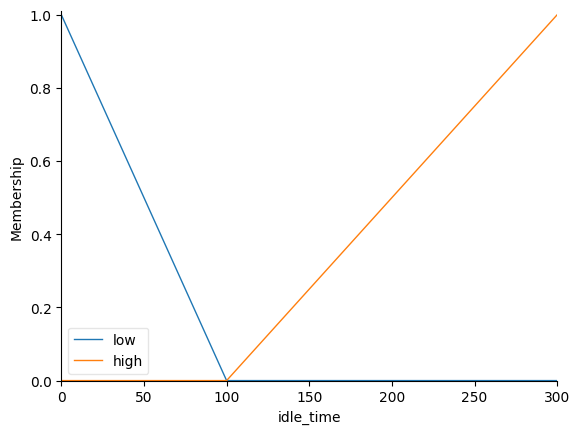

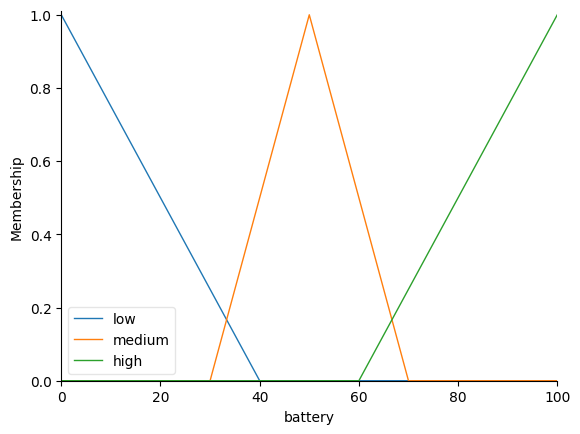

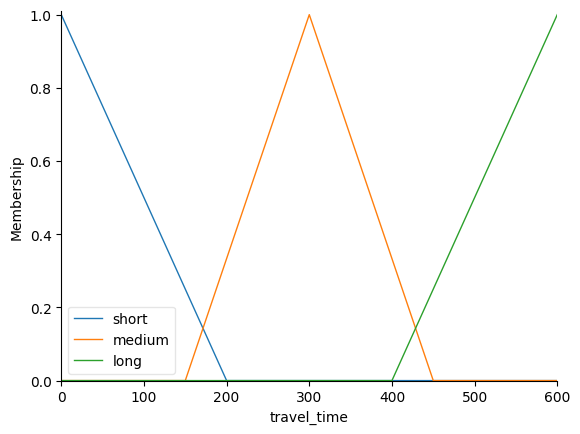

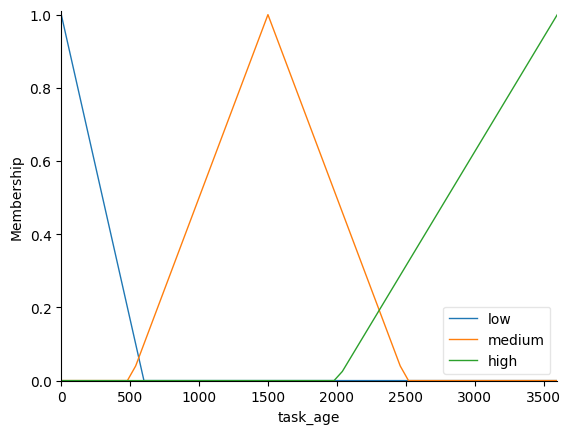

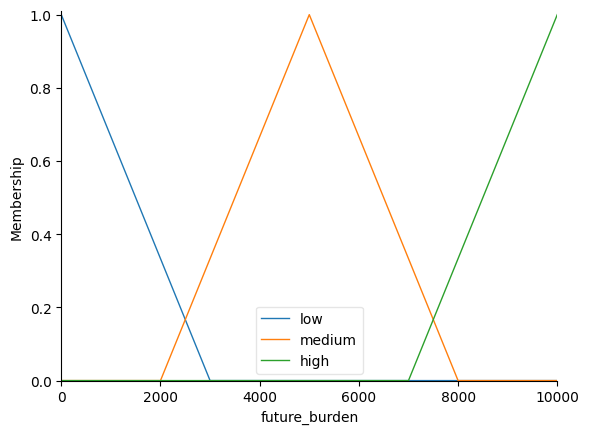

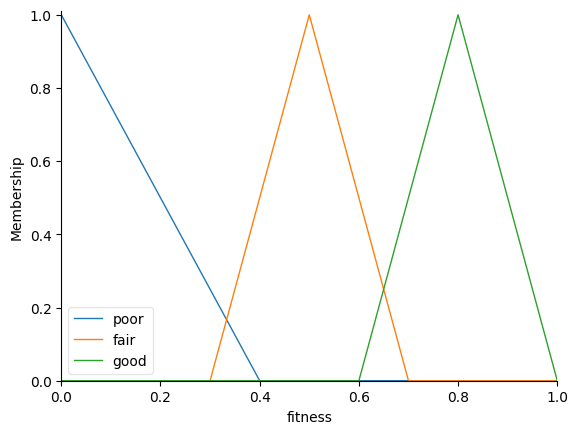

Charge Task Score (lower duration → higher fitness): 0.68


In [ ]:
fuzzy_system = FuzzyDecisionSystem()

robot = {
    "id": "robot_001",
    "position": {"x": 10, "y": 5},
    "battery": 60,
    "velocity": 1.0,
    "idle_time": 180  # in seconds
}

task = {
    "type": 0,  # Pickup & Delivery
    "pickup": {"x": 15, "y": 10},
    "dropoff": {"x": 25, "y": 15},
    "priority": 3,
    "timestamp": time.time() - 1200,  # created 20 min ago
}

task_queue_length = 6

# Estimate travel and battery after task
travel_time, battery_after = compute_completion_time(
    task_type=task["type"],
    rbt_curr_pos=robot["position"],
    pickup_pos=task["pickup"],
    dropoff_pos=task["dropoff"],
    rbt_velocity=robot["velocity"],
    current_battery=robot["battery"]
)

# Skip robot if battery insufficient
if travel_time is None:
    print("Robot cannot take task.")
else:
    # Calculate task age
    task_age = time.time() - task["timestamp"]

    # Estimate future burden
    future_burden = estimate_future_burden(battery_after, task_queue_length)

    # Compute fuzzy fitness
    fitness = fuzzy_system.compute_fitness(
        idle_time=robot["idle_time"],
        battery=robot["battery"],
        travel_time=travel_time,
        task_age=task_age,
        future_burden=future_burden
    )

    print(f"Fitness score for Robot {robot['id']} on task: {fitness:.2f}")

import matplotlib.pyplot as plt

fuzzy_system.idle_time.view()
fuzzy_system.battery.view()
fuzzy_system.travel_time.view()
fuzzy_system.task_age.view()
fuzzy_system.future_burden.view()
fuzzy_system.fitness.view()
plt.show()

charge_duration = calculate_charge_duration(
    current_battery=robot["battery"],
    queue_length=task_queue_length,
    station_occupied=True  # Assume occupied
)

# Normalize to a pseudo-fitness (lower is better for charge)
normalized_score = 1.0 - min(charge_duration / 120.0, 1.0)  # Assume 120 sec max
print(f"Charge Task Score (lower duration → higher fitness): {normalized_score:.2f}")


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import time

# Constants
CHARGING_RATE = 5.0  # % battery per second
OCCUPANCY_PENALTY = 30  # seconds penalty if charging station occupied
DRAIN_RATE = 0.1  # Battery drain in % per second
MIN_BATTERY = 10.0
MAX_TASK_AGE = 3600  # 1 hour
MAX_TRAVEL_TIME = 600
MAX_IDLE_TIME = 300
MAX_QUEUE_LENGTH = 20

class FuzzyDecisionSystem:
    def __init__(self):
        # Inputs
        self.idle_time = ctrl.Antecedent(np.arange(0, MAX_IDLE_TIME + 1, 5), 'idle_time')
        self.battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
        self.travel_time = ctrl.Antecedent(np.arange(0, MAX_TRAVEL_TIME + 1, 10), 'travel_time')
        self.task_age = ctrl.Antecedent(np.arange(0, MAX_TASK_AGE + 1, 60), 'task_age')
        self.future_burden = ctrl.Antecedent(np.arange(0, 10001, 100), 'future_burden')
        self.payload_efficiency = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'payload_efficiency')

        # Output
        self.fitness = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'fitness')

        self._define_membership_functions()
        self._define_rules()

    def _define_membership_functions(self):
        self.idle_time['low'] = fuzz.trimf(self.idle_time.universe, [0, 0, 100])
        self.idle_time['high'] = fuzz.trimf(self.idle_time.universe, [100, MAX_IDLE_TIME, MAX_IDLE_TIME])

        self.battery['low'] = fuzz.trimf(self.battery.universe, [0, 0, 40])
        self.battery['medium'] = fuzz.trimf(self.battery.universe, [30, 50, 70])
        self.battery['high'] = fuzz.trimf(self.battery.universe, [60, 100, 100])

        self.travel_time['short'] = fuzz.trimf(self.travel_time.universe, [0, 0, 200])
        self.travel_time['medium'] = fuzz.trimf(self.travel_time.universe, [150, 300, 450])
        self.travel_time['long'] = fuzz.trimf(self.travel_time.universe, [400, MAX_TRAVEL_TIME, MAX_TRAVEL_TIME])

        self.task_age['low'] = fuzz.trimf(self.task_age.universe, [0, 0, 600])
        self.task_age['medium'] = fuzz.trimf(self.task_age.universe, [500, 1500, 2500])
        self.task_age['high'] = fuzz.trimf(self.task_age.universe, [2000, MAX_TASK_AGE, MAX_TASK_AGE])

        self.future_burden['low'] = fuzz.trimf(self.future_burden.universe, [0, 0, 3000])
        self.future_burden['medium'] = fuzz.trimf(self.future_burden.universe, [2000, 5000, 8000])
        self.future_burden['high'] = fuzz.trimf(self.future_burden.universe, [7000, 10000, 10000])

        self.payload_efficiency['underutilized'] = fuzz.trimf(self.payload_efficiency.universe, [0, 0, 0.4])
        self.payload_efficiency['balanced'] = fuzz.trimf(self.payload_efficiency.universe, [0.3, 0.6, 0.9])
        self.payload_efficiency['overloaded'] = fuzz.trimf(self.payload_efficiency.universe, [0.8, 1, 1])

        self.fitness['poor'] = fuzz.trimf(self.fitness.universe, [0, 0, 0.4])
        self.fitness['fair'] = fuzz.trimf(self.fitness.universe, [0.3, 0.5, 0.7])
        self.fitness['good'] = fuzz.trimf(self.fitness.universe, [0.6, 0.8, 1.0])

    def _define_rules(self):
        rules = [
            ctrl.Rule(self.idle_time['high'] & self.battery['medium'], self.fitness['good']),
            ctrl.Rule(self.battery['low'] | self.future_burden['high'], self.fitness['poor']),
            ctrl.Rule(self.task_age['high'] & self.travel_time['short'], self.fitness['good']),
            ctrl.Rule(self.task_age['medium'] & self.travel_time['medium'], self.fitness['fair']),
            ctrl.Rule(self.battery['high'] & self.future_burden['low'], self.fitness['good']),
            ctrl.Rule(self.idle_time['low'] & self.battery['low'], self.fitness['poor']),
            ctrl.Rule(self.travel_time['long'], self.fitness['fair']),
            ctrl.Rule(self.payload_efficiency['overloaded'], self.fitness['poor']),
            ctrl.Rule(self.payload_efficiency['balanced'], self.fitness['good'])
        ]

        self.system = ctrl.ControlSystem(rules)
        self.sim = ctrl.ControlSystemSimulation(self.system)

    def compute_fitness(self, idle_time, battery, travel_time, task_age, future_burden, payload_efficiency):
        self.sim.input['idle_time'] = min(idle_time, MAX_IDLE_TIME)
        self.sim.input['battery'] = min(battery, 100)
        self.sim.input['travel_time'] = min(travel_time, MAX_TRAVEL_TIME)
        self.sim.input['task_age'] = min(task_age, MAX_TASK_AGE)
        self.sim.input['future_burden'] = min(future_burden, 10000)
        self.sim.input['payload_efficiency'] = min(max(payload_efficiency, 0), 1.0)

        try:
            self.sim.compute()
            return self.sim.output['fitness']
        except:
            return 0.0

def calculate_charge_duration(current_battery, queue_length, station_occupied):
    buffer = 70 if queue_length > 5 else 30
    target_battery = min(100, current_battery + buffer)
    charge_time = (target_battery - current_battery) / CHARGING_RATE
    return charge_time + (OCCUPANCY_PENALTY if station_occupied else 0)

def compute_completion_time(task_type, rbt_curr_pos, pickup_pos, dropoff_pos=None, rbt_velocity=1.0, current_battery=50.0):
    def euclidean_distance(pos1, pos2):
        return np.sqrt((pos2['x'] - pos1['x'])**2 + (pos2['y'] - pos1['y'])**2)

    if pickup_pos is None:
        raise ValueError("Pickup position is required.")

    time_to_pickup = euclidean_distance(rbt_curr_pos, pickup_pos) / rbt_velocity
    battery_depletion_pickup = DRAIN_RATE * time_to_pickup
    remaining_battery = current_battery - battery_depletion_pickup

    if task_type == 0:  # Pickup and delivery
        if dropoff_pos is None:
            raise ValueError("Dropoff position is required for delivery tasks.")
        time_dropoff = euclidean_distance(pickup_pos, dropoff_pos) / rbt_velocity
        battery_depletion_dropoff = DRAIN_RATE * time_dropoff
        total_time = time_to_pickup + time_dropoff
        remaining_battery -= battery_depletion_dropoff
    else:
        total_time = time_to_pickup

    if remaining_battery < MIN_BATTERY:
        return None, None

    return total_time, remaining_battery

def estimate_future_burden(battery_after_task, queue_length):
    return (100 - battery_after_task) * queue_length

def compute_charging_opportunity_cost(cost_of_traversal,num_available_robots,charge_queue_length):
    # Step 1: Estimate how much battery is left to charge
    effective_charge_time = max(0, cost_of_traversal - OCCUPANCY_PENALTY)
    estimated_charge_needed = effective_charge_time * CHARGING_RATE  # in %
    base_cost = estimated_charge_needed / 100  # normalize to [0, 1]
    # Step 2: Estimate scarcity of charging resources
    scarcity_factor = (charge_queue_length + 1) / (num_available_robots + 1)
    # Step 3: Final opportunity cost
    opportunity_cost = base_cost * scarcity_factor
    return opportunity_cost


Fitness score for Robot robot_001 on task: 0.80


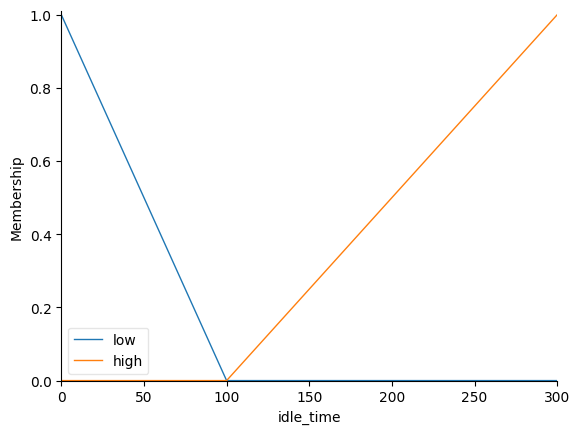

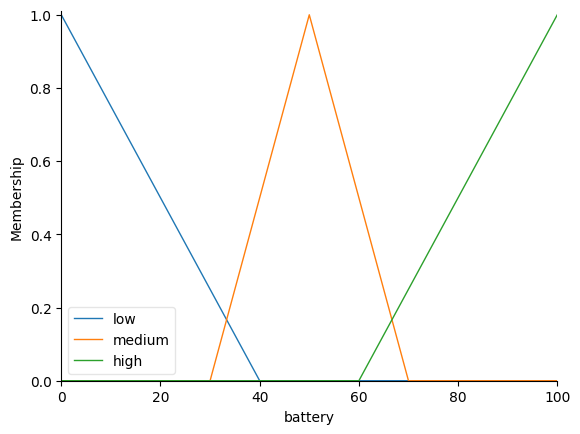

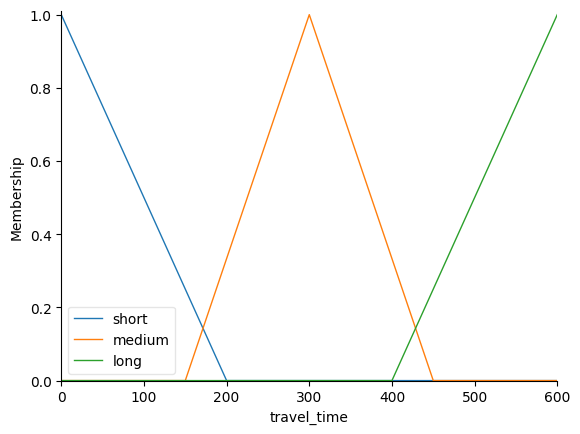

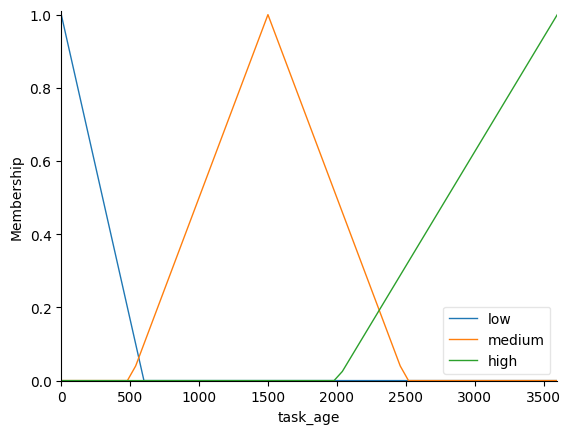

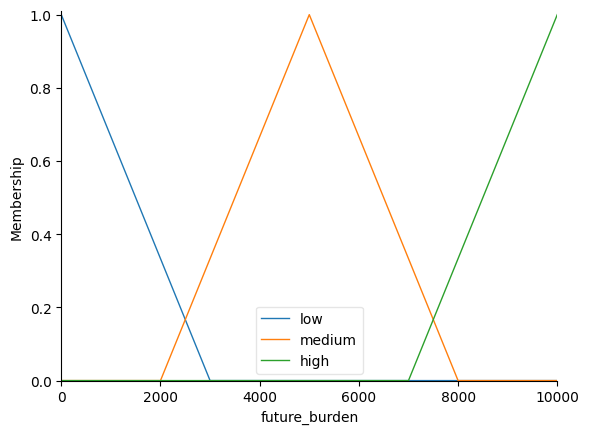

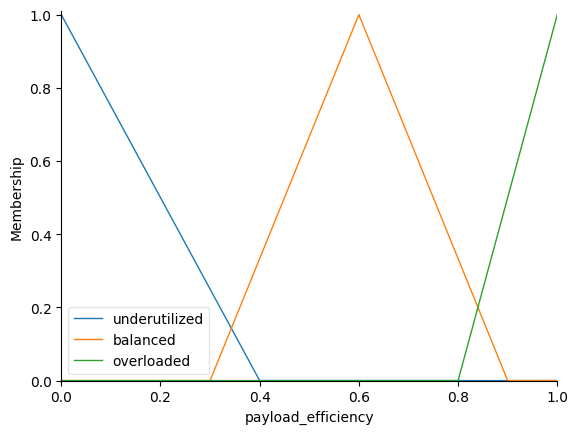

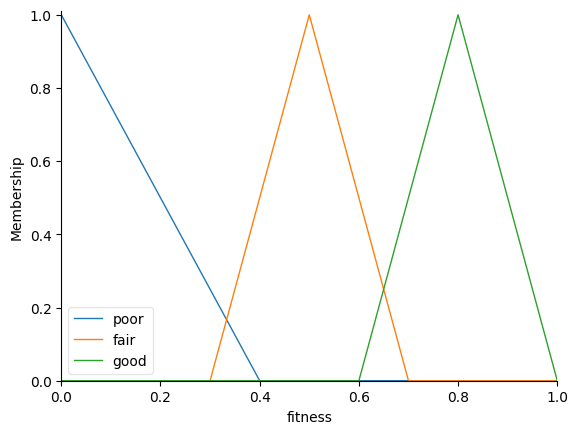

Charge Task Score (lower duration → higher fitness): 0.68


In [17]:

# Test block
if __name__ == "__main__":
    fuzzy_system = FuzzyDecisionSystem()

    robot = {
        "id": "robot_001",
        "position": {"x": 10, "y": 5},
        "battery": 60,
        "velocity": 1.0,
        "idle_time": 180,
        "payload_capacity": 50  # in kg
    }

    task = {
        "type": 0,
        "pickup": {"x": 15, "y": 10},
        "dropoff": {"x": 25, "y": 15},
        "priority": 3,
        "timestamp": time.time() - 1200,
        "payload": 20  # in kg
    }

    task_queue_length = 6

    travel_time, battery_after = compute_completion_time(
        task_type=task["type"],
        rbt_curr_pos=robot["position"],
        pickup_pos=task["pickup"],
        dropoff_pos=task["dropoff"],
        rbt_velocity=robot["velocity"],
        current_battery=robot["battery"]
    )

    if travel_time is None:
        print("Robot cannot take task.")
    else:
        task_age = time.time() - task["timestamp"]
        future_burden = estimate_future_burden(battery_after, task_queue_length)
        payload_efficiency = task["payload"] / robot["payload_capacity"]

        fitness = fuzzy_system.compute_fitness(
            idle_time=robot["idle_time"],
            battery=robot["battery"],
            travel_time=travel_time,
            task_age=task_age,
            future_burden=future_burden,
            payload_efficiency=payload_efficiency
        )

        print(f"Fitness score for Robot {robot['id']} on task: {fitness:.2f}")

        fuzzy_system.idle_time.view()
        fuzzy_system.battery.view()
        fuzzy_system.travel_time.view()
        fuzzy_system.task_age.view()
        fuzzy_system.future_burden.view()
        fuzzy_system.payload_efficiency.view()
        fuzzy_system.fitness.view()
        plt.show()

        charge_duration = calculate_charge_duration(
            current_battery=robot["battery"],
            queue_length=task_queue_length,
            station_occupied=True
        )

        normalized_score = 1.0 - min(charge_duration / 120.0, 1.0)
        print(f"Charge Task Score (lower duration → higher fitness): {normalized_score:.2f}")


Charging Opportunity Cost: 100.00 → Charging Fitness: 0.14


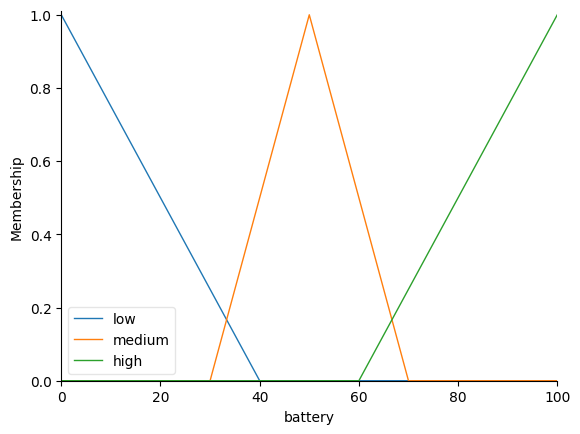

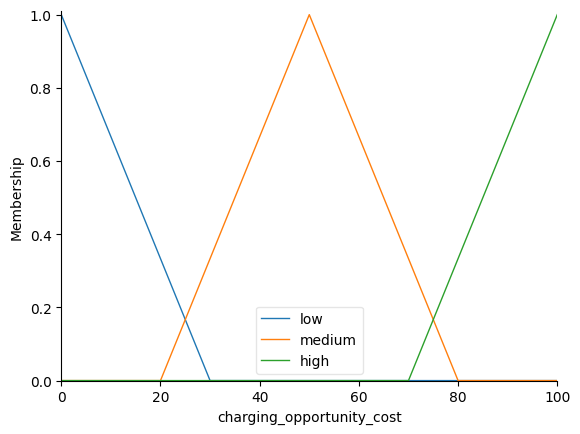

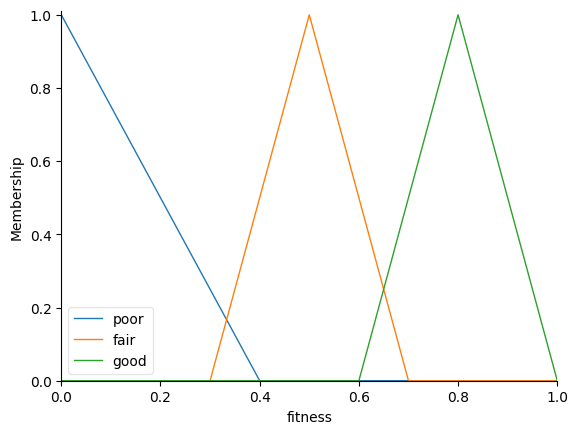

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Constants
CHARGING_RATE = 5.0  # % battery per second
OCCUPANCY_PENALTY = 30  # seconds penalty if charging station occupied
DRAIN_RATE = 0.1  # Battery drain in % per second
MIN_BATTERY = 10.0
MAX_TASK_AGE = 3600  # 1 hour
MAX_TRAVEL_TIME = 600
MAX_IDLE_TIME = 300
MAX_QUEUE_LENGTH = 20

# === Fuzzy System for Charging Decisions ===
class FuzzyChargingDecisionSystem:
    def __init__(self):
        self.battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
        self.charging_opportunity_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'charging_opportunity_cost')
        self.fitness = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'fitness')

        self._define_membership()
        self._define_rules()

    def _define_membership(self):
        self.battery['low'] = fuzz.trimf(self.battery.universe, [0, 0, 40])
        self.battery['medium'] = fuzz.trimf(self.battery.universe, [30, 50, 70])
        self.battery['high'] = fuzz.trimf(self.battery.universe, [60, 100, 100])

        self.charging_opportunity_cost['low'] = fuzz.trimf(self.charging_opportunity_cost.universe, [0, 0, 30])
        self.charging_opportunity_cost['medium'] = fuzz.trimf(self.charging_opportunity_cost.universe, [20, 50, 80])
        self.charging_opportunity_cost['high'] = fuzz.trimf(self.charging_opportunity_cost.universe, [70, 100, 100])

        self.fitness['poor'] = fuzz.trimf(self.fitness.universe, [0, 0, 0.4])
        self.fitness['fair'] = fuzz.trimf(self.fitness.universe, [0.3, 0.5, 0.7])
        self.fitness['good'] = fuzz.trimf(self.fitness.universe, [0.6, 0.8, 1.0])

    def _define_rules(self):
        rules = [
            ctrl.Rule(self.battery['low'] & self.charging_opportunity_cost['low'], self.fitness['good']),
            ctrl.Rule(self.battery['low'] & self.charging_opportunity_cost['medium'], self.fitness['fair']),
            ctrl.Rule(self.battery['low'] & self.charging_opportunity_cost['high'], self.fitness['poor']),

            ctrl.Rule(self.battery['medium'] & self.charging_opportunity_cost['low'], self.fitness['good']),
            ctrl.Rule(self.battery['medium'] & self.charging_opportunity_cost['medium'], self.fitness['fair']),
            ctrl.Rule(self.battery['medium'] & self.charging_opportunity_cost['high'], self.fitness['poor']),

            ctrl.Rule(self.battery['high'] & self.charging_opportunity_cost['low'], self.fitness['fair']),
            ctrl.Rule(self.battery['high'] & self.charging_opportunity_cost['medium'], self.fitness['fair']),
            ctrl.Rule(self.battery['high'] & self.charging_opportunity_cost['high'], self.fitness['poor']),
        ]
        self.system = ctrl.ControlSystem(rules)
        self.sim = ctrl.ControlSystemSimulation(self.system)


    def compute(self, battery, charging_opportunity_cost):
        try:
            self.sim.input['battery'] = min(battery, 100)
            self.sim.input['charging_opportunity_cost'] = min(charging_opportunity_cost, 100)
            self.sim.compute()
            return self.sim.output['fitness']
        except Exception as e:
            print("Fuzzy compute failed:", e)
            print("Inputs were:", battery, charging_opportunity_cost)
            return 0.0


# === Charging Opportunity Cost Function ===
def compute_charging_opportunity_cost(current_battery, task_queue_length, num_available_robots, charge_queue_length):
    """
    Estimate how costly it is to occupy the charging station.
    This includes how low the battery is, how long other robots must wait, and how many pending tasks exist.
    Scale is mapped to [0–100] for fuzzy compatibility.
    """
    # 1. Estimate required charge to full
    estimated_charge_needed = 100 - current_battery

    # 2. Task pressure (robots that might need charging soon)
    urgency_factor = (task_queue_length + 1)

    # 3. Scarcity of charging slots
    scarcity_penalty = (charge_queue_length + 1) / (num_available_robots + 1)

    # Opportunity cost: if high, others might be delayed if we stay charging
    opportunity_cost = estimated_charge_needed * urgency_factor * scarcity_penalty
    return min(opportunity_cost, 100)

# === Sample Test ===
if __name__ == '__main__':
    charge_fuzzy = FuzzyChargingDecisionSystem()

    robot_battery = 45
    task_queue_length = 6
    num_available_robots = 4
    charge_queue_length = 2

    opportunity_cost = compute_charging_opportunity_cost(
        current_battery=robot_battery,
        task_queue_length=task_queue_length,
        num_available_robots=num_available_robots,
        charge_queue_length=charge_queue_length
    )

    score = charge_fuzzy.compute(robot_battery, opportunity_cost)
    print(f"Charging Opportunity Cost: {opportunity_cost:.2f} → Charging Fitness: {score:.2f}")

    charge_fuzzy.battery.view()
    charge_fuzzy.charging_opportunity_cost.view()
    charge_fuzzy.fitness.view()


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import time

# Constants
CHARGING_RATE = 5.0  # % battery per second
OCCUPANCY_PENALTY = 30  # seconds penalty if charging station occupied
DRAIN_RATE = 0.1  # Battery drain in % per second
MIN_BATTERY = 10.0
MAX_TASK_AGE = 3600  # 1 hour
MAX_TRAVEL_TIME = 600
MAX_IDLE_TIME = 300
MAX_QUEUE_LENGTH = 20

class FuzzyDecisionSystem:
    def __init__(self):
        # Inputs
        self.idle_time = ctrl.Antecedent(np.arange(0, MAX_IDLE_TIME + 1, 5), 'idle_time')
        self.battery = ctrl.Antecedent(np.arange(0, 101, 1), 'battery')
        self.travel_time = ctrl.Antecedent(np.arange(0, MAX_TRAVEL_TIME + 1, 10), 'travel_time')
        self.task_age = ctrl.Antecedent(np.arange(0, MAX_TASK_AGE + 1, 60), 'task_age')
        self.future_burden = ctrl.Antecedent(np.arange(0, 10001, 100), 'future_burden')
        self.payload_efficiency = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'payload_efficiency')
        self.charging_opportunity_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'charging_opportunity_cost')
        self.task_type = ctrl.Antecedent(np.arange(0, 2, 1), 'task_type')

        # Output
        self.fitness = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'fitness')

        self._define_membership_functions()
        self._define_rules()

    def _define_membership_functions(self):
        self.idle_time['low'] = fuzz.trimf(self.idle_time.universe, [0, 0, 100])
        self.idle_time['high'] = fuzz.trimf(self.idle_time.universe, [100, MAX_IDLE_TIME, MAX_IDLE_TIME])

        self.battery['low'] = fuzz.trimf(self.battery.universe, [0, 0, 40])
        self.battery['medium'] = fuzz.trimf(self.battery.universe, [30, 50, 70])
        self.battery['high'] = fuzz.trimf(self.battery.universe, [60, 100, 100])

        self.travel_time['short'] = fuzz.trimf(self.travel_time.universe, [0, 0, 200])
        self.travel_time['medium'] = fuzz.trimf(self.travel_time.universe, [150, 300, 450])
        self.travel_time['long'] = fuzz.trimf(self.travel_time.universe, [400, MAX_TRAVEL_TIME, MAX_TRAVEL_TIME])

        self.task_age['low'] = fuzz.trimf(self.task_age.universe, [0, 0, 600])
        self.task_age['medium'] = fuzz.trimf(self.task_age.universe, [500, 1500, 2500])
        self.task_age['high'] = fuzz.trimf(self.task_age.universe, [2000, MAX_TASK_AGE, MAX_TASK_AGE])

        self.future_burden['low'] = fuzz.trimf(self.future_burden.universe, [0, 0, 3000])
        self.future_burden['medium'] = fuzz.trimf(self.future_burden.universe, [2000, 5000, 8000])
        self.future_burden['high'] = fuzz.trimf(self.future_burden.universe, [7000, 10000, 10000])

        self.payload_efficiency['underutilized'] = fuzz.trimf(self.payload_efficiency.universe, [0, 0, 0.4])
        self.payload_efficiency['balanced'] = fuzz.trimf(self.payload_efficiency.universe, [0.3, 0.6, 0.9])
        self.payload_efficiency['overloaded'] = fuzz.trimf(self.payload_efficiency.universe, [0.8, 1, 1])

        self.charging_opportunity_cost['low'] = fuzz.trimf(self.charging_opportunity_cost.universe, [0, 0, 30])
        self.charging_opportunity_cost['medium'] = fuzz.trimf(self.charging_opportunity_cost.universe, [20, 50, 80])
        self.charging_opportunity_cost['high'] = fuzz.trimf(self.charging_opportunity_cost.universe, [70, 100, 100])

        self.task_type['delivery'] = fuzz.trimf(self.task_type.universe, [0, 0, 1])
        self.task_type['charge'] = fuzz.trimf(self.task_type.universe, [0, 1, 1])

        self.fitness['poor'] = fuzz.trimf(self.fitness.universe, [0, 0, 0.4])
        self.fitness['fair'] = fuzz.trimf(self.fitness.universe, [0.3, 0.5, 0.7])
        self.fitness['good'] = fuzz.trimf(self.fitness.universe, [0.6, 0.8, 1.0])

    def _define_rules(self):
        rules = [
            # Delivery task logic
            ctrl.Rule(self.task_type['delivery'] & self.idle_time['high'] & self.battery['medium'], self.fitness['good']),
            ctrl.Rule(self.task_type['delivery'] & (self.battery['low'] | self.future_burden['high']), self.fitness['poor']),
            ctrl.Rule(self.task_type['delivery'] & self.task_age['high'] & self.travel_time['short'], self.fitness['good']),
            ctrl.Rule(self.task_type['delivery'] & self.task_age['medium'] & self.travel_time['medium'], self.fitness['fair']),
            ctrl.Rule(self.task_type['delivery'] & self.battery['high'] & self.future_burden['low'], self.fitness['good']),
            ctrl.Rule(self.task_type['delivery'] & self.idle_time['low'] & self.battery['low'], self.fitness['poor']),
            ctrl.Rule(self.task_type['delivery'] & self.travel_time['long'], self.fitness['fair']),
            ctrl.Rule(self.task_type['delivery'] & self.payload_efficiency['overloaded'], self.fitness['poor']),
            ctrl.Rule(self.task_type['delivery'] & self.payload_efficiency['balanced'], self.fitness['good']),

            # Charge task logic
            ctrl.Rule(self.task_type['charge'] & self.charging_opportunity_cost['high'], self.fitness['poor']),
            ctrl.Rule(self.task_type['charge'] & self.charging_opportunity_cost['low'], self.fitness['good']),
            ctrl.Rule(self.task_type['charge'] & self.battery['low'], self.fitness['good']),
            ctrl.Rule(self.task_type['charge'] & self.battery['high'], self.fitness['poor'])
        ]

        self.system = ctrl.ControlSystem(rules)
        self.sim = ctrl.ControlSystemSimulation(self.system)

    def compute_fitness(self, idle_time, battery, travel_time, task_age, future_burden, payload_efficiency, charging_opportunity_cost, task_type):
        self.sim.input['idle_time'] = min(idle_time, MAX_IDLE_TIME)
        self.sim.input['battery'] = min(battery, 100)
        self.sim.input['travel_time'] = min(travel_time, MAX_TRAVEL_TIME)
        self.sim.input['task_age'] = min(task_age, MAX_TASK_AGE)
        self.sim.input['future_burden'] = min(future_burden, 10000)
        self.sim.input['payload_efficiency'] = min(max(payload_efficiency, 0), 1.0)
        self.sim.input['charging_opportunity_cost'] = min(charging_opportunity_cost, 100)
        self.sim.input['task_type'] = task_type  # 0: delivery, 1: charge

        try:
            self.sim.compute()
            return self.sim.output['fitness']
        except Exception as e:
            print("Fuzzy system error:", e)
            return 0.0

def compute_charging_opportunity_cost(cost_of_traversal, num_available_robots, charge_queue_length):
    effective_charge_time = max(0, cost_of_traversal - OCCUPANCY_PENALTY)
    estimated_charge_needed = effective_charge_time * CHARGING_RATE
    base_cost = estimated_charge_needed / 100
    scarcity_factor = (charge_queue_length + 1) / (num_available_robots + 1)
    opportunity_cost = base_cost * scarcity_factor * 100
    return min(opportunity_cost, 100)

# === Charging Opportunity Cost Function ===
def compute_charging_opportunity_cost(current_battery, task_queue_length, num_available_robots, charge_queue_length):
    """
    Estimate how costly it is to occupy the charging station.
    This includes how low the battery is, how long other robots must wait, and how many pending tasks exist.
    Scale is mapped to [0–100] for fuzzy compatibility.
    """
    # 1. Estimate required charge to full
    estimated_charge_needed = 100 - current_battery

    # 2. Task pressure (robots that might need charging soon)
    urgency_factor = (task_queue_length + 1)

    # 3. Scarcity of charging slots
    scarcity_penalty = (charge_queue_length + 1) / (num_available_robots + 1)

    # Opportunity cost: if high, others might be delayed if we stay charging
    opportunity_cost = estimated_charge_needed * urgency_factor * scarcity_penalty
    return min(opportunity_cost, 100)

def calculate_charge_duration(current_battery, queue_length, station_occupied):
    buffer = 70 if queue_length > 5 else 30
    target_battery = min(100, current_battery + buffer)
    charge_time = (target_battery - current_battery) / CHARGING_RATE
    return charge_time + (OCCUPANCY_PENALTY if station_occupied else 0)


# === Sample Test ===
if __name__ == "__main__":
    fuzzy_system = FuzzyDecisionSystem()

    # Example 1: Delivery Task
    robot = {
        "id": "robot_001",
        "position": {"x": 10, "y": 5},
        "battery": 60,
        "velocity": 1.0,
        "idle_time": 180
    }

    task = {
        "type": 0,  # Delivery
        "pickup": {"x": 15, "y": 10},
        "dropoff": {"x": 25, "y": 15},
        "priority": 3,
        "timestamp": time.time() - 1200,  # 20 min ago
    }

    task_queue_length = 6
    payload_efficiency = 0.6

    travel_time, battery_after = compute_completion_time(
        task_type=task["type"],
        rbt_curr_pos=robot["position"],
        pickup_pos=task["pickup"],
        dropoff_pos=task["dropoff"],
        rbt_velocity=robot["velocity"],
        current_battery=robot["battery"]
    )

    if travel_time is None:
        print("Robot cannot take task.")
    else:
        task_age = time.time() - task["timestamp"]
        future_burden = estimate_future_burden(battery_after, task_queue_length)

        score = fuzzy_system.compute_fitness(
            idle_time=robot["idle_time"],
            battery=robot["battery"],
            travel_time=travel_time,
            task_age=task_age,
            future_burden=future_burden,
            payload_efficiency=payload_efficiency,
            charging_opportunity_cost=0.0,  # Ignored for delivery
            task_type=0 # pickup and delivery
        )

        print(f"[Delivery] Robot {robot['id']} → Fitness Score: {score:.2f}")

    num_available_robots = 5
    charge_queue_length = 3

    cost_of_traversal = calculate_charge_duration(
        current_battery=robot["battery"],
        queue_length=charge_queue_length,
        station_occupied=True
    )

    charging_op_cost = compute_charging_opportunity_cost(
        cost_of_traversal=cost_of_traversal,
        num_available_robots=num_available_robots,
        charge_queue_length=charge_queue_length
    )

    charge_score = fuzzy_system.compute_fitness(
        idle_time=robot["idle_time"],
        battery=robot["battery"],
        travel_time=0,  # Not relevant
        task_age=0,  # Not relevant
        future_burden=0,  # Not relevant
        payload_efficiency=0.0,  # Not relevant
        charging_opportunity_cost=charging_op_cost,
        task_type=1  # Charge
    )

    print(f"[Charging] Opportunity Cost: {charging_op_cost:.2f} → Fitness Score: {charge_score:.2f}")


[Delivery] Robot robot_001 → Fitness Score: 0.80
[Charging] Opportunity Cost: 20.00 → Fitness Score: 0.80


In [ ]:
1. **Each robot runs this engine locally**
2. When heartbeat from central fails, robots broadcast their suitability score
3. A timed protocol (e.g., backoff + confirmation) selects the robot with highest score
4. The new leader publishes node reservations and reroute instructions to complete ongoing tasks


In [ ]:
!pip install psycopg2-binary

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.7 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 6.3 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ---------------------------------------- 920.8/920.8 kB 6.0 MB/s  0:00:00


In [ ]:
# Below is a complete FuzzyDecisionSystem class that integrates the provided fuzzy logic rules
# and supporting functions (compute_completion_time, compute_charging_opportunity_cost, calculate_charge_duration)
# to create a cohesive system for task dispatching in an AGV/AMR fleet.

In [ ]:
# [FuzzyDecisionSystem]

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

class FuzzyDecisionSystem:
    """
    A fuzzy logic system for task dispatching in an AGV/AMR fleet.
    Evaluates robot suitability for tasks (pickup/delivery, charging, move) based on
    idle time, battery level, travel time, task age, payload efficiency, and charging opportunity cost.
    Outputs a fitness score [0, 1] for robot-task assignment, where higher is better.
    """

    def __init__(self, max_idle_time=300, max_travel_time=600, max_task_age=3600):
        """
        Initialize the fuzzy decision system with membership functions and rules.

        Parameters:
        - max_idle_time: Maximum idle time (seconds) for membership functions
        - max_travel_time: Maximum travel time (seconds) for membership functions
        - max_task_age: Maximum task age (seconds) for membership functions
        """
        # Define universes for inputs and output
        self.idle_time = ctrl.Antecedent(np.arange(0, max_idle_time + 0.1, 0.1), 'idle_time')
        self.battery = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'battery')
        self.travel_time = ctrl.Antecedent(np.arange(0, max_travel_time + 0.1, 0.1), 'travel_time')
        self.task_age = ctrl.Antecedent(np.arange(0, max_task_age + 0.1, 0.1), 'task_age')
        self.payload_efficiency = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'payload_efficiency')
        self.charging_opportunity_cost = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'charging_opportunity_cost')
        self.task_type = ctrl.Antecedent(np.arange(0, 2.1, 0.1), 'task_type')
        self.fitness = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'fitness')

        # Define membership functions
        self._define_membership_functions(max_idle_time, max_travel_time, max_task_age)

        # Define fuzzy rules
        self._define_rules()

    def _define_membership_functions(self, max_idle_time, max_travel_time, max_task_age):
        """
        Define membership functions for all inputs and output.

        Parameters:
        - max_idle_time: Maximum idle time (seconds)
        - max_travel_time: Maximum travel time (seconds)
        - max_task_age: Maximum task age (seconds)
        """
        # Idle time: Short (recently active), Long (underutilized)
        self.idle_time['short'] = fuzz.trimf(self.idle_time.universe, [0, 0, 100])
        self.idle_time['long'] = fuzz.trimf(self.idle_time.universe, [50, max_idle_time, max_idle_time])

        # Battery: Low (critical), Medium (adequate), High (plenty)
        self.battery['low'] = fuzz.trimf(self.battery.universe, [0, 0, 40])
        self.battery['medium'] = fuzz.trimf(self.battery.universe, [30, 50, 70])
        self.battery['high'] = fuzz.trimf(self.battery.universe, [60, 100, 100])

        # Travel time: Short (fast), Long (slow)
        self.travel_time['short'] = fuzz.trimf(self.travel_time.universe, [0, 0, 200])
        self.travel_time['long'] = fuzz.trimf(self.travel_time.universe, [150, max_travel_time, max_travel_time])

        # Task age: Low (recent), High (urgent)
        self.task_age['low'] = fuzz.trimf(self.task_age.universe, [0, 0, 600])
        self.task_age['high'] = fuzz.trimf(self.task_age.universe, [500, max_task_age, max_task_age])

        # Payload efficiency: Underutilized (overcapacity), Balanced (optimal), Overloaded (infeasible)
        self.payload_efficiency['underutilized'] = fuzz.trimf(self.payload_efficiency.universe, [0, 0, 0.4])
        self.payload_efficiency['balanced'] = fuzz.trimf(self.payload_efficiency.universe, [0.3, 0.6, 0.9])
        self.payload_efficiency['overloaded'] = fuzz.trimf(self.payload_efficiency.universe, [0.8, 1, 1])

        # Charging opportunity cost: Low (charge favorable), High (charge costly)
        self.charging_opportunity_cost['low'] = fuzz.trimf(self.charging_opportunity_cost.universe, [0, 0, 0.3])
        self.charging_opportunity_cost['high'] = fuzz.trimf(self.charging_opportunity_cost.universe, [0.2, 1, 1])

        # Task type: Delivery (0), Charge (1), Move (2)
        self.task_type['delivery'] = fuzz.trimf(self.task_type.universe, [0, 0, 1])
        self.task_type['charge'] = fuzz.trimf(self.task_type.universe, [1, 1, 2])
        self.task_type['move'] = fuzz.trimf(self.task_type.universe, [2, 2, 2])

        # Fitness: Poor (unsuitable), Good (suitable)
        self.fitness['poor'] = fuzz.trimf(self.fitness.universe, [0, 0, 0.4])
        self.fitness['good'] = fuzz.trimf(self.fitness.universe, [0.3, 1, 1])

    def _define_rules(self):
        """
        Define fuzzy logic rules for task assignment based on robot suitability.
        """
        rules = [
            # Pickup and Delivery (Task Type 0)
            # Rule 1: High fitness for high idle time, medium/high battery, short travel time, balanced payload
            ctrl.Rule(
                self.task_type['delivery'] & self.idle_time['long'] &
                (self.battery['medium'] | self.battery['high']) &
                self.travel_time['short'] & self.payload_efficiency['balanced'],
                self.fitness['good']
            ),
            # Rule 2: Poor fitness for low battery or overloaded payload
            ctrl.Rule(
                self.task_type['delivery'] &
                (self.battery['low'] | self.payload_efficiency['overloaded']),
                self.fitness['poor']
            ),
            # Rule 3: Poor fitness for underutilized payload with high task age
            ctrl.Rule(
                self.task_type['delivery'] & self.payload_efficiency['underutilized'] &
                self.task_age['high'],
                self.fitness['poor']
            ),
            # Rule 4: Good fitness for high task age with short travel time
            ctrl.Rule(
                self.task_type['delivery'] & self.task_age['high'] & self.travel_time['short'],
                self.fitness['good']
            ),
            # Charging (Task Type 1)
            # Rule 5: High fitness for low battery and low opportunity cost
            ctrl.Rule(
                self.task_type['charge'] & self.battery['low'] &
                self.charging_opportunity_cost['low'],
                self.fitness['good']
            ),
            # Rule 6: Poor fitness for high opportunity cost or high battery
            ctrl.Rule(
                self.task_type['charge'] &
                (self.charging_opportunity_cost['high'] | self.battery['high']),
                self.fitness['poor']
            ),
            # Move (Task Type 2)
            # Rule 7: High fitness for low battery and long idle time
            ctrl.Rule(
                self.task_type['move'] & self.battery['low'] & self.idle_time['long'],
                self.fitness['good']
            ),
            # Rule 8: Poor fitness for high battery or short travel time
            ctrl.Rule(
                self.task_type['move'] &
                (self.battery['high'] | self.travel_time['short']),
                self.fitness['poor']
            ),
        ]
        self.system = ctrl.ControlSystem(rules)
        self.sim = ctrl.ControlSystemSimulation(self.system)

    def compute_completion_time(self, task_type, rbt_curr_pos, pickup_pos, dropoff_pos=None,
                               rbt_velocity=1.0, current_battery=50.0, payload=0.0,
                               max_payload=100.0, drain_rate=0.1, min_battery=10.0,
                               task_energy_cost=2.0):
        """
        Estimate the time to complete a task and the remaining battery level for an AGV/AMR.

        Parameters:
        - task_type: 0 (pickup and delivery), 1 (charging), 2 (move)
        - rbt_curr_pos: Robot's current position {'x': float, 'y': float, 'z': float}
        - pickup_pos: Pickup/destination position {'x': float, 'y': float, 'z': float}
        - dropoff_pos: Dropoff position for delivery tasks {'x': float, 'y': float, 'z': float}
        - rbt_velocity: Robot's average velocity (m/s), adjusted for payload
        - current_battery: Current battery level (%)
        - payload: Task payload weight (kg)
        - max_payload: Robot's maximum payload capacity (kg)
        - drain_rate: Battery drain rate (%/s) for movement
        - min_battery: Minimum safe battery level (%)
        - task_energy_cost: Additional energy cost for task-specific actions (e.g., pickup, dropoff) (%)

        Returns:
        - (total_time, remaining_battery): Time (seconds) and battery (%) after task, or (None, None) if infeasible
        """
        def manhattan_distance(pos1, pos2):
            return abs(pos2['x'] - pos1['x']) + abs(pos2['y'] - pos1['y']) + abs(pos2['z'] - pos1['z'])

        if pickup_pos is None:
            raise ValueError("Destination position is required.")

        # Adjust velocity based on payload (linear reduction, max 20% slowdown)
        payload_factor = min(payload / max_payload, 1.0)
        adjusted_velocity = rbt_velocity * (1.0 - 0.2 * payload_factor)

        # Time to destination (pickup for type 0, destination for types 1/2)
        dist_to_pickup = manhattan_distance(rbt_curr_pos, pickup_pos)
        time_to_pickup = dist_to_pickup / adjusted_velocity
        battery_depletion = drain_rate * time_to_pickup
        remaining_battery = current_battery - battery_depletion

        total_time = time_to_pickup

        if task_type == 0:  # Pickup and delivery
            if dropoff_pos is None:
                raise ValueError("Dropoff position is required for delivery tasks.")
            dist_to_dropoff = manhattan_distance(pickup_pos, dropoff_pos)
            time_to_dropoff = dist_to_dropoff / adjusted_velocity
            battery_depletion += drain_rate * time_to_dropoff
            total_time += time_to_dropoff
            remaining_battery -= drain_rate * time_to_dropoff

        # Add task-specific energy cost (e.g., pickup/dropoff actions)
        remaining_battery -= task_energy_cost

        # Check battery feasibility
        if remaining_battery < min_battery:
            return None, None

        return total_time, remaining_battery

    def compute_charging_opportunity_cost(self, current_battery, task_queue_length,
                                         num_available_robots, charge_queue_length,
                                         avg_task_priority, avg_task_energy=10.0):
        """
        Compute the opportunity cost of a robot continuing to charge, normalized to [0, 1].

        Parameters:
        - current_battery: Robot's current battery level (%)
        - task_queue_length: Number of tasks in the queue
        - num_available_robots: Number of robots not currently tasked or charging
        - charge_queue_length: Number of robots waiting to charge
        - avg_task_priority: Average priority of tasks in queue (1=low, 2=medium, 3=high)
        - avg_task_energy: Average battery consumption per task (%)

        Returns:
        - opportunity_cost: Normalized cost [0, 1]
        """
        MAX_BATTERY = 100.0
        MAX_QUEUE_LENGTH = 20.0
        MAX_PRIORITY = 3.0

        battery_readiness = current_battery / MAX_BATTERY
        normalized_queue_length = min(task_queue_length / MAX_QUEUE_LENGTH, 1.0)
        normalized_priority = avg_task_priority / MAX_PRIORITY
        task_pressure = normalized_queue_length * normalized_priority
        scarcity = (charge_queue_length + 1) / (num_available_robots + 1)
        normalized_scarcity = min(scarcity / 5.0, 1.0)
        sufficiency = max(0, current_battery - avg_task_energy) / MAX_BATTERY

        weights = {'battery': 0.4, 'task_pressure': 0.4, 'scarcity': 0.2}
        opportunity_cost = (
            weights['battery'] * battery_readiness +
            weights['task_pressure'] * task_pressure +
            weights['scarcity'] * normalized_scarcity
        ) * sufficiency

        return min(max(opportunity_cost, 0.0), 1.0)

    def calculate_charge_duration(self, current_battery, charge_task_queue_length,
                                 charger_occupancy_ratio, avg_task_energy=10.0,
                                 avg_task_priority=2.0, num_chargers=1):
        """
        Calculate the time (in seconds) a robot should charge to balance task needs and charger availability.

        Parameters:
        - current_battery: Robot's current battery level (%)
        - charge_task_queue_length: Number of robots waiting to charge
        - charger_occupancy_ratio: Proportion of occupied chargers [0, 1]
        - avg_task_energy: Average battery consumption per task (%)
        - avg_task_priority: Average priority of tasks (1=low, 2=medium, 3=high)
        - num_chargers: Total number of charging stations

        Returns:
        - charge_time: Duration in seconds
        """
        CHARGING_RATE = 5.0
        MIN_BATTERY = 10.0
        MAX_QUEUE_LENGTH = 20.0
        MAX_PRIORITY = 3.0

        base_target = min(100, current_battery + 2 * avg_task_energy + MIN_BATTERY)
        priority_factor = avg_task_priority / MAX_PRIORITY
        queue_factor = min(charge_task_queue_length / MAX_QUEUE_LENGTH, 1.0)
        urgency_adjustment = 1.0 - 0.5 * priority_factor * queue_factor
        target_battery = max(MIN_BATTERY, base_target * urgency_adjustment)
        charge_time = (target_battery - current_battery) / CHARGING_RATE
        wait_time = (charge_task_queue_length / num_chargers) * charger_occupancy_ratio * 30.0

        return max(0, charge_time + wait_time)

    def evaluate_task_fitness(self, task, robot_state):
        """
        Evaluate a robot's fitness for a given task.

        Parameters:
        - task: Dictionary with task details:
            - type: 0 (pickup/delivery), 1 (charging), 2 (move)
            - pickup_pos: {'x': float, 'y': float, 'z': float} (destination for charging/move)
            - dropoff_pos: {'x': float, 'y': float, 'z': float} (for delivery tasks)
            - payload: Task payload weight (kg)
            - task_age: Time since task issuance (seconds)
            - task_priority: Priority of task (1=low, 2=medium, 3=high)
        - robot_state: Dictionary with robot details:
            - current_pos: {'x': float, 'y': float, 'z': float}
            - current_battery: Battery level (%)
            - idle_time: Time since last task (seconds)
            - max_payload: Maximum payload capacity (kg)
            - velocity: Average velocity (m/s)
            - drain_rate: Battery drain rate (%/s)

        Returns:
        - dict: {'fitness': float [0, 1], 'travel_time': float or None, 'charge_duration': float or None}
        """
        # Extract task and robot details
        task_type = task['type']
        pickup_pos = task.get('pickup_pos')
        dropoff_pos = task.get('dropoff_pos')
        payload = task.get('payload', 0.0)
        task_age = task.get('task_age', 0.0)
        task_priority = task.get('task_priority', 2.0)

        current_pos = robot_state['current_pos']
        current_battery = robot_state['current_battery']
        idle_time = robot_state['idle_time']
        max_payload = robot_state['max_payload']
        velocity = robot_state['velocity']
        drain_rate = robot_state.get('drain_rate', 0.1)

        # Initialize outputs
        result = {'fitness': 0.0, 'travel_time': None, 'charge_duration': None}

        # Compute travel time and remaining battery for delivery/move tasks
        if task_type in [0, 2]:
            travel_time, remaining_battery = self.compute_completion_time(
                task_type=task_type,
                rbt_curr_pos=current_pos,
                pickup_pos=pickup_pos,
                dropoff_pos=dropoff_pos,
                rbt_velocity=velocity,
                current_battery=current_battery,
                payload=payload,
                max_payload=max_payload,
                drain_rate=drain_rate,
                min_battery=10.0,
                task_energy_cost=2.0
            )
            if travel_time is None:  # Infeasible task
                return result
            result['travel_time'] = travel_time
            effective_battery = remaining_battery
        else:  # Charging task
            effective_battery = current_battery

        # Compute payload efficiency
        payload_efficiency = min(payload / max_payload, 1.0) if max_payload > 0 else 1.0

        # Compute charging opportunity cost for charging tasks
        charging_opportunity_cost = 0.0
        if task_type == 1:
            charging_opportunity_cost = self.compute_charging_opportunity_cost(
                current_battery=current_battery,
                task_queue_length=10,  # Placeholder; replace with actual queue length
                num_available_robots=5,  # Placeholder; replace with actual count
                charge_queue_length=3,  # Placeholder; replace with actual queue length
                avg_task_priority=task_priority,
                avg_task_energy=10.0
            )
            result['charge_duration'] = self.calculate_charge_duration(
                current_battery=current_battery,
                charge_task_queue_length=3,  # Placeholder
                charger_occupancy_ratio=0.8,  # Placeholder
                avg_task_energy=10.0,
                avg_task_priority=task_priority,
                num_chargers=1
            )

        # Set fuzzy inputs
        self.sim.input['task_type'] = task_type
        self.sim.input['idle_time'] = idle_time
        self.sim.input['battery'] = effective_battery
        self.sim.input['task_age'] = task_age
        self.sim.input['payload_efficiency'] = payload_efficiency
        self.sim.input['charging_opportunity_cost'] = charging_opportunity_cost
        if task_type in [0, 2]:
            self.sim.input['travel_time'] = travel_time
        else:
            self.sim.input['travel_time'] = 0  # Not used for charging tasks

        # Compute fitness
        try:
            self.sim.compute()
            result['fitness'] = self.sim.output['fitness']
        except:
            result['fitness'] = 0.0  # Default to poor fitness if computation fails

        return result

In [7]:
# Initialize the system
fuzzy_system = FuzzyDecisionSystem(max_idle_time=300, max_travel_time=600, max_task_age=3600)

# Define a task and robot state
task = {
    'type': 0,  # Pickup and delivery
    'pickup_pos': {'x': 15, 'y': 10, 'z': 0},
    'dropoff_pos': {'x': 25, 'y': 15, 'z': 0},
    'payload': 20.0,
    'task_age': 1200.0,
    'task_priority': 2.5
}
robot_state = {
    'current_pos': {'x': 10, 'y': 5, 'z': 0},
    'current_battery': 45.0,
    'idle_time': 200.0,
    'max_payload': 50.0,
    'velocity': 1.0,
    'drain_rate': 0.1
}

# Evaluate fitness
result = fuzzy_system.evaluate_task_fitness(task, robot_state)
print(result)
# Example output: {'fitness': 0.8, 'travel_time': 27.17, 'charge_duration': None}

# Charging task example
task_charge = {
    'type': 1,  # Charging
    'pickup_pos': {'x': 5, 'y': 5, 'z': 0},  # Charger location
    'task_age': 100.0,
    'task_priority': 2.0
}
result_charge = fuzzy_system.evaluate_task_fitness(task_charge, robot_state)
print(result_charge)
# Example output: {'fitness': 0.6, 'travel_time': None, 'charge_duration': 41.08}

{'fitness': np.float64(0.704444444444445), 'travel_time': 27.17391304347826, 'charge_duration': None}
{'fitness': 0.0, 'travel_time': None, 'charge_duration': 77.25000000000001}


In [ ]:
# To address your request, we need to design a MasterSuitabilityFuzzyEngine class that evaluates the suitability of robots in an AGV/AMR fleet to act as master nodes in a partially decentralized task dispatching system. The system transitions from a purely centralized setup (with one master, num_master_workers=1) to a partially decentralized one (e.g., num_master_workers=3), where additional robots are selected as masters to share coordination responsibilities. The selection of master robots is based on their suitability, computed using fuzzy logic, considering factors like Local Agent Density, Idle Ratio, Proximity Centrality, System Health (Battery Level), Connectivity, and optionally CPU Usage. The goal is to enable the central controller to delegate tasks to these masters, reducing latency, avoiding single-point failures, and handling overload in large fleets.The masters will manage regions of robots, determined by a clustering approach (e.g., k-means or Voronoi partitioning), with each master responsible for a subset of robots in its region. The fuzzy engine will assign a suitability score ([0, 1], higher = better) to each robot, allowing the central controller to select the most suitable robots as masters.

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import psutil
import time

class MasterSuitabilityFuzzyEngine:
    """
    A fuzzy logic system to evaluate the suitability of robots to act as master nodes
    in a partially decentralized AGV/AMR fleet management system.
    Outputs a suitability score [0, 1], where higher is better.
    """

    def __init__(self, max_density=20, max_distance=50, include_cpu_usage=False):
        """
        Initialize the fuzzy engine with membership functions and rules.

        Parameters:
        - max_density: Maximum number of robots in a region (for local_density)
        - max_distance: Maximum distance to cluster centroid (meters, for proximity_centrality)
        - include_cpu_usage: Whether to include CPU usage in suitability evaluation
        """
        # Define universes for inputs and output
        self.local_density = ctrl.Antecedent(np.arange(0, max_density + 0.1, 0.1), 'local_density')
        self.idle_ratio = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'idle_ratio')
        self.proximity_centrality = ctrl.Antecedent(np.arange(0, max_distance + 0.1, 0.1), 'proximity_centrality')
        self.battery = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'battery')
        self.connectivity = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'connectivity')
        self.cpu_usage = None if not include_cpu_usage else ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'cpu_usage')
        self.suitability = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'suitability')

        # Store configuration
        self.include_cpu_usage = include_cpu_usage
        self.max_density = max_density
        self.max_distance = max_distance

        # Define membership functions
        self._define_membership_functions()

        # Define fuzzy rules
        self._define_rules()

    def _define_membership_functions(self):
        """
        Define membership functions for all inputs and output.
        """
        # Local Density: Low (sparse region), High (dense region)
        self.local_density['low'] = fuzz.trimf(self.local_density.universe, [0, 0, self.max_density / 2])
        self.local_density['high'] = fuzz.trimf(self.local_density.universe, [self.max_density / 4, self.max_density, self.max_density])

        # Idle Ratio: Low (busy), High (idle)
        self.idle_ratio['low'] = fuzz.trimf(self.idle_ratio.universe, [0, 0, 0.5])
        self.idle_ratio['high'] = fuzz.trimf(self.idle_ratio.universe, [0.3, 1, 1])

        # Proximity Centrality: Low (central), High (peripheral)
        self.proximity_centrality['low'] = fuzz.trimf(self.proximity_centrality.universe, [0, 0, self.max_distance / 2])
        self.proximity_centrality['high'] = fuzz.trimf(self.proximity_centrality.universe, [self.max_distance / 4, self.max_distance, self.max_distance])

        # Battery: Low (critical), High (sufficient)
        self.battery['low'] = fuzz.trimf(self.battery.universe, [0, 0, 40])
        self.battery['high'] = fuzz.trimf(self.battery.universe, [30, 100, 100])

        # Connectivity: Low (poor), High (strong)
        self.connectivity['low'] = fuzz.trimf(self.connectivity.universe, [0, 0, 0.5])
        self.connectivity['high'] = fuzz.trimf(self.connectivity.universe, [0.3, 1, 1])

        # CPU Usage (if included): Low (available), High (busy)
        if self.include_cpu_usage:
            self.cpu_usage['low'] = fuzz.trimf(self.cpu_usage.universe, [0, 0, 50])
            self.cpu_usage['high'] = fuzz.trimf(self.cpu_usage.universe, [30, 100, 100])

        # Suitability: Poor (unsuitable), Good (suitable)
        self.suitability['poor'] = fuzz.trimf(self.suitability.universe, [0, 0, 0.4])
        self.suitability['good'] = fuzz.trimf(self.suitability.universe, [0.3, 1, 1])

    def _define_rules(self):
        """
        Define fuzzy logic rules for master suitability.
        """
        rules = [
            # Rule 1: High suitability for high density, high idle ratio, low proximity centrality, high battery, high connectivity
            ctrl.Rule(
                self.local_density['high'] & self.idle_ratio['high'] &
                self.proximity_centrality['low'] & self.battery['high'] &
                self.connectivity['high'],
                self.suitability['good']
            ),
            # Rule 2: Poor suitability for low battery or low connectivity
            ctrl.Rule(
                self.battery['low'] | self.connectivity['low'],
                self.suitability['poor']
            ),
            # Rule 3: Poor suitability for low density or high proximity centrality
            ctrl.Rule(
                self.local_density['low'] | self.proximity_centrality['high'],
                self.suitability['poor']
            ),
            # Rule 4: Poor suitability for low idle ratio
            ctrl.Rule(
                self.idle_ratio['low'],
                self.suitability['poor']
            ),
        ]
        if self.include_cpu_usage:
            # Rule 5: Poor suitability for high CPU usage
            rules.append(
                ctrl.Rule(self.cpu_usage['high'], self.suitability['poor'])
            )
            # Update Rule 1 to include low CPU usage
            rules[0] = ctrl.Rule(
                self.local_density['high'] & self.idle_ratio['high'] &
                self.proximity_centrality['low'] & self.battery['high'] &
                self.connectivity['high'] & self.cpu_usage['low'],
                self.suitability['good']
            )

        self.system = ctrl.ControlSystem(rules)
        self.sim = ctrl.ControlSystemSimulation(self.system)

    def system_monitor(self, interval=1.0):
        """
        Collect CPU and RAM usage for the robot.
        Returns current CPU usage if include_cpu_usage is True.

        Parameters:
        - interval: Time interval for monitoring (seconds)

        Returns:
        - float: CPU usage percentage, or None if not included
        """
        if not self.include_cpu_usage:
            return None
        cpu = psutil.cpu_percent(interval=None)
        ram = psutil.virtual_memory().percent
        # data = {"cpu": cpu, "ram": ram}
        print(f"[System Status] CPU: {cpu:.2f}%, RAM: {ram:.2f}%")
        return cpu

    def evaluate_suitability(self, robot_state, local_density, cluster_centroid):
        """
        Evaluate a robot's suitability to act as a master node.

        Parameters:
        - robot_state: Dictionary with robot details:
            - current_pos: {'x': float, 'y': float, 'z': float}
            - battery: Battery level (%)
            - idle_time: Time since last task (seconds)
            - task_time: Total time spent on tasks (seconds)
            - connectivity: Signal strength or inverse latency [0, 1]
        - local_density: Number of robots in the robot's region
        - cluster_centroid: {'x': float, 'y': float, 'z': float}, centroid of the robot's cluster

        Returns:
        - float: Suitability score [0, 1]
        """
        # Extract robot details
        current_pos = robot_state['current_pos']
        battery = robot_state['battery']
        idle_time = robot_state['idle_time']
        task_time = robot_state.get('task_time', 0.0)
        connectivity = robot_state['connectivity']

        # Compute idle ratio
        total_time = idle_time + task_time
        idle_ratio = idle_time / total_time if total_time > 0 else 1.0

        # Compute proximity centrality (Manhattan distance to centroid)
        def manhattan_distance(pos1, pos2):
            return abs(pos2['x'] - pos1['x']) + abs(pos2['y'] - pos1['y']) + abs(pos2['z'] - pos1['z'])
        proximity_centrality = manhattan_distance(current_pos, cluster_centroid)

        # Get CPU usage if included
        cpu_usage = self.system_monitor() if self.include_cpu_usage else None

        # Set fuzzy inputs
        self.sim.input['local_density'] = local_density
        self.sim.input['idle_ratio'] = idle_ratio
        self.sim.input['proximity_centrality'] = proximity_centrality
        self.sim.input['battery'] = battery
        self.sim.input['connectivity'] = connectivity
        if self.include_cpu_usage:
            self.sim.input['cpu_usage'] = cpu_usage if cpu_usage is not None else 0.0

        # Compute suitability
        try:
            self.sim.compute()
            return self.sim.output['suitability']
        except:
            return 0.0  # Default to poor suitability if computation fails

In [ ]:
# Initialize the fuzzy engine (with CPU usage)
fuzzy_engine = MasterSuitabilityFuzzyEngine(max_density=20, max_distance=50, include_cpu_usage=True)

# Define robot state and context
robot_state = {
    'current_pos': {'x': 10, 'y': 5, 'z': 0},
    'battery': 80.0,
    'idle_time': 200.0,
    'task_time': 100.0,
    'connectivity': 0.9
}
local_density = 15  # 15 robots in the region
cluster_centroid = {'x': 12, 'y': 6, 'z': 0}  # From k-means

# Evaluate suitability
suitability = fuzzy_engine.evaluate_suitability(robot_state, local_density, cluster_centroid)
print(f"Suitability Score: {suitability:.2f}")
# Example output: Suitability Score: 0.85


[System Status] CPU: 52.20%, RAM: 45.70%


In [ ]:
prompt:

/////////////////////////////////////
[first declaration]
1. a new message type in addition to the vda5050 messages (connection, instantActions, order, state, visualization, factsheet) we already have: this message type would be zones essentially defining the polygons and who controls them and perhaps their ips. that way every robot knows to by itself calculate when its in a polygon and choose the appropriate master:

--- ZoneSet Details ---
ZoneSet ID   : zoneSet-01
Manufacturer : birfen
Serial Number: AGV-001
Map ID       : map-001
Version      : 2.0
Timestamp    : 2025-11-01 14:30:32.913754
Description  : Demo ZoneSet for testing

Zones:
 - Master_1 (BIDIRECTED) with 4 vertices
     Vertex 1: (0.00, 0.00)
     Vertex 2: (5.00, 0.00)
     Vertex 3: (5.00, 5.00)
     Vertex 4: (0.00, 5.00)
     direction: 1.57
     limitation: RESTRICTED

 - Master_2 (SPEED_LIMIT) with 4 vertices
     Vertex 1: (6.00, 0.00)
     Vertex 2: (10.00, 0.00)
     Vertex 3: (10.00, 4.00)
     Vertex 4: (6.00, 4.00)
     maxSpeed: 0.8

 - Master_3 (PRIORITY) with 4 vertices
     Vertex 1: (0.00, 6.00)
     Vertex 2: (4.00, 6.00)
     Vertex 3: (4.00, 10.00)
     Vertex 4: (0.00, 10.00)
     direction: 1.57
     limitation: STRICT
     penaltyFactor: 0.7
     priorityFactor: 0.9

there would be an equivalent table in the database. so like a robot goes into a zone while driving. it automatically knows oh this zone belongs to master 1 then it starts publishing to it. and as such requests for reservation to say node 24. now master 1 must either grant it, said opportunity or tell it to wait etc.
please note that master 2 and 3 etc however many could be a dedicated computer or a robot idle.  the kmeans on nodes should not purely be on nodes in the example i cited i said that the robots locations, i,e. identified by the current traffic i.e. nodes that are currently occpied should effect or influence the way the polygon should be drawn. all 3 potential robots dedicated to be potential masters must also have the master algorithm hence the polygon algorithm but only one needs to draw it. whoever is the main master at that time needs to draw and write into the database

[first expected code]
a. given an input num_master_worker, we need complete code that will take in the graph, explores the nodes that are not tagged home or charge docks, leaving just nodes that are for traversal and for motion, we also check the traffic, i.e. nodes that are currently occupied that are also present in the traversable nodes and as such weight them higher so they can influence the polygon shapes and return the vertices.

b. the master publishes zone message and keeps getting published even if there is one zone for the other robots from 'a' implying that we have only one active master with the vertex set to the entire map dimension and the vertices of the other robots set to zeros. these values are gotten from '1a'





/////////////////////////////////////////////
[second declaration]
2. master heartbeat communication. say 3 robots are dedicated as oh anyone of this are master material. so like if from the main dedicated central computer the user enters num_master_worker to be 2 then it would essentially mean that we need to pick 1 of those 3 as the second worker. now the concept of heartbeat  here is that, even if master is 1. and the other potential masters dont get an heartbeat from the main central master. the best suited can step up and become the master.

[second expected code]
a. by default say atleast 1 robot has the master code not running and not overseeing tasks since no robot publishes to it ip address via mqtt so its a master instance that is waiting to run. no vehicle is aware of it and no robot listens or reports to it.

b. on the robot side, a code that constantly checks if my base position is inside any of the polygon in zone message obtained from master via mqtt and then switching or choosing my master accordingly

c. on the robot side, the listener intializes a difference at 0 say we call this master_heartbeat, the code subscribes/listens to the mqtt zone message and then keeps track of when the last message came from its current master and averages the difference out. then if the difference is greater than a specific threshold -seconds- then it implies that the master might be dead. and as such no one to take up the mantle. therefore,
it defaults to changing it subscription ips and master to the next best master for allegiance.
c(i) since from the master code wasnt actually running on the substitute master or master helpers or master workers before, we would have to run the master logic and this is triggered by saying if hearbeat is gone and my serial number is equal to zoneid [2] then i am a master then sys run master code. i will start managing traffic.
c(ii) if we had only 1 active master, then in this case, it implies the next best master would simply own the entire graph/map and handle negotiations and traffic
c(iii) if we were in a multiple master scenario, and heartbeat of a master fails, whoever is above said master in order would have the children of the dead master. and if it was the main or first rank that failed then its deputy is assigned the children or robots it is to control and the vertex of the new master updated.


////////////////////////////////
[third declaration]
4. i like that you thought to add switch master instant action but its not necessary because it is not recognized by vda5050. the algorithm is such that the robots dont have to be told to switch master they just need to check if their current position falls in the polygon of a certain master. see the above expected codes for more information.


In [ ]:

    def fetch_mex_data(self, f_id, r_id=None, m_id=None):
        """
        Unified fleet and robot data fetcher.
        This version replaces the 3 prior call styles and returns everything at once:
            - Data for the current robot (r_id)
            - Data for its contending robot (mex) occupying next_stop_id
            - Fleet-wide traffic_control list
            - Unassigned tasks list

        Returns:
            {
                "robot_data": {...},
                "mex_data": {...},
                "traffic_control": [...],
                "unassigned": [...]
            }
        """

        mex_record = {}
        traffic_control = []
        unassigned = []

        state_recs = self.task_handler.state_handler.fetch_all_data(f_id, m_id)
        order_recs = self.task_handler.order_handler.fetch_all_data(f_id, m_id)

        if not state_recs or not order_recs:
            self.task_handler.visualization_handler.terminal_log_visualization(
                "No state or order records to dissect.",
                "FmTrafficHandler",
                "fetch_mex_data",
                "warn")
            return {
                "robot_data": {},
                "mex_data": {},
                "traffic_control": [],
                "unassigned": []
            }

        # -----------------------------------------------
        # Extract index positions dynamically
        # -----------------------------------------------
        version_index = self.task_handler.state_handler.table_col.index('version')
        manufacturer_index = self.task_handler.state_handler.table_col.index('manufacturer')
        serial_number_index = self.task_handler.state_handler.table_col.index('serial_number')
        last_node_id_index = self.task_handler.state_handler.table_col.index('last_node_id')
        agv_position_index = self.task_handler.state_handler.table_col.index('agv_position')
        errors_index = self.task_handler.state_handler.table_col.index('errors')
        action_states_index = self.task_handler.state_handler.table_col.index('action_states')
        safety_state_index = self.task_handler.state_handler.table_col.index('safety_state')
        velocity_index = self.task_handler.state_handler.table_col.index('velocity')
        maps_index = self.task_handler.state_handler.table_col.index('maps')
        node_states_index = self.task_handler.state_handler.table_col.index('node_states')
        timestamp_index = self.task_handler.state_handler.table_col.index('timestamp')

        # -----------------------------------------------
        # Pass 1: Parse STATE table for all robots
        # -----------------------------------------------
        robot_states = {}
        for state_rec in state_recs:
            try:
                version_id = state_rec[version_index+1]
                manufacturer_id = state_rec[manufacturer_index+1]
                serial_number = state_rec[serial_number_index+1]
                base = state_rec[last_node_id_index+1]

                state_timestamp = state_rec[timestamp_index+1]
                agv_position = state_rec[agv_position_index+1]
                errors = state_rec[errors_index+1]
                action_states = state_rec[action_states_index+1]
                velocity = state_rec[velocity_index+1]
                maps = state_rec[maps_index+1]
                node_states = state_rec[node_states_index+1]
                safety_state = state_rec[safety_state_index+1]

                record = {}
                record["version"] = version_id.split(',')[0]
                record["manufacturer"] = manufacturer_id.split(',')[0]
                record["serial_number"] = serial_number.split(',')[0]
                record["base"] = base.split(',')[0] if base else ''
                record["position"] = [agv_position['x'], agv_position['y'], agv_position['theta']]
                record["errors"] = [err["errorType"] for err in errors]

                # Convert lin_vel and ang_vel to string for the replace method
                lin_vel, ang_vel = velocity["vx"], velocity["omega"]
                record["lin_vel"] = float(lin_vel) if str(lin_vel).replace('.', '', 1).isdigit() \
                    or str(lin_vel).lstrip('-').replace('.', '', 1).isdigit() else 0.0
                record["ang_vel"] = float(ang_vel) if str(ang_vel).replace('.', '', 1).isdigit() \
                    or str(ang_vel).lstrip('-').replace('.', '', 1).isdigit() else 0.0

                record["active_map"] = self.process_maps(maps)

                e_stop, _ = safety_state["eStop"], safety_state["fieldViolation"]

                record["halt"] = False
                if e_stop == "MANUAL" or (serial_number in self.task_handler.pause_list) \
                    or (serial_number in self.task_handler.ignore_list):
                    # e.g. if an emergency stop button is pressed, the "eStop" field will change to "MANUAL".
                    # if a safety scanner has detected something in the protective field, the "eStop" field will change to "AUTOACK".
                    # If the AGV is in normal conditions, the "eStop" field will be set to "NONE".
                    # The "fieldViolation" field is only applicable to the safety scanner.
                    record["halt"] = True

                has_order_minute_passed = self.check_minute_passed(state_timestamp, 3.0)
                if has_order_minute_passed:
                    self.task_handler.visualization_handler.terminal_log_visualization(
                        f"Message too old for {serial_number}: {state_timestamp}.",
                        "FmTrafficHandler",
                        "fetch_mex_data",
                        "warn")
                    record["halt"] = True

                record["node_states"] = node_states
                record["action_states"] = action_states

                # default no-task fields (for safety, added early)
                record["agv_status"] = 'red'
                record["horizon"] = []
                record["horizon_release"] = []
                record["base"] = record.get("base", '')
                record["header_id"] = ''
                record["order_id"] = ''
                record["c_pnts"] = []
                record["c_pnts_pos"] = []
                record["w_pnts"] = []
                record["w_pnts_pos"] = []
                record["dock"] = ['low']
                record["unassigned"] = []
                record["order_timestamp"] = ''
                record["merged_nodes"] = []
                record["dock_action_done"] = False

                robot_states[serial_number] = record

            except Exception as err:
                self.task_handler.visualization_handler.terminal_log_visualization(
                    f"State parsing error for record: {err}",
                    "FmTrafficHandler",
                    "fetch_mex_data",
                    "warn")
                continue

        # -----------------------------------------------
        # Pass 2: Get AGV dimensions and speed from factsheet
        # -----------------------------------------------
        for serial_number, rec in robot_states.items():
            _, _, agv_width, agv_length, speed_min, _, _ = self.task_handler.factsheet_handler.fetch_data(f_id, serial_number, m_id)
            if not agv_length:
                self.task_handler.visualization_handler.terminal_log_visualization(
                    f"No factsheet for {serial_number}.",
                    "FmTrafficHandler",
                    "fetch_mex_data",
                    "warn")
                continue
            rec["speed_min"] = float(speed_min)
            # agv_width = agv_size[0]; agv_length = agv_size[1]
            rec["agv_size"] = [float(agv_width), float(agv_length)]

        # -----------------------------------------------
        # Pass 3: Parse ORDER table
        # -----------------------------------------------
        # Use dynamic index lookup instead of hardcoding column indices
        timestamp_index = self.task_handler.order_handler.table_col.index('timestamp')
        serial_number_index = self.task_handler.order_handler.table_col.index('serial_number')
        # zone_set_id_index = self.task_handler.order_handler.table_col.index('zone_set_id')
        nodes_index = self.task_handler.order_handler.table_col.index('nodes')
        # edges_index = self.task_handler.order_handler.table_col.index('edges')
        order_id_index = self.task_handler.order_handler.table_col.index('order_id')
        # order_update_id_index = self.task_handler.order_handler.table_col.index('order_update_id')
        header_id_index = self.task_handler.order_handler.table_col.index('header_id')

        # Loop through the recs to find rows where 'base' and 'fleet_name' match
        for order_rec in order_recs:
            try:
                timestamp = order_rec[timestamp_index+1]
                serial_number = order_rec[serial_number_index+1]
                # zone_set_id = order_rec[zone_set_id_index+1]
                nodes = order_rec[nodes_index+1]
                # edges = order_rec[edges_index+1]
                header_id = order_rec[header_id_index+1]
                order_id = order_rec[order_id_index+1]
                # order_update_id = order_rec[order_update_id_index+1]

                if serial_number not in robot_states:
                    continue

                rec = robot_states[serial_number]
                rec["order_timestamp"] = timestamp
                rec["header_id"] = header_id
                rec["order_id"] = order_id.split(',')[0]

                waypoints = [
                    (node['nodeId'], node['nodePosition']['x'], node['nodePosition']['y'],
                    node['nodePosition']['theta'], node['released'], node.get('actions', []),
                    node['nodeDescription'])
                    for node in sorted(nodes, key=lambda x: x['sequenceId'])
                ]

                node_ids = []
                checkps, c_pnts_pos, checkps_release = [], [], []
                waitps, w_pnts_pos = [], []
                order_actions_list = []

                # Single loop to populate node_ids, node_loc, released, actions, checkps, checkps_release, and traffic_control
                for point in waypoints:

                    node_id, x, y, theta, release_state, actions, description = point
                    q = self.euler_to_quaternion(float(theta), 0.0, 0.0)

                    # Populate node-related lists
                    node_ids.append(node_id)
                    node_loc = [x, y, q[2], q[3]]
                    order_actions_list.append(actions)

                    # Simultaneously check if node_id starts with 'C' and populate checkps and checkps_release
                    if node_id.startswith('C'):
                        checkps.append(node_id)
                        c_pnts_pos.append(node_loc)
                        checkps_release.append(release_state) # Append corresponding release state
                    elif node_id.startswith('W'):
                        waitps.append(node_id)
                        w_pnts_pos.append(node_loc)

                    # Populate traffic control if node is released
                    # we also want to skip an order that doesnt have a serial number because it implies unassigned task.
                    if release_state and (node_id not in traffic_control) and \
                        (not serial_number.startswith("unassigned_")) and (serial_number not in self.task_handler.ignore_list):
                        traffic_control.append(node_id)

                    # Extract ETA from node description and check if robot is late
                    eta_str = self._extract_eta_from_description(description)

                # get merged nodes
                rec["merged_nodes"] = node_ids
                rec["dock"] = ['low']
                rec["dock_action_done"] = False
                rec["horizon"] = []
                rec["horizon_release"] = []
                rec["agv_status"] = 'red'

                # Keep orders that have not been assigned for later.
                if serial_number.startswith("unassigned_"):
                    # Ensure correct dictionary access based on provided keys.
                    # print("1: ", order_actions_list[0][0])
                    # print("2: ", order_actions_list[0][0]['actionParameters'][0]['value'])

                    # Fetch the desired 'landmark' value.
                    landmark_value = order_actions_list[0][0]['actionParameters'][0]['value']
                    unassigned.append((serial_number, timestamp, landmark_value))

                node_states = rec.get("node_states", [])
                base = rec.get("base", '')

                if order_id.endswith("_cancelled") or order_id.endswith("_completed"):
                    # since we dont want to issue more node targets, if true.
                    rec["halt"] = True

                if node_states:
                    # ensure that this is only checked if robot has active order.
                    # check if the robot is getting late i.e. current_time > est_arrival_time:
                    if eta_str and self.check_robot_arrival(eta_str):
                        self.task_handler.visualization_handler.terminal_log_visualization(
                            f"Robot {serial_number} is running late.",
                            "FmTrafficHandler",
                            "fetch_mex_data",
                            "warn")
                    # set agv status
                    rec["agv_status"] = 'green'
                else:
                    rec["agv_status"] = 'red'

                if base.split(',')[0] != '':
                    rec["base"] = base.split(',')[0]
                    # is the first element of the node_ids approved for me or not. did i reserve it?
                    # if yes, then it is my base:
                    if node_ids[0].startswith('C'):
                        if checkps_release[0]:
                            # implying a continuation of order "update etc."
                            rec["horizon"] = checkps[1:]
                            rec["horizon_release"] = checkps_release[1:]
                        # if it is not, its an horizon:
                        else:
                            # implying this is a new order
                            rec["horizon"] = checkps
                            rec["horizon_release"] = checkps_release
                    else: # we have a waitpoint wx cx cy. e.g. w17, c17 and c18
                        if len(node_ids) >= 3:
                            rec["horizon"] = checkps[2:] # [0] c17, [1] c18, then.. horizon[2:]
                            rec["horizon_release"] = checkps_release[2:]
                        else:
                            # houstin we have a problem. why we in a waitpoint with less than 3 nodes? wx cx cy.
                            raise ValueError("[FmTrafficHandler] Not enough nodes.")
                else:
                    # agv had no previous task before this. hence, everything is an horizon
                    rec["horizon"] = checkps
                    rec["horizon_release"] = checkps_release
                    rec["base"] = '' # base is empty

                rec["c_pnts"] = checkps
                rec["c_pnts_pos"] = c_pnts_pos if checkps else []
                rec["w_pnts"] = waitps
                rec["w_pnts_pos"] = w_pnts_pos if waitps else []

                # Process docking actions
                if order_actions_list:
                    for order_act_ in order_actions_list:
                        if order_act_:
                            order_act = order_act_[0]
                            # Process actions for docking
                            if order_act.get('actionType') == 'dock':
                                rec["dock"] = order_act.get('actionParameters', [{}])[0].get('value', [])
                                if rec.get("action_states"):
                                    for state_act in rec["action_states"]:
                                        if state_act.get("actionId") == order_act.get('actionId'):
                                            action_status = state_act.get("actionStatus", "")
                                            if action_status == "FINISHED":
                                                rec["dock_action_done"] = True
                                            elif action_status == "FAILED":
                                                rec["halt"] = True
                                                self.task_handler.visualization_handler.terminal_log_visualization(
                                                    f"Robot {serial_number} dock failed.",
                                                    "FmTrafficHandler",
                                                    "fetch_mex_data",
                                                    "error")
                                            break

            except Exception as err:
                self.task_handler.visualization_handler.terminal_log_visualization(
                    f"Order parsing error: {err}",
                    "FmTrafficHandler",
                    "fetch_mex_data",
                    "warn")
                continue

        # -----------------------------------------------
        # Resolve MEx (next stop occupant)
        # -----------------------------------------------
        next_stop_id = None
        if r_id in robot_states:
            robot_data = robot_states[r_id]
            if robot_data.get("horizon") and len(robot_data["horizon"]) > 0:
                next_stop_id = robot_data["horizon"][0]

        if next_stop_id:
            for serial_number, rec in robot_states.items():
                if rec.get("base") == next_stop_id:
                    mex_record = rec
                    break

        # -----------------------------------------------
        # Clean up and return
        # -----------------------------------------------
        # Remove empty strings and 'none' (case-insensitive) from traffic_control
        traffic_control = [tc for tc in traffic_control if tc != '' and tc.lower() != 'none']

        return {
            "robot_data": robot_states.get(r_id, {}),
            "mex_data": mex_record,
            "traffic_control": traffic_control,
            "unassigned": unassigned
        }


In [ ]:

    # def fetch_mex_data(self, f_id, r_id=None, m_id=None, next_stop=None):
    #     """
    #     Parameters
    #         next_stop_id (str): The ID of the next stop.
    #         f_id (str): The fleet ID.
    #     Logic
    #         Executes a database query to fetch data from the table where the last node ID and fleet name match the given parameters.
    #         returns record (dict or {}): The data record of the robot occupying the node.
    #     """

    #     # Example: Extract specific data from the `information` field, which is JSONB
    #     matched_record = {} # To store matched rows based on the search criteria
    #     traffic_control = []
    #     matched_record["halt"] = False

    #     # Check if base matches the next_stop_id or r_id matches serial number
    #     if (r_id is not None) or (next_stop is not None):

    #         state_recs = self.task_handler.state_handler.fetch_all_data(f_id, m_id)
    #         if not state_recs:
    #             # log viz:
    #             self.task_handler.visualization_handler.terminal_log_visualization(
    #                 "No state records to dissect.",
    #                 "FmTrafficHandler",
    #                 "fetch_mex_data",
    #                 "warn")
    #             return

    #         # Use dynamic index lookup instead of hardcoding column indices
    #         version_index = self.task_handler.state_handler.table_col.index('version')
    #         manufacturer_index = self.task_handler.state_handler.table_col.index('manufacturer')
    #         serial_number_index = self.task_handler.state_handler.table_col.index('serial_number')
    #         last_node_id_index = self.task_handler.state_handler.table_col.index('last_node_id')
    #         agv_position_index = self.task_handler.state_handler.table_col.index('agv_position')
    #         errors_index = self.task_handler.state_handler.table_col.index('errors')
    #         action_states_index = self.task_handler.state_handler.table_col.index('action_states')
    #         safety_state_index = self.task_handler.state_handler.table_col.index('safety_state')
    #         velocity_index = self.task_handler.state_handler.table_col.index('velocity')
    #         maps_index = self.task_handler.state_handler.table_col.index('maps')
    #         node_states_index = self.task_handler.state_handler.table_col.index('node_states')
    #         timestamp_index = self.task_handler.state_handler.table_col.index('timestamp')

    #         # Loop through the recs to find rows
    #         for state_rec in state_recs:
    #             version_id = state_rec[version_index+1]
    #             manufacturer_id = state_rec[manufacturer_index+1]
    #             serial_number = state_rec[serial_number_index+1]
    #             base = state_rec[last_node_id_index+1] # whichever node state is true for this agv is its reserved.

    #             # Check if base matches the next_stop_id or r_id matches serial number
    #             if (serial_number == r_id) or (base == next_stop):

    #                 if r_id is None:
    #                     r_id = serial_number
    #                     self.task_handler.visualization_handler.terminal_log_visualization(
    #                         f"Current robot's next stop id is {next_stop} : contending mex {serial_number}.",
    #                         "FmTrafficHandler",
    #                         "fetch_mex_data",
    #                         "info")

    #                 state_timestamp = state_rec[timestamp_index+1]
    #                 agv_position = state_rec[agv_position_index+1]
    #                 errors = state_rec[errors_index+1]
    #                 action_states = state_rec[action_states_index+1]
    #                 velocity = state_rec[velocity_index+1]
    #                 maps = state_rec[maps_index+1]
    #                 node_states = state_rec[node_states_index+1]
    #                 safety_state = state_rec[safety_state_index+1]

    #                 # if last recieved state message is longer than 3 minutes or something, trigger halt.
    #                 has_order_minute_passed = self.check_minute_passed(state_timestamp, 3.0)
    #                 if has_order_minute_passed:
    #                     # log viz:
    #                     self.task_handler.visualization_handler.terminal_log_visualization(
    #                         f"Message too old for {serial_number}: {state_timestamp}.",
    #                         "FmTrafficHandler",
    #                         "fetch_mex_data",
    #                         "warn")
    #                     matched_record["halt"] = True

    #                 e_stop, _ = safety_state["eStop"], safety_state["fieldViolation"]

    #                 matched_record["version"] = version_id.split(',')[0]
    #                 matched_record["manufacturer"] = manufacturer_id.split(',')[0]

    #                 matched_record["serial_number"] = serial_number.split(',')[0]

    #                 lin_vel, ang_vel = velocity["vx"], velocity["omega"]
    #                 # Convert lin_vel and ang_vel to string for the replace method
    #                 matched_record["lin_vel"] = float(lin_vel) if str(lin_vel).replace('.', '', 1).isdigit() \
    #                     or str(lin_vel).lstrip('-').replace('.', '', 1).isdigit() else 0.0
    #                 matched_record["ang_vel"] = float(ang_vel) if str(ang_vel).replace('.', '', 1).isdigit() \
    #                     or str(ang_vel).lstrip('-').replace('.', '', 1).isdigit() else 0.0

    #                 matched_record["errors"] = [error["errorType"] for error in errors]
    #                 if "orderUpdateError" in matched_record["errors"]:
    #                     # log viz:
    #                     self.task_handler.visualization_handler.terminal_log_visualization(
    #                         f"Robot {serial_number} Order update issue.",
    #                         "FmTrafficHandler",
    #                         "fetch_mex_data",
    #                         "error")

    #                 position = [agv_position['x'], agv_position['y'], agv_position['theta']]

    #                 matched_record["position"] = position

    #                 active_map = self.process_maps(maps)
    #                 matched_record["active_map"] = active_map

    #                 if e_stop == "MANUAL" or (serial_number in self.task_handler.pause_list) \
    #                     or (serial_number in self.task_handler.ignore_list):
    #                     # e.g. if an emergency stop button is pressed, the "eStop" field will change to "MANUAL".
    #                     # if a safety scanner has detected something in the protective field, the "eStop" field will change to "AUTOACK".
    #                     # If the AGV is in normal conditions, the "eStop" field will be set to "NONE".
    #                     # The "fieldViolation" field is only applicable to the safety scanner.
    #                     matched_record["halt"] = True

    #                 break

    #         _, _, agv_width, agv_length, speed_min, \
    #             _, _ = self.task_handler.factsheet_handler.fetch_data(f_id, serial_number, m_id)

    #         if not agv_length:
    #             # log viz:
    #             self.task_handler.visualization_handler.terminal_log_visualization(
    #                 "No factsheet records to dissect.",
    #                 "FmTrafficHandler",
    #                 "fetch_mex_data",
    #                 "warn")
    #             return

    #         matched_record["speed_min"] = float(speed_min)
    #         # agv_width = agv_size[0]; agv_length = agv_size[1]
    #         matched_record["agv_size"] = [float(agv_width), float(agv_length)]

    #     # fetch order related information
    #     order_recs = self.task_handler.order_handler.fetch_all_data(f_id, m_id)

    #     matched_record["agv_status"] = 'red'
    #     matched_record["horizon"] = []
    #     matched_record["horizon_release"] = []
    #     matched_record["base"] = ''
    #     matched_record["header_id"] = ''
    #     matched_record["order_id"] = ''
    #     matched_record["c_pnts"] = []
    #     matched_record["c_pnts_pos"] = []
    #     matched_record["w_pnts"] = []
    #     matched_record["w_pnts_pos"] = []
    #     matched_record["dock"] = ['low']
    #     matched_record["unassigned"] = []
    #     matched_record["order_timestamp"] = ''
    #     matched_record["merged_nodes"] = []
    #     matched_record["dock_action_done"] = False

    #     # Use dynamic index lookup instead of hardcoding column indices
    #     timestamp_index = self.task_handler.order_handler.table_col.index('timestamp')
    #     serial_number_index = self.task_handler.order_handler.table_col.index('serial_number')
    #     # zone_set_id_index = self.task_handler.order_handler.table_col.index('zone_set_id')
    #     nodes_index = self.task_handler.order_handler.table_col.index('nodes')
    #     # edges_index = self.task_handler.order_handler.table_col.index('edges')
    #     order_id_index = self.task_handler.order_handler.table_col.index('order_id')
    #     # order_update_id_index = self.task_handler.order_handler.table_col.index('order_update_id')
    #     header_id_index = self.task_handler.order_handler.table_col.index('header_id')

    #     # Loop through the recs to find rows where 'base' and 'fleet_name' match
    #     for order_rec in order_recs:
    #         timestamp = order_rec[timestamp_index+1]
    #         serial_number = order_rec[serial_number_index+1]
    #         # zone_set_id = order_rec[zone_set_id_index+1]
    #         nodes = order_rec[nodes_index+1]
    #         # edges = order_rec[edges_index+1]
    #         header_id = order_rec[header_id_index+1]
    #         order_id = order_rec[order_id_index+1]
    #         # order_update_id = order_rec[order_update_id_index+1]

    #         matched_record["order_timestamp"] = timestamp

    #         # Sort by sequenceId to ensure order of waypoints
    #         waypoints = [
    #             (node['nodeId'], node['nodePosition']['x'], node['nodePosition']['y'],
    #              node['nodePosition']['theta'], node['released'], node.get('actions', []),
    #              node['nodeDescription'])  # Added nodeDescription
    #             for node in sorted(nodes, key=lambda x: x['sequenceId'])
    #         ]

    #         node_ids = []

    #         checkps = []
    #         c_pnts_pos = []
    #         checkps_release = []
    #         order_actions_list = []

    #         waitps = []
    #         w_pnts_pos = []

    #         # Single loop to populate node_ids, node_loc, released, actions, checkps, checkps_release, and traffic_control
    #         for point in waypoints:

    #             node_id, x, y, theta, release_state, actions, description = point
    #             q = self.euler_to_quaternion(float(theta), 0.0, 0.0)

    #             # Populate node-related lists
    #             node_ids.append(node_id)
    #             node_loc = [x, y, q[2], q[3]]
    #             order_actions_list.append(actions)

    #             # Simultaneously check if node_id starts with 'C' and populate checkps and checkps_release
    #             if node_id.startswith('C'):
    #                 checkps.append(node_id)
    #                 c_pnts_pos.append(node_loc)
    #                 checkps_release.append(release_state) # Append corresponding release state
    #             elif node_id.startswith('W'):
    #                 waitps.append(node_id)
    #                 w_pnts_pos.append(node_loc)

    #             # Populate traffic control if node is released
    #             # we also want to skip an order that doesnt have a serial number because it implies unassigned task.
    #             if release_state and (node_id not in traffic_control) and \
    #                 (not serial_number.startswith("unassigned_")) and (serial_number not in self.task_handler.ignore_list):
    #                 traffic_control.append(node_id)

    #             # Extract ETA from node description and check if robot is late
    #             eta_str = self._extract_eta_from_description(description)

    #         # get merged nodes
    #         matched_record["merged_nodes"] = node_ids

    #         # Keep orders that have not been assigned for later.
    #         if serial_number.startswith("unassigned_"):
    #             # Ensure correct dictionary access based on provided keys.
    #             # print("1: ", order_actions_list[0][0])
    #             # print("2: ", order_actions_list[0][0]['actionParameters'][0]['value'])

    #             # Fetch the desired 'landmark' value.
    #             landmark_value = order_actions_list[0][0]['actionParameters'][0]['value']
    #             matched_record["unassigned"].append((serial_number, timestamp, landmark_value)) # r_id, timestamp, dock_params

    #         # Check if base matches the next_stop_id or r_id matches serial number
    #         if r_id is not None: # or (next_stop is not None):
    #             if serial_number == r_id: # or (base == next_stop):

    #                 if order_id.endswith("_cancelled") or order_id.endswith("_completed"):
    #                     # since we dont want to issue more node targets, if true.
    #                     matched_record["halt"] = True

    #                 if node_states:
    #                     # ensure that this is only checked if robot has active order.
    #                     # check if the robot is getting late i.e. current_time > est_arrival_time:
    #                     if eta_str and self.check_robot_arrival(eta_str):
    #                         # log viz:
    #                         self.task_handler.visualization_handler.terminal_log_visualization(
    #                             f"Robot {serial_number} is running late. might be stuck. send help, human!",
    #                             "FmTrafficHandler",
    #                             "fetch_mex_data",
    #                             "warn")
    #                     # set agv status
    #                     matched_record["agv_status"] = 'green'
    #                 else:
    #                     matched_record["agv_status"] = 'red'

    #                 if base.split(',')[0] != '':
    #                     matched_record["base"] = base.split(',')[0]

    #                     # is the first element of the node_ids approved for me or not. did i reserve it?
    #                     # if yes, then it is my base:
    #                     if node_ids[0].startswith('C'):
    #                         if checkps_release[0]:
    #                             # implying a continuation of order "update etc."
    #                             matched_record["horizon"] = checkps[1:]
    #                             matched_record["horizon_release"] = checkps_release[1:]

    #                         # if it is not, its an horizon:
    #                         else:
    #                             # implying this is a new order
    #                             matched_record["horizon"] = checkps
    #                             matched_record["horizon_release"] = checkps_release

    #                     else: # we have a waitpoint wx cx cy. e.g. w17, c17 and c18
    #                         if len(node_ids) >= 3:
    #                             matched_record["horizon"] = checkps[2:] # [0] c17, [1] c18, then.. horizon[2:]
    #                             matched_record["horizon_release"] = checkps_release[2:]

    #                         else:
    #                             # houstin we have a problem. why we in a waitpoint with less than 3 nodes? wx cx cy.
    #                             raise ValueError("[FmTrafficHandler] Not enough nodes.")

    #                 else:
    #                     # agv had no previous task before this. hence,
    #                     # everything is an horizon
    #                     matched_record["horizon"] = checkps
    #                     matched_record["horizon_release"] = checkps_release
    #                     matched_record["base"] = '' # base is empty

    #                 matched_record["header_id"] = header_id
    #                 matched_record["order_id"] = order_id.split(',')[0]

    #                 matched_record["c_pnts"] = checkps
    #                 matched_record["c_pnts_pos"] = c_pnts_pos if checkps else []
    #                 matched_record["w_pnts"] = waitps
    #                 matched_record["w_pnts_pos"] = w_pnts_pos if waitps else []

    #                 # Process actions
    #                 if order_actions_list:
    #                     for order_act_ in order_actions_list:
    #                         if order_act_:
    #                             order_act = order_act_[0]
    #                             # Process actions for docking
    #                             if order_act.get('actionType') == 'dock':
    #                                 matched_record["dock"] = order_act.get('actionParameters', [{}])[0].get('value', [])
    #                                 if action_states:
    #                                     for state_act in action_states:
    #                                         if state_act.get("actionId") == order_act.get('actionId'):
    #                                             action_status = state_act.get("actionStatus", "") # ["WAITING","INITIALIZING","RUNNING","FINISHED","FAILED"]
    #                                             if action_status == "FINISHED":
    #                                                 matched_record["dock_action_done"] = True
    #                                             elif action_status == "FAILED":
    #                                                 matched_record["halt"] = True
    #                                                 # log viz:
    #                                                 self.task_handler.visualization_handler.terminal_log_visualization(
    #                                                     f"Robot {serial_number} dock failed.",
    #                                                     "FmTrafficHandler",
    #                                                     "fetch_mex_data",
    #                                                     "error")
    #                                             break

    #                 # if we find a specific target robot then stop searching.
    #                 break

    #     # Remove empty strings and 'none' (case-insensitive) from traffic_control
    #     traffic_control = [tc for tc in traffic_control if tc != '' and tc.lower() != 'none']
    #     matched_record["traffic_control"] = traffic_control

    #     return matched_record


In [ ]:
i need you to consider software architecture-wise



/////////////////////////////////////
[first declaration]
1. a new message type in addition to the vda5050 messages (connection, instantActions, order, state, visualization, factsheet) we already have: this message type would be zones essentially defining the polygons and who controls them and perhaps their ips. that way every robot knows to by itself calculate when its in a polygon and choose the appropriate master:

--- ZoneSet Details ---
ZoneSet ID   : zoneSet-01
Manufacturer : birfen
Serial Number: AGV-001
Map ID       : map-001
Version      : 2.0
Timestamp    : 2025-11-01 14:30:32.913754
Description  : Demo ZoneSet for testing

Zones:
 - Master_1 (BIDIRECTED) with 4 vertices
     Vertex 1: (0.00, 0.00)
     Vertex 2: (5.00, 0.00)
     Vertex 3: (5.00, 5.00)
     Vertex 4: (0.00, 5.00)
     direction: 1.57
     limitation: RESTRICTED

 - Master_2 (SPEED_LIMIT) with 4 vertices
     Vertex 1: (6.00, 0.00)
     Vertex 2: (10.00, 0.00)
     Vertex 3: (10.00, 4.00)
     Vertex 4: (6.00, 4.00)
     maxSpeed: 0.8

 - Master_3 (PRIORITY) with 4 vertices
     Vertex 1: (0.00, 6.00)
     Vertex 2: (4.00, 6.00)
     Vertex 3: (4.00, 10.00)
     Vertex 4: (0.00, 10.00)
     direction: 1.57
     limitation: STRICT
     penaltyFactor: 0.7
     priorityFactor: 0.9

there would be an equivalent table in the database. so like a robot goes into a zone while driving. it automatically knows oh this zone belongs to master 1 then it starts publishing to it. and as such requests for reservation to say node 24. now master 1 must either grant it, said opportunity or tell it to wait etc.
please note that master 2 and 3 etc however many could be a dedicated computer or a robot idle.  the kmeans on nodes should not purely be on nodes in the example i cited i said that the robots locations, i,e. identified by the current traffic i.e. nodes that are currently occpied should effect or influence the way the polygon should be drawn. all 3 potential robots dedicated to be potential masters must also have the master algorithm hence the polygon algorithm but only one needs to draw it. whoever is the main master at that time needs to draw and write into the database

[first expected code]
a. given an input num_master_worker, we need complete code that will take in the graph, explores all the node, and we also check the traffic, i.e. nodes that are currently occupied that are also present in the traversable nodes i.e. nodes that are not home docks, and as such weight them higher so they can influence the polygon shapes and return the vertices. so the nodes are essentially grouped and a polygon is constructed around them with offset_x and offset_y values as how much offset do we want the polygon to be bigger than the nodes they encapsulate.

b. the master publishes zone message and keeps getting published even if there is one zone for the other robots from 'a' implying that we have only one active master with the vertex set to the entire map dimension and the vertices of the other robots set to zeros. these values are gotten from '1a'

c. in the manage robot, we need to ensure that a manager skips robot that are not within his jurisdiction i.e. their positions is not inside its polygon. but to avoid a problem wherein two masters give conflicting decisions we need to lock the traffic in a way that only one master can make a decision at a time. write the decisions into db and as such since we have a central db the next master to make a decision always makes decision on the most updated traffic information i.e. which robot occupies which node etc. the big question is how do we lock the decisions o we only have one at a time offer 3 options i will comment out the one i dont like.

graph = self.traffic_handler.task_handler.build_graph(self.task_dictionary)
current_position in polygon
traffic_control essentially the list of all nodes that are occupied.
self.last_node_id last know node location of a robot i,e, we can say if this node is in nodes belonging to polygon master 1 then blah blah blah

/////////////////////////////////////////////
[second declaration]
2. master heartbeat communication. say 3 robots are dedicated as oh anyone of this are master material. so like if from the main dedicated central computer the user enters num_master_worker to be 2 then it would essentially mean that we need to pick 1 of those 3 as the second worker. now the concept of heartbeat  here is that, even if master is 1. and the other potential masters dont get an heartbeat from the main central master. the best suited can step up and become the master.

[second expected code]
a. by default say atleast 1 robot has the master code not running and not overseeing tasks since no robot publishes to it ip address via mqtt so its a master instance that is waiting to run. no vehicle is aware of it and no robot listens or reports to it.

b. on the robot side, a code that constantly checks if my base position is inside any of the polygon in zone message obtained from master via mqtt and then switching or choosing my master accordingly

c. on the robot side, the listener intializes a difference at 0 say we call this master_heartbeat, the code subscribes/listens to the mqtt zone message and then keeps track of when the last message came from its current master and averages the difference out. then if the difference is greater than a specific threshold -seconds- then it implies that the master might be dead. and as such no one to take up the mantle. therefore,
it defaults to changing it subscription ips and master to the next best master for allegiance.
c(i) since from the master code wasnt actually running on the substitute master or master helpers or master workers before, we would have to run the master logic and this is triggered by saying if hearbeat is gone and my serial number is equal to zoneid [2] then i am a master then sys run master code. i will start managing traffic.
c(ii) if we had only 1 active master, then in this case, it implies the next best master would simply own the entire graph/map and handle negotiations and traffic
c(iii) if we were in a multiple master scenario, and heartbeat of a master fails, whoever is above said master in order would have the children of the dead master. and if it was the main or first rank that failed then its deputy is assigned the children or robots it is to control and the vertex of the new master updated.


////////////////////////////////
[third declaration]
4. i like that you thought to add switch master instant action but its not necessary because it is not recognized by vda5050. the algorithm is such that the robots dont have to be told to switch master they just need to check if their current position falls in the polygon of a certain master. see the above expected codes for more information.




///////////////////////////////////
to help you. here is what i currently have on the robot side:

class Robot():
    """Robot simulator with dynamic, per-message-type publishing intervals."""
    def __init__(self, fleetname, robot_serial_number, versions, version, manufacturer, connection_state,
                 initial_position, bat_charge=50.0, lin_velocity=0.1, ang_velocity=0.04):

        self.fleetname = fleetname
        self.robot_serial_number = robot_serial_number
        self.versions = versions  # e.g. "v2"
        self.version = version    # e.g. "2.0.0"
        self.manufacturer = manufacturer
        self.connection_state = connection_state
        self.position = initial_position
        self.lin_velocity = lin_velocity
        self.ang_velocity = ang_velocity
        self.battery_charge = bat_charge # Battery percentage starts at x%

        self.order = None # Represents the current task; None if no task is active
        self.instant_action = None
        self.driving = False
        self.target_node = None
        self.newbaserequest = False
        self.wait_start_time = None
        self.last_node_id = ""
        self.action_states = []

        # Initialize last published timestamps (using time.time())
        self.last_state_publish = time.time()
        self.last_connection_publish = time.time()
        self.last_factsheet_publish = time.time()

        self.last_battery_update_time = time.time()
        self.depletion_rate_active = 0.1  # Battery percentage points per second when active
        self.depletion_rate_idle = 0.01   # Battery percentage points per second when idle

        # MQTT Client setup
        self.mqtt_client = mqtt_client.Client(mqtt_client.CallbackAPIVersion.VERSION1) # Define the MQTT client
        self.mqtt_client.on_connect = self.on_mqtt_connect
        self.mqtt_client.on_message = self.on_mqtt_message
        self.mqtt_client.connect("localhost", 1883, 60) # connect mqtt

        # Subscribe to topics
        # Subscribe to MQTT order topic
        self.mqtt_client.subscribe(f"{self.fleetname}/{self.versions}/{self.manufacturer}/{self.robot_serial_number}/order")
        # Subscribe to MQTT instantAction topic
        self.mqtt_client.subscribe(f"{self.fleetname}/{self.versions}/{self.manufacturer}/{self.robot_serial_number}/instantAction")

        # Start MQTT loop in its own thread
        self.mqtt_thread = threading.Thread(target=self.mqtt_client.loop_forever)
        self.mqtt_thread.daemon = True
        self.mqtt_thread.start()

        # wether or not to use dynamic publisher:
        # Start the dynamic publishing loop in a dedicated thread.
        threading.Thread(target=self.dynamic_publish_loop, daemon=True).start()

        # Timers for publishing state and factsheet
        # self.create_timer(1.0, self.publish_msg)  # Publish every 1 second

        # Run MQTT client loop
        # self.mqtt_client.loop_start()


    def on_mqtt_connect(self, client, userdata, flags, rc):
        """ on_mqtt_connect """
        print(f"Connected to MQTT broker with result code {rc}")


    def on_mqtt_message(self, client, userdata, msg):
        """ on mqtt message """
        payload = msg.payload.decode()
        try:
            message = json.loads(payload)
            if "order" in msg.topic:
                # Check order is for this robot
                if message.get("serialNumber") == self.robot_serial_number:
                    self.order = message
                    self.driving = True
                    # Initialize target_node from the first node, if available
                    if self.order.get("nodes"):
                        self.target_node = self.order["nodes"][0] # first target node
                    print(f"Order received for {self.robot_serial_number}: {message}")

            elif "instantAction" in msg.topic:

                action_data =  json.loads(msg.payload)
                print(f"Instant Action Received: {action_data}")

                # Validate schema and action type
                action_list = action_data.get("actions", [])
                for action in action_list:
                    action_id = action.get("actionId")
                    action_type = action.get("actionType")
                    blocking_type = action.get("blockingType", "NONE")
                    parameters = action.get("actionParameters", [])
                    action_description = action.get("actionDescription",
                                                    f"Executing {action_type} with parameters {parameters}")
                    # action_status = "RUNNING"  # Default status; you may dynamically set this based on state

                    # Process based on blocking type
                    if blocking_type in ["NONE", "SOFT"]:
                        print(f"Executing HARD blocking action: {action_type}")
                        self.execute_action(action_id, action_type, parameters, action_description, blocking=True)
                    elif blocking_type == "HARD":
                        print(f"Executing SOFT blocking action: {action_type}")
                        self.execute_action(action_id, action_type, parameters, action_description, blocking=False)

        except json.JSONDecodeError:
            print("Failed to decode order message")


    def execute_action(self, action_id, action_type, parameters, action_description, blocking=False):
        """ Execute a given action """
        try:
            # Check if the actionId already exists in action_states
            if any(action["actionId"] == action_id for action in self.action_states):
                print(f"Action with ID {action_id} already exists. Skipping.")
                return

            if blocking:
                print(f"Blocking execution for action {action_type}.")
                self.instant_action = True  # Pause motion simulation
                self.handle_instant_action(action_id, action_type, parameters, action_description)
            else:
                print(f"Executing non-blocking action {action_type}.")
                # Perform the non-blocking action
                self.action_states.append({
                    "actionId": action_id,
                    "actionType": action_type,
                    "actionDescription": action_description,
                    "actionStatus": "FINISHED",
                    "resultDescription": f"Action {action_type} completed non-blocking."
                })
            # Simulate success
            # print(f"Action {action_type} executed successfully with parameters: {parameters}")
        except Exception as e:
            print(f"Error while executing action {action_type}: {str(e)}")


    def handle_instant_action(self, action_id, action_type, parameters, action_description, duration=2):
        """
        Handles the instant action, pauses motion simulation, and updates action states.
        """
        start_time = datetime.now()

        # Initialize actionStates based on the last visited node's actions, if any
        self.action_states.append({
            "actionId": action_id,
            "actionType": action_type,
            "actionDescription": action_description,
            "actionStatus": "INITIALIZING",
            "resultDescription": ""
        })

        while True:
            elapsed_time = (datetime.now() - start_time).total_seconds()

            if elapsed_time < duration / 2:
                # Transition to RUNNING state
                self.action_states[-1]["actionStatus"] = "RUNNING"
                self.action_states[-1]["resultDescription"] = f"Action {action_type} is in progress."

            elif elapsed_time >= duration:
                # Transition to FINISHED state and break the loop
                self.action_states[-1]["actionStatus"] = "FINISHED"
                self.action_states[-1]["resultDescription"] = f"Action {action_type} completed successfully."
                break

            # Publish state with updated action states
            self.publish_state()
            time.sleep(0.5)  # Slight delay for smoother state updates

        # Simulate success
        self.instant_action = False
        # print(f"Action {action_type} executed successfully with parameters: {parameters}")


    # (Optional: remove or comment out the old fixed timer method)
    def publish_msg(self):
        """publish all messages."""
        print(" - ", self.robot_serial_number, " - ")
        self.publish_factsheet()
        self.publish_connection()
        self.publish_state()


    def dynamic_publish_loop(self):
        """Dynamic loop that publishes messages per type based on computed intervals."""
        while True:

            print(" - ", self.robot_serial_number, " - ")

            now = time.time()
            state_interval = self.compute_dynamic_interval("state")
            conn_interval = self.compute_dynamic_interval("connection")
            fact_interval = self.compute_dynamic_interval("factsheet")

            # Publish state if its interval has elapsed
            if now - self.last_state_publish >= state_interval:
                self.publish_state()
                self.last_state_publish = now

            # Publish connection if its interval has elapsed
            if now - self.last_connection_publish >= conn_interval:
                self.publish_connection()
                self.last_connection_publish = now

            # Publish factsheet if its interval has elapsed
            if now - self.last_factsheet_publish >= fact_interval:
                self.publish_factsheet()
                self.last_factsheet_publish = now

            time.sleep(0.1)

    def compute_dynamic_interval(self, message_type):
        """
        Compute a dynamic interval (in seconds) for a given message type.
          - 'state'   : factors in active task (distance, wait time, battery, message size)
          - 'connection': when busy, less frequent (base ~3 sec); when idle, more frequent (base ~1 sec)
          - 'factsheet' : when busy, less frequent (base ~10 sec); when idle, more frequent (base ~2 sec)
        """
        if message_type == "state":
            min_interval = 0.5
            max_interval = 5.0
            active_interval = 1.0
            idle_interval = 3.0 # 5.0
            distance_threshold = 1.0 # 5.0[m] # meters
            waiting_multiplier = 1.5
            battery_low_threshold = 20.0  # percentage
            max_allowed_msg_size_kb = 1.0

            # If no task (or task completed: nodes empty), use idle interval.
            if not self.order or not self.order.get("nodes"):
                return idle_interval

            interval = active_interval

            # Distance factor (if a target exists)
            if self.target_node and self.target_node.get("nodePosition"):
                target = self.target_node["nodePosition"]
                dx = target["x"] - self.position[0]
                dy = target["y"] - self.position[1]
                distance = math.hypot(dx, dy)
                if distance < distance_threshold:
                    # Closer to target → state changes are smaller → slow down updates
                    distance_multiplier = 1 + (distance_threshold - distance) / distance_threshold
                else:
                    distance_multiplier = 1.0
                interval *= distance_multiplier

            # Waiting factor: if the robot is in a wait period at a node
            if self.wait_start_time is not None:
                node_desc = self.target_node.get("nodeDescription", "") if self.target_node else ""
                wait_time = self.extract_wait_time(node_desc)
                if wait_time is not None:
                    elapsed = time.time() - self.wait_start_time
                    if elapsed <= float(wait_time) / 10:
                        interval *= waiting_multiplier

            # Battery factor: if battery is low, update more frequently (reduce interval)
            battery_factor = 0.8 if self.battery_charge < battery_low_threshold else 1.0
            interval *= battery_factor

            # Message size factor: estimate state message size in kB and scale accordingly.
            state_msg = self.get_state_message()
            msg_json = json.dumps(state_msg)
            msg_size_kb = len(msg_json) / 1024.0
            size_factor = msg_size_kb / max_allowed_msg_size_kb
            interval *= (1 + size_factor)

            # Clamp the interval within allowed bounds.
            return max(min_interval, min(interval, max_interval))

        elif message_type == "connection":
            # When busy (i.e. task active) use a higher base interval,
            # but when idle, publish connection more frequently.
            if self.order and self.order.get("nodes"):
                base = 3.0
            else:
                base = 1.0
            battery_factor = 0.8 if self.battery_charge < 20.0 else 1.0
            interval = base * battery_factor
            return interval

        elif message_type == "factsheet":
            # Factsheet is less dynamic during active tasks, but more frequent when idle.
            if self.order and self.order.get("nodes"):
                base = 10.0
            else:
                base = 2.0
            battery_factor = 0.8 if self.battery_charge < 20.0 else 1.0
            interval = base * battery_factor
            return interval

        # Fallback: return a default interval.
        return 1.0


    def get_state_message(self):
        """Generate state message: full when active; trimmed when idle."""

        # build appropriate order message:
        # if self.order and self.order.get("nodes"):
        # Full state message when on a task
        state_message = {
            "headerId": 2,
            "version": self.version,
            "manufacturer": self.manufacturer,
            "serialNumber": self.robot_serial_number, # "SN12345678",
            "timestamp": datetime.now().isoformat(), # "2024-09-17T14:30:00Z",
            "maps": [
                {
                    "mapId": "map1",
                    "mapVersion": "1.0",
                    "mapDescription": "Main warehouse map",
                    "mapStatus": "ENABLED"
                }
            ],
            "orderId": self.order["orderId"] if self.order else "", # "orderId": "order_1234",
            "orderUpdateId": self.order["orderUpdateId"] if self.order else 1,
            "zoneSetId": self.fleetname,
            # if robot has a last successful node, then 'robot1_reserved_node'. and it automatically implies that, its released or reserved "true" state.
            # if robot has no last visited node, then ''.
            "lastNodeId": self.last_node_id, # self.target_node["nodeId"] if self.target_node else "", # robot1_reserved_node,
            "lastNodeSequenceId": 1,
            "driving": self.driving,
            "paused": not self.driving,
            "newBaseRequest": self.newbaserequest,
            "distanceSinceLastNode": 1.0,
            "operatingMode": "AUTOMATIC",
            "nodeStates": self.order["nodes"] if self.order else [],
            "edgeStates": self.order["edges"] if self.order else [],
            "agvPosition": {
                "x": self.position[0],
                "y": self.position[1],
                "theta": self.position[2],
                "mapId": "map1",
                "positionInitialized": True
            },
            "velocity": {
                "vx": self.lin_velocity if self.driving else 0.0,
                "omega": self.ang_velocity if self.driving else 0.0
            },
            "batteryState": {
                "batteryCharge": self.battery_charge,  # Random battery charge
                "charging": False
            },
            "loads": [
                {
                    "loadId": "some_id",
                    "loadType": "6kg",
                    "loadPosition": "front",
                    "boundingBoxReference": {
                        "x": 1.0,
                        "y": 1.0,
                        "z": 0.5,
                        "theta": 0.0
                    },
                    "loadDimensions": {
                        "length": 1.0,
                        "width": 0.5,
                        "height": 0.5
                    },
                    "weight": 5.0
                }
            ],
            "actionStates": self.action_states,  # Include populated action states here
            "errors": [
                {
                    "errorType": "SensorFailure",
                    "errorLevel": "FATAL",
                    "errorReferences": [
                        {
                            "referenceKey": "sensorId",
                            "referenceValue": "sensor_123"
                        }
                    ],
                    "errorDescription": "The sensor has failed and is not responding.",
                    "errorHint": "Check the sensor connections and replace the sensor if necessary."
                },
                {
                    "errorType": "BatteryLow",
                    "errorLevel": "WARNING",
                    "errorReferences": [
                        {
                            "referenceKey": "batteryId",
                            "referenceValue": "battery_456"
                        }
                    ],
                    "errorDescription": "The battery level is critically low.",
                    "errorHint": "Charge the battery as soon as possible."
                }
            ],
            "information": [],
            "safetyState": {
                "eStop": "NONE",
                "fieldViolation": True
            }
        }
        return state_message


    def publish_state(self):
        """Publish the state message."""
        # If a task is active and not in an instant action, simulate motion.
        if self.order and not self.instant_action:
            # Simulate motion if there is an order
            self.simulate_motion()
        # build the appropriate state message
        state_message = self.get_state_message()
        # declare the topic name
        topic = f"{self.fleetname}/{self.versions}/{self.manufacturer}/{self.robot_serial_number}/state"
        # Publish state message structure that will be validated, inserted into the database, ...
        self.mqtt_client.publish(topic, json.dumps(state_message))
        # Uncomment for debugging:
        # print(f"Published state for {self.robot_serial_number}: {state_message}")


    def publish_connection(self):
        """Publish the connection message."""
        connection_message = {
            "headerId": 1,
            "timestamp": datetime.now().isoformat(),
            "version": self.version,
            "manufacturer": self.manufacturer,
            "serialNumber": self.robot_serial_number,
            "connectionState": self.connection_state # ['ONLINE', 'OFFLINE', 'CONNECTIONBROKEN']
        }
        topic = f"{self.fleetname}/{self.versions}/{self.manufacturer}/{self.robot_serial_number}/connection"
        self.mqtt_client.publish(topic, json.dumps(connection_message))
        # Uncomment for debugging:
        # print(f"Published connection for {self.robot_serial_number}: {connection_message}")


    def publish_factsheet(self):
        """Publish the factsheet message."""
        factsheet_message = {
            "headerId": 1,
            "timestamp":  datetime.now().isoformat(), # "2024-09-15T12:00:00Z",
            "version": self.version,
            "manufacturer": self.manufacturer,
            "serialNumber": self.robot_serial_number,
            "typeSpecification": {
                "seriesName": "Series A",
                "agvKinematic": "DifferentialDrive",
                "agvClass": "Class 1",
                "maxLoadMass": 500,
                "localizationTypes": ["GPS", "LIDAR"],
                "navigationTypes": ["SLAM", "ODOMETRY"]
            },
            "physicalParameters": {
                "speedMin": self.lin_velocity,
                "speedMax": 2.5,
                "accelerationMax": 1.0,
                "decelerationMax": 1.0,
                "heightMin": 0.5,
                "heightMax": 1.2,
                "width": 0.8,
                "length": 1.5
            },
            "protocolLimits": {
                "maxStringLens": {
                    "msgLen": 256,
                    "topicSerialLen": 50,
                    "topicElemLen": 30,
                    "idLen": 10,
                    "idNumericalOnly": True,
                    "enumLen": 20,
                    "loadIdLen": 15
                },
                "maxArrayLens": {
                    "order.nodes": 100,
                    "order.edges": 100,
                    "node.actions": 50,
                    "edge.actions": 50,
                    "actions.actionsParameters": 50,
                    "instantActions": 10,
                    "trajectory.knotVector": 20,
                    "trajectory.controlPoints": 30,
                    "state.nodeStates": 50,
                    "state.edgeStates": 50,
                    "state.loads": 10,
                    "state.actionStates": 50,
                    "state.errors": 10,
                    "state.information": 50,
                    "error.errorReferences": 10,
                    "information.infoReferences": 10
                },
                "timing": {
                    "minOrderInterval": 0.5,
                    "minStateInterval": 0.5,
                    "defaultStateInterval": 1.0,
                    "visualizationInterval": 2.0
                }
            },
            "protocolFeatures": {
                "optionalParameters": {
                    "param1": "value1",
                    "param2": "value2"
                },
                "agvActions": {
                    "action1": "description1",
                    "action2": "description2"
                }
            },
            "agvGeometry": {
                "wheelDefinitions": {
                    "wheel1": {"radius": 0.2, "width": 0.05},
                    "wheel2": {"radius": 0.2, "width": 0.05}
                },
                "envelopes2d": [
                    {"shape": "rectangle", "dimensions": {"width": 0.8, "length": 1.5}}
                ]
            },
            "loadSpecification": {
                "loadPositions": ["front", "rear"],
                "loadSets": [
                    {"set1": ["loadA", "loadB"]},
                    {"set2": ["loadC"]}
                ]
            },
            "vehicleConfig": {
                "versions": [{"fleetName" : self.fleetname}], # "versions": [{"key": "fleetName", "value": self.fleetname}],
                "config1": "value1",
                "config2": "value2"
            }
        }
        topic = f"{self.fleetname}/{self.versions}/{self.manufacturer}/{self.robot_serial_number}/factsheet"
        self.mqtt_client.publish(topic, json.dumps(factsheet_message))
        # Uncomment for debugging:
        # print(f"Published factsheet for {self.robot_serial_number}: {factsheet_message}")


    def extract_wait_time(self, node_description):
        """Extract wait time from node description (if provided)."""
        match = re.search(r"Wait Time: ([\d.]+)", node_description)
        return float(match.group(1)) if match else None


    def update_battery(self):
        """Update the battery level based on activity and time elapsed."""
        current_time = time.time()
        elapsed_time = current_time - self.last_battery_update_time
        self.last_battery_update_time = current_time

        if self.order and self.order.get("nodes"):
            # Active task: deplete battery faster
            depletion = self.depletion_rate_active * elapsed_time
        else:
            # Idle: deplete battery slower
            depletion = self.depletion_rate_idle * elapsed_time

        self.battery_charge = max(0.0, self.battery_charge - depletion)
        print(f"Battery charge updated to: {self.battery_charge:.2f}%")


    def simulate_motion(self):
        """Simulate motion towards the current target node."""

        # Initialize actionStates based on the last visited node's actions, if any
        if not self.order or not self.target_node or not self.target_node.get("released", False):
            return

        self.newbaserequest = False
        self.last_node_id = self.target_node["nodeId"]

        target_x = self.target_node["nodePosition"]["x"]
        target_y = self.target_node["nodePosition"]["y"]
        target_theta = self.target_node["nodePosition"]["theta"]

        # Extract wait time from nodeDescription if present
        node_description = self.target_node.get("nodeDescription", "")
        wait_time = self.extract_wait_time(node_description)

        # Check if we have a wait time and manage waiting logic
        if wait_time is not None:
            if self.wait_start_time is None:
                self.wait_start_time = time.time()
            elif (time.time() - self.wait_start_time) <= float(wait_time): # /10
                # Continue waiting until wait time has passed
                print(f"Robot {self.robot_serial_number} is waiting at node {self.target_node['nodeId']}")
                return
            # elif (time.time() - self.wait_start_time) > float(wait_time)/10:
            #    print("Robot wait completed...")
            else:
                # Wait time has passed; reset wait_start_time and proceed
                print("Robot wait completed...")
                self.wait_start_time = None

        # Calculate differences in position and orientation
        dx = target_x - self.position[0]
        dy = target_y - self.position[1]
        distance_to_target = math.hypot(dx, dy)
        angle_to_target = math.atan2(dy, dx)
        angle_diff = angle_to_target - self.position[2]

        # Update position only if distance is greater than threshold
        if distance_to_target > 0.05:
            # Calculate step movement based on linear velocity
            step_distance = min(self.lin_velocity, distance_to_target)
            self.position[0] += step_distance * math.cos(angle_to_target)
            self.position[1] += step_distance * math.sin(angle_to_target)

            # Update angular position based on angular velocity
            step_angle = min(self.ang_velocity, abs(angle_diff)) * (1 if angle_diff > 0 else -1)
            self.position[2] += step_angle
            self.position[2] = self.position[2] % (2 * math.pi)  # Normalize angle within 0-2pi

            print(f"Robot {self.robot_serial_number}: [{self.position[0]:.2f}, {self.position[1]:.2f}, {self.position[2]:.2f}] moving to node {self.target_node['nodeId']} at nodeposition {self.target_node['nodePosition']}")

        # If close to the target, snap to target position and update order
        if distance_to_target <= 0.05:
            self.position = [target_x, target_y, target_theta]
            print(f"Robot {self.robot_serial_number} reached target node {self.target_node['nodeId']}")

            # Remove the completed node and edge, if there are any left
            nodes = self.order.get("nodes", [])
            print(" nodes: ", nodes)
            if nodes:
                nodes.pop(0)
                self.order["nodes"] = nodes

            if "edges" in self.order and self.order["edges"]:
                edges = self.order["edges"]
                edges.pop(0)
                self.order["edges"] = edges

            next_node = self.get_next_node()
            if next_node:
                self.target_node = next_node
                if self.target_node.get("released", False) is False:
                    self.newbaserequest = True
            else:
                # add node action here.
                if self.target_node and "actions" in self.target_node and self.target_node["actions"]:
                    # Populate actionStates from actions in the last node
                    for action in self.target_node["actions"]:
                        action_id = action.get("actionId", "")

                        # Check if actionId already exists in action_states
                        if not any(existing_action.get("actionId") == action_id for existing_action in self.action_states):
                            self.action_states.append({
                                "actionId": action_id,
                                "actionType": action.get("actionType", ""),
                                "actionDescription": action.get("actionDescription", ""),
                                "actionStatus": "FINISHED",  # Default status; you may dynamically set this based on state
                                "resultDescription": str(action.get("actionParameters", ""))  # Modify based on actual status/result
                            })
                self.driving = False
                self.target_node = None
                print(f"Robot {self.robot_serial_number} completed its task.")

        # Simulate time passage
        time.sleep(0.1)

    def get_next_node(self):
        """Fetches the next node to move towards from the order's node sequence."""
        for node in self.order.get("nodes", []):
            return node
        return None

    def create_timer(self, interval, function):
        """Create a repeating timer that executes a function at a regular interval."""
        def timer_thread():
            while True:
                function()
                time.sleep(interval)
        # Create a separate thread for each timer
        threading.Thread(target=timer_thread, daemon=True).start()


def main():
    """Main function to run multiple robot simulators."""

    robots = []

    robot_configurations = [
        # big map
        {"fleetname": "kullar", "robot_serial_number": "R02", "versions": "v2", "version": "2.0.0", "manufacturer": "birfen",
         "connection_state": "ONLINE", "initial_position": [-3.0, 3.0, 0.9], "bat_charge":75.0, "lin_velocity":0.65, "ang_velocity":0.15},
        {"fleetname": "kullar", "robot_serial_number": "R01", "versions": "v2", "version": "2.0.0", "manufacturer": "birfen",
         "connection_state": "ONLINE", "initial_position": [-3.0, 6.0, 0.9], "bat_charge":85.0, "lin_velocity":0.65, "ang_velocity":0.15},
        {"fleetname": "kullar", "robot_serial_number": "R03", "versions": "v2", "version": "2.0.0", "manufacturer": "birfen",
         "connection_state": "ONLINE", "initial_position": [-3.0, 0.0, 0.9], "bat_charge":95.0, "lin_velocity":0.65, "ang_velocity":0.15},
        # {"fleetname": "kullar", "robot_serial_number": "R04", "versions": "v2", "version": "2.0.0", "manufacturer": "birfen",
        #  "connection_state": "ONLINE", "initial_position": [-3.0, 9.0, 0.9], "bat_charge":90.0, "lin_velocity":0.65, "ang_velocity":0.15},

        # turtle world
        # {"fleetname": "kullar", "robot_serial_number": "R02", "versions": "v2", "version": "2.0.0", "manufacturer": "birfen",
        # "connection_state": "ONLINE", "initial_position": [-1.45, -1.1, 1.57], "bat_charge":75.0, "lin_velocity":0.25, "ang_velocity":0.15},
        # {"fleetname": "kullar", "robot_serial_number": "R01", "versions": "v2", "version": "2.0.0", "manufacturer": "birfen",
        # "connection_state": "ONLINE", "initial_position": [-1.7, 0.63, 1.57], "bat_charge":85.0, "lin_velocity":0.25, "ang_velocity":0.15},

        # Add more robot configurations here if needed. #--->  "diffamr2" | "robovak"
    ]

    # Typical Range: 0.5 m/s to 2.0 m/s - linear. | Typical Range: 0.2 rad/s to 1.0 rad/s - angular
    # Initialize and start robots
    for config in robot_configurations:
        robot = Robot(**config)
        robots.append(robot)

    # Let robots run concurrently
    try:
        while True:
            print(" - ")
            time.sleep(1)  # Keep the main thread alive.
    except KeyboardInterrupt:
        print("Program interrupted. Exiting...")
        for robot in robots:
            # Clean up MQTT connections when exiting
            robot.mqtt_client.disconnect()

if __name__ == "__main__":
    main()



//////////////////////////////////////
and then on the master side:

# ----------------------------------------------------------------------- #
#               MQTT CLIENT SUBSCRIBER                                    #
# ----------------------------------------------------------------------- #

    def creat_mqtt_instance(self):
        """ create new mqtt instance """
        mqttclient = mqtt_client.Client(mqtt_client.CallbackAPIVersion.VERSION2) # VERSION1
        return mqttclient

    def mqtt_connect(self, mqtt_address, mqtt_port):
        """ connect """
        # Set the callback function
        self.mqtt_client.on_connect = self.on_mqtt_connect
        self.mqtt_client.on_message = self.on_mqtt_message
        self.mqtt_client.on_disconnect = self.on_mqtt_disconnect
        # Connect to the MQTT broker
        self.mqtt_client.connect(host=str(mqtt_address), port=int(mqtt_port)) # keep alive for 60secs
        self.mqtt_client.loop_start()
        # log viz:
        self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
            'connection done.',
            "FmMain",
            "mqtt_connect",
            "critical")

    def on_mqtt_connect(self, client, userdata, flags, rc, *extra_args):
        """Callback for when the client receives a connection acknowledgment from the broker."""
        if rc == 0:
            # Subscribe to the topic once connected
            self.schedule_handler.traffic_handler.task_handler.connection_handler.subscribe(self.mqtt_client)
            self.schedule_handler.traffic_handler.task_handler.factsheet_handler.subscribe(self.mqtt_client)
            self.schedule_handler.traffic_handler.task_handler.state_handler.subscribe(self.mqtt_client)
        else:
            # log viz:
            self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
                f'Disconnected from MQTT Broker! with client: {client}, and userdata: {userdata}.',
                "FmMain",
                "on_mqtt_connect",
                "critical")
        # log viz:
        self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
            f'Connected to MQTT broker with result code {rc}.',
            "FmMain",
            "on_mqtt_connect",
            "critical")

    def on_mqtt_message(self, client, userdata, msg):
        """ on mqtt message """
        payload = msg.payload.decode()
        try:
            message = json.loads(payload)
            if "connection" in msg.topic:
                self.schedule_handler.traffic_handler.task_handler.connection_handler.process_message(message)
            elif "factsheet" in msg.topic:
                self.schedule_handler.traffic_handler.task_handler.factsheet_handler.process_message(message)
            elif "state" in msg.topic:
                self.schedule_handler.traffic_handler.task_handler.state_handler.process_message(message)
        except json.JSONDecodeError as e:
            # log viz:
            self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
                f'Failed to decode JSON message: {e}.',
                "FmMain",
                "on_mqtt_message",
                "critical")
        except ValidationError as er:
            # log viz:
            self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
                f'validation failed: {er.message}.',
                "FmMain",
                "on_mqtt_message",
                "critical")

    # def on_mqtt_disconnect(self, client, userdata, rc):
    def on_mqtt_disconnect(self, client, userdata, rc, properties=None, reason_code=None):
        """MQTT client disconnect callback."""
        if rc != 0:
            # log viz:
            self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
                f"Disconnected (rc: {rc}, {error_string(rc)}). Trying to reconnect.",
                "FmMain",
                "on_mqtt_disconnect",
                "critical")
            while not self.mqtt_client.is_connected():
                try:
                    self.mqtt_client.reconnect()
                except OSError:
                    pass
        else:
            # log viz:
            self.schedule_handler.traffic_handler.task_handler.visualization_handler.terminal_log_visualization(
                f'Disconnected from MQTT Broker! with client: {client}, and userdata: {userdata}.',
                "FmMain",
                "on_mqtt_disconnect",
                "critical")


    def manage_robot(self, f_id, r_id, m_id=None, v_id=None):
        """ Main loop runs wether accessed from terminal or api to manage the robot and fleet operations. """

        f_id = f_id or self.fleetname
        m_id = m_id or self.manufacturer
        v_id = v_id or self.version
        if r_id is None:
            return

        self.iteration_count += 1

        # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        # check if robot is task free
        # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        # check if robot is online and at home or free:
        cleared, current_position, bat_level, self.last_node_id, self.state_order_id, \
        order_timestamp, self.home_dock_loc_ids, self.charge_dock_loc_ids, self.station_dk_loc_ids, \
        idle_time, max_payload = self.traffic_handler.task_handler.verify_robot_fitness(f_id, r_id, m_id, 'charge', 0.0)

        # ------------------------------------------------------------------
        # Here we update idle time tracking:
        # If the robot's last_node_id is in the home dock IDs, then the robot is idle.
        # ------------------------------------------------------------------
        self.track_idle_time(r_id)

        # visualize graph and nav
        self.traffic_handler.task_handler.visualization_handler.robot_positions[r_id] = \
            {'x': current_position[0], 'y': current_position[1]}
        self.traffic_handler.task_handler.visualization_handler.terminal_graph_visualization()

        # Fetch orders for a specific fleet and serial number
        latest_order = self.traffic_handler.task_handler.order_handler.fetch_data(f_id, r_id, m_id)

        # init robot: if robot has no order history, for traffic update, insert its current location as a default order target.
        if not latest_order or (r_id in self.traffic_handler.task_handler.cp_ignore_list and
                                r_id not in self.traffic_handler.task_handler.ignore_list):
            # 6.7.3 Map download: The map download is triggered by the `downloadMap` instant action from the master control.
            # This command contains the mandatory parameters `mapId` and `mapDownloadLink` under which the map is stored on the map server and which can be accessed by the vehicle.

            records = self.traffic_handler.task_handler.visualization_handler.fetch_all_data(f_id)
            if records:
                for map_ in records:
                    self.header_id += 1
                    downloadmap_action_params = {
                        "mapId": map_["map_name"], # the identification is the map name.
                        "mapDownloadLink": map_["map_id"] # the map id here is the serial number on the database. so that the robot may fetch using name and s/n for download.
                    }
                    # get the robot to download the map of its location. untop which we would init the robot.
                    downloadmap_action = self.traffic_handler.task_handler.instant_actions_handler.create_action("downloadMap", downloadmap_action_params)
                    action_list = [downloadmap_action]
                    self.traffic_handler.task_handler.instant_actions_handler.build_instant_action_msg(f_id, r_id, self.header_id, v_id, m_id, action_list)

                # register or init robot on the map.
                self._handle_no_latest_order(f_id, r_id)


        # manage current robot
        traffic_control, unassigned_tasks = self.traffic_handler.manage_traffic(
            f_id=f_id, r_id=r_id, m_id=m_id, v_id=v_id)

        if self.iteration_count >= self.iteration_interval:
            self._handle_iteration_interval(
                f_id, r_id, m_id, v_id, cleared, bat_level, traffic_control, unassigned_tasks)


In [ ]:
5. ROBOT SIDE – distributed masters

//////////////////////////////
central master publishes the zone information. in every zone set message there exists all zones information.
this is what a zone message looks like below:

fleet_management/submodules/zone_set.py
[INFO] Connected to PostgreSQL successfully.
[INFO] [2025-11-01 14:30:32,906] ZoneSetPublisher: zone_sets table dropped.
[INFO] [2025-11-01 14:30:32,913] ZoneSetPublisher: zone_sets table created.
[INFO] zoneSet message built and stored successfully.

--- ZoneSet Details ---
ZoneSet ID   : fleet1
Manufacturer : birfen
Serial Number: AGV-001
Map ID       : map-001
Version      : 2.0
Timestamp    : 2025-11-01 14:30:32.913754
Description  : Demo ZoneSet for testing

Zones:
 - 192.168.1.12:8080 (BIDIRECTED) with 4 vertices
     Vertex 1: (0.00, 0.00)
     Vertex 2: (5.00, 0.00)
     Vertex 3: (5.00, 5.00)
     Vertex 4: (0.00, 5.00)
     direction: 1.57
     limitation: RESTRICTED

 - 192.168.1.13:9321 (SPEED_LIMIT) with 4 vertices
     Vertex 1: (6.00, 0.00)
     Vertex 2: (10.00, 0.00)
     Vertex 3: (10.00, 4.00)
     Vertex 4: (6.00, 4.00)
     maxSpeed: 0.8

 - 192.168.1.22:5432 (PRIORITY) with 4 vertices
     Vertex 1: (0.00, 6.00)
     Vertex 2: (4.00, 6.00)
     Vertex 3: (4.00, 10.00)
     Vertex 4: (0.00, 10.00)
     direction: 1.57
     limitation: STRICT
     penaltyFactor: 0.7
     priorityFactor: 0.9

--- Latest zoneSet for AGV-001 ---
Timestamp        : 2025-11-01 14:30:32.913754
zoneSetId        : fleet1
Map ID           : map-001
Manufacturer     : birfen
Serial Number    : AGV-001
Version          : 2.0
Zones:
  - 192.168.1.12:8080 (BIDIRECTED) – 4 vertices
  - 192.168.1.13:9321 (SPEED_LIMIT) – 4 vertices
  - 192.168.1.22:5432 (PRIORITY) – 4 vertices

[INFO] Database connection closed.

////////////////////////
[code expectation]
- yaml config file exists on central master or dedicated master computer, contains master helpers ip address list
- if empty then only central master will proceed as normal
- if filled central master will check will check variable num_master_workers default is 1
- if 1, central master will allocate control of all nodes to itself i.e. proceed as though it was the only one. however,
  to each robot, it will publish in the zones message the ip addresses in as seen above and allocate no vertices i.e. 0 to them
almost like introducing them to the  fleet.
- if num_master_workers > 1, then it will run the allocation function and determine vertices and then ascertain who gets where.
- ip order as written in the yaml config is preserved and assumed robot rank, specific order robots that can be master helpers.
- zone message: each robot will recieve the message and check is my ip address present. if it is, i am a master helper and i shall obtain my vertices.
- if it  is not, i shall obtain all master ips and the vertices or polygon areas they control so i can know who to subscribe to when i am anywhere.
- for the robot who finds his ip in the zoneid list, it implies oh i am a master and then says, is my vertex valid i.e. has some area.
- if it has some area, i begin right away i run master code and start controlling FleetTraffic
- if it has no area, master code is not run but i am gonna be on standbye. i.e. i know i am a master, i know i am the second, third or forth etc element
   in the list hence where i rank, therefore, i will only listen to master heartbeat for now and if he dies i.e. has not published in some time, and i am
   the second ip in the list, i will take over and control traffic.
- if a master helper should die, central system should takeover his role. he has no subordinate.
   this implies that central system monitors heartbeat of master helpers like a progress report. by heartbeat we just mean last time since a message was pulished.
   if greater than some minimum_pub_freq [secs]
- num master can not be more than number of robot in fleet.
- each robot upon recieving the zoneset message constantly checks, am i in this polygon or am in that polygon etc. and if i am, i switch my publication and subscription
   allegiance immediately i.e. i take the ip of said polygon and subscribe immediate and also publish to that immediately.


In [ ]:
What the zoneSet means:
at time 0, every robot connects to central manager dedicated computer who is also a broker.
The MQTT broker is still 192.168.1.10:1883 — all robots connect to it.


next, if ip list of master helpers exist, central manager will publish a zone message like the below:
--- ZoneSet Details ---
ZoneSet ID   : fleet1
Manufacturer : birfen
Serial Number: AGV-001
Map ID       : map-001
Version      : 2.0
Timestamp    : 2025-11-01 14:30:32.913754
Description  : Demo ZoneSet for testing

Zones:
 - 192.168.1.12:8080 (BIDIRECTED) with 4 vertices
     Vertex 1: (0.00, 0.00)
     Vertex 2: (5.00, 0.00)
     Vertex 3: (5.00, 5.00)
     Vertex 4: (0.00, 5.00)
     direction: 1.57
     limitation: RESTRICTED

 - 192.168.1.13:9321 (SPEED_LIMIT) with 4 vertices
     Vertex 1: (6.00, 0.00)
     Vertex 2: (10.00, 0.00)
     Vertex 3: (10.00, 4.00)
     Vertex 4: (6.00, 4.00)
     maxSpeed: 0.8

 - 192.168.1.22:5432 (PRIORITY) with 4 vertices
     Vertex 1: (0.00, 6.00)
     Vertex 2: (4.00, 6.00)
     Vertex 3: (4.00, 10.00)
     Vertex 4: (0.00, 10.00)
     direction: 1.57
     limitation: STRICT
     penaltyFactor: 0.7
     priorityFactor: 0.9

--- Latest zoneSet for AGV-001 ---
Timestamp        : 2025-11-01 14:30:32.913754
zoneSetId        : fleet1
Map ID           : map-001
Manufacturer     : birfen
Serial Number    : AGV-001
Version          : 2.0
Zones:
  - 192.168.1.12:8080 (BIDIRECTED) – 4 vertices
  - 192.168.1.13:9321 (SPEED_LIMIT) – 4 vertices
  - 192.168.1.22:5432 (PRIORITY) – 4 vertices

what '192.168.1.12:8080 (BIDIRECTED)' means for a robot whose ip concise with the ip in the list is that,
i too, am now a broker, essentially in hopes to lighten the load or traffic on the main master central broker.
so now, i too will serve as a channel that takes messages listens to state, gives orders, gives actions, etc to
other robots. and these robots will know to serve me when they enter my polygon. which is essentially my jurisdiction.

in the meantime, since i am also still a robot myself, i will obey robot rules, i will check my current position
against said polygons. i.e. am i in polygon 1, am i in polygon2, am i my own master in terms of task or am i to swap to subscribe to
another master. even while being a master myself.

essentially what this means to a normal robot standpoint is:"Connect to 192.168.1.12:8080 as a broker" if you are in its jurisdiction or zone.
i believe the above is possible? critic the logic in terms of latency and imagine a situation where we had 1500 robots with 5 masters.
i.e. 1 main central masters and 4 helper masters is it a logical solution? can it work etc?


MQTT Broker (Central): 192.168.1.10:1883
│
├── Robot R1 (192.168.1.12) → connects to central broker
├── Robot R2 (192.168.1.13) → connects to central broker
└── ...

zoneSet published:
  - 192.168.1.12:8080 → Master 1 (runs broker on 8080)
  - 192.168.1.13:9321 → Master 2 (runs broker on 9321)

When R5 enters polygon of 192.168.1.12:
  → R5 disconnects from 192.168.1.10:1883
  → R5 connects to 192.168.1.12:8080
  → Publishes state to new broker


zoneId: "192.168.1.10:1881 (BIDIRECTED)"
        ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
        │        │         │
        │        │         └── zone type
        │        └──────────── port (MANDATORY if robot is master)
        └───────────────────── IP of robot that becomes master

In [ ]:
### 📬 VDA5050 v3 Message Overview

---

| Message Name         | Direction           | Publisher         | Frequency            | Purpose                                                                 |
|----------------------|---------------------|-------------------|----------------------|-------------------------------------------------------------------------|
| `Order`              | Master → Robot      | Master            | On demand            | Assigns a transport mission with nodes and edges.                      |
| `InstantActions`     | Master → Robot      | Master            | On demand            | Triggers immediate actions (e.g., pause, emergency stop).              |
| `ZoneSet`            | Master → Robot      | Master            | On demand / periodic | Defines zones with spatial rules or restrictions.                      |
| `State`              | Robot → Master      | Robot             | Periodic (e.g., 1 Hz)| Reports AGV status, position, progress, and diagnostics.               |
| `FactSheet`          | Robot → Master      | Robot             | On startup / request | Shares AGV capabilities and configuration.                             |
| `Visualization`      | Robot → Master      | Robot             | Periodic             | Sends visualization data (e.g., map overlays, markers).               |
| `ZoneSetResponse`    | Robot → Master      | Robot             | On demand            | Acknowledges or rejects received `ZoneSet` message.                    |
| `Connection`         | Bidirectional       | Both              | Periodic             | Maintains heartbeat and connection status.                            |

---

### 🆕 Highlights of VDA5050 v3 Additions

- **`ZoneSet`**: Enables dynamic zone management for traffic control, hazard avoidance, or behavior modulation.
- **`ZoneSetResponse`**: Ensures reliable zone synchronization by confirming receipt and interpretation.
- **`InstantActions`**: Provides real-time control for safety or operational overrides.

---

### ⏱️ Frequency Notes
- **Periodic messages** like `State`, `AgvHeartbeat`, and `AgvPosition` are typically published at **1 Hz** (once per second), but this can be configured.
- **On-demand messages** are triggered by events such as mission assignment, zone updates, or error conditions.

---


In [ ]:
# mosquitto_sub -h localhost -p 1883 -t kullar/v2/birfen/AGV-002/state
# mosquitto_sub -h localhost -p 1883 -t kullar/v2/birfen/AGV-002/factsheet
# mosquitto_sub -h localhost -p 1883 -t kullar/v2/birfen/AGV-002/connection
# mosquitto_sub -h localhost -p 1883 -t kullar/v1/birfen/AGV-001/factsheet

########################################################################
# what TODO:
# CODE:
# -- High priority:
# 1. Twilio! or just print to screen?
# 2. Docker container for it - avoid it works on my computer!
# 3. Robotsim should be more robust: reject tasks, check update ids etc.
# 4. Mutex groups!? lock and unlock multiple nodes, if the nodes do not have associated waitpoints.

# -- Low priority:
# 1. Tailscale or husarion VPN or k8s for deployment and CI template
# 2. include logic for time based task scheduling e.g daily, hourly etc.
# 3. zone_id is not for fleet_id.  "resting" "forbidden" "restricted" "zone_vehicle_limit" etc. we need a better logic to hold fleet names.
# 4. WebSocket: Used for ROS and HTML stuffs.
# 5. cpp instead? better and faster at multi-threading
# 6. re-assign tasks for a suspended or ignored robot. decommissioning and commissioning.
# 7. user login!! authorization etc.
# 8. include charge duration limits so robots can request removal themselves when time is up.
# 9. BEVY_impulse entity component system.

# TESTS:
# reservation test: check for effects of handled actions, just send running like some times, send finished after time elapse. see if it knows to reserve next node.
# autocharge test: after each task, drop battery by 30 percent or something, see if it goes to charge itself.
# queue test: submit order while robot still working, see if it gets queued.
# cancel test: during motion, cancel task, see if robot goes back home.
# pause resume test: like cancel, but see if resume makes it continue motion.
# analytics test: how many orders fullfilled by x robot, today etc.

########################################################################
# What is assumed or expected for use:
# 1. checkpoints are designated by 'C' and are linked by a straight line.
# 2. checkpoints are at least 2 time the length of agv.
# 3. naming convention or concensus is that you have 'C' representing the type of node and a number as in 'C1', 'C2', 'C45' etc.
# 4. the number written with the designated letter can not be repeated. two nodes should not have same name.
# 4. some checpoints may have waitpoints or wait areas associated with them designated as 'W' and follows similar convention 'W2' would imply the waitpoint associated with 'C2' checkpoint 2.
# 5. waitpoints are only accessible only from the checkpoint node they are connected to and no other node accessibility. 'W3' can only go to 'C3'.
# 6. checkpoints can be connected in any way, order, shape or form as biderectionality or single directional connections are possible.
# 7. reservation is a robot at a time hence, two robots cannot share same edge or lane.
# 8. each node has coordinate, description, fleet_id, map_id as well as loc_id properties.
# 9. cordinate: [x y w z] identifies the physical location of the node on the map
# 10. description: holds string values which is one of
#           a. 'charge_dock': designated by 'Cx'. where x is any none repeating number. identifies robots charge locations or spots. do not have associated waitpoints.
#           b. 'home_dock': 'Cx'. identifies robots home or park locations or spots. do not have associated waitpoints.
#           c. 'station_dock': 'Cx'. identifies physical payload drop off or pickup locations. do not have associated waitpoints.
#           d. 'checkpoint': 'Cx'. identifies traversal points or locations that facilitates navigation. may have associated waitpoints.
#           e. 'elevator': 'Cx'. identifies nodes or trigger points for which robot should switch current map to the horizon node's map. do not have associated waitpoints.
#           f. 'door': 'Cx'. identifies gateway that do not trigger a map change but trigger a 'waitForTrigger' action for which the robot physically have to wait for a physical trigger to
#                proceed perhaps the opening of a door. this also do not have associated waitpoints.
#           g. 'waitpoint': 'Wx'. identifies areas for which robot can go and wait in order to yield their reserved node to a more high priority tasked robot.
# 11. fleet_id: identifies the fleet permitted to use the node or resource. i.e. only robots belonging to X fleet may use this node.
# 12. map_id: identifies the map name. multiple maps may exist in one fleet. perhaps because the floor is so big or perhaps because multiple floors exist but same robots may traverse.
# 13. loc_id: identifies the node's distinct name. e.g 'C52' 'W12' 'C23' etc.
# 14. all robots have there own distinct home dock nodes, also designated by 'C'.
# 15. charging docks are different from home docks. but algorithm also supports cases where they are same, in this case a charge_dock entry with different name is created but its location is set
#       to the coordinate of its home dock.
# 16. queues for charging are not based on priority but FIFO.
# 17. elevator node itself should carry the map of the current floor. robot must trigger a request map change, switching to the horizon node's map.
# 18. elevator themselves should not and do not have wait nodes. however, checkpoint nodes 'C' before any elevator should have wait nodes W. it makes sense for robot to be able to pass once they
#      leave the elevator.
# 19. manager uploads map and provides link, if robot is online, when robot gets node in order/task it can download 'map_id' before starting task.
# 20. use of self explanatory vda5050 compliant action triggers: cancelOrder, stopCharging, startCharging, pick, drop, and waitForTrigger.
# 21. the robot is expected to have a navigation system or controller that can help move between nodes. algorithms like mpc, pure pursuit, carrot chase etc. ros2 integration is supported and tested.
# 22. only one node leads to a station or home or charge node, no multiple entrance.
#

########################################################################
# What is offered:
# 1. Multi-Robot Management: Centralised fleet Monitor and direct/manage multiple robots simultaneously.
# 2. Traffic management or Deadlock resolution: Negotiation to resolve conflicts - (e.g., “reserve node X,” “adjust path go to node Y an alternative path,”
#              “yield your current node for higher-priority robot -only if wait area/node is available for your current occupied node-”),
#               "wait some sec: wait for robot to pass no conflict or standoff detected." -.
#               the central manager handles all resource allocation, all robots openly communicate their current trajectory/target node for monitoring and management.
#               Negotiation is done on the basis of task priority and robot wait time. algorithm addresses:
#               a. Cross Conflicts : happens when two robots cross the intersection point at the same time. the algorithm uses time constraint or task priorities to ascertain which robot waits and
#                   which proceeds.
#               b. Head-on Conflicts : occurs when two robots facing each other try to go in the opposite directions. the algorithm uses node reservations to ensure orderliness. and profers an
#                   alternative route, or a temporary wait point to avoid a deadlock.
#               c. Chasing Conflicts : happens when one mobile robot is following the same route with a slower robot that is in front of it. not addressed in this algorithm as both robot continues
#                   motion either way.
#               d. Stay-on Conflicts : occurs when a robot tries to travel to a location that is occupied by a static (i.e. docked at the intended home dock, or charge dock) robot. the algorithm
#                   terms this as the last mile run and addresses it by finding alternative available dock and reroutes the robots.
#               noting that some of these may lead to a deadlock as it is defined as the inability of multiple robots to move further because each of them aims to occupy the
#               location currently occupied by another robot in the same group. this is avoided mostly by the adaptation of waitpoints, wherein robot may go to certain
#               wait areas thereby giving way for other robots to pass.
# 3. Task queuing: task are queued in the db if no robot is available to undertake them.
# 4. Task scheduling: tasks have associated priority low medium or high reflecting urgency and are sorted as such.
#                    all tasks.
# 5. Task allocation or dispatching: availability (not currently on a task or emergency or maintenace), payload size, battery level,
#                     and proximity are used as allocation criteria.
# 6. Vehicle or Robot Routing: based on the graph (nodes and edges) shortest path is determined for which each robot may traverse and
#                     are released one after the other only if a conflict is sure to not occur.
# 6. vda5050 msg specification: all messages are standardized according to the vda5050 mobile robot message schema.
# 7. battery management, Auto charging and uncharging scheduling: auto charge request is triggered for individual robots if better level is low,
#                    even while on a task. the task is handed over to another robot, for this to go charge. queues for charging are FIFO.
#                    uncharging or undock from charge is triggered after charge as reached max charge threshold. and as such availability for task is renewed.
# 8. Maintenance aware: emergency button or such similar ui button when clicked automatically deselects or deallocates the robot and as such is never considered in the traffic management
#                    or task allocation. it is simply assumed decommissioned. until removed and reset. and as such availability for task is renewed.
# 9. Visualization: direct terminal graph/node/robot visualization as well as vda5050 based visualization message compliant.
# 10. data logging: log history is held in the postgresql database as well as local storage on the robot
# 11. analytics: query db for information on past completed tasks, uncompleted tasks, robot task history or success count, set maintenance required threshold based on robot trip etc.
# 12. communication: all vda5050 messages are done over mqtt support.
# 13. Ease of use: Easily plan and manage any arbitrary layout since any map is quantized to nodes and edges and as such flexible.
# 14. ros2 open source support: nav2 as well as works out of the box with vda5050 connector adapter package by inorbit.

########################################################################
# What to install:
# pip install psycopg2-binary
# pip install pyyaml
# pip install twilio
# pip install paho-mqtt
# pip install -U 'jsonschema<4.0'



# state message -- every 30sec
# connction message -- every 15sec
